<a href="https://colab.research.google.com/github/manglesh001/DL-assigment1/blob/main/DL_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

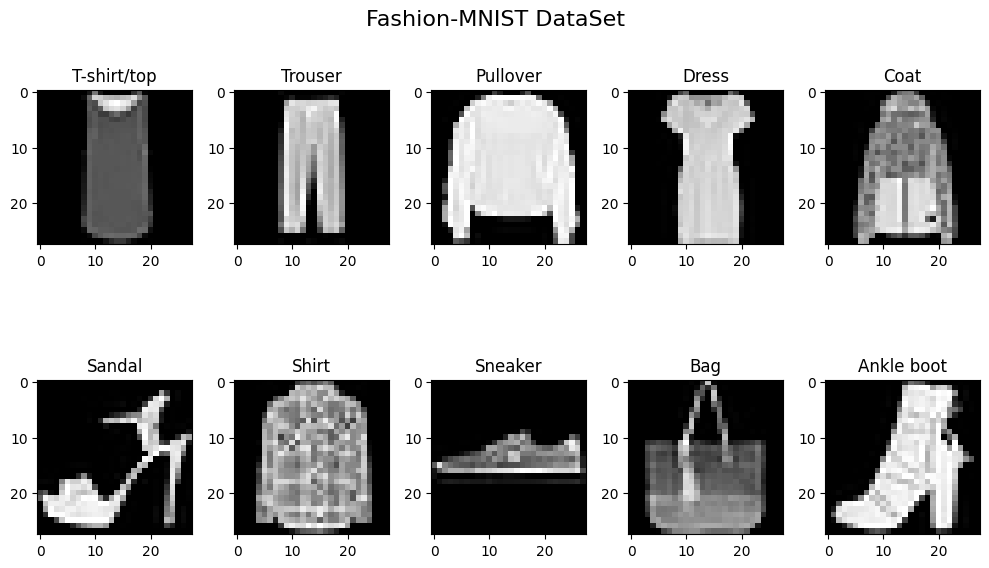

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure to plot the images
plt.figure(figsize=(10, 15))
plt.suptitle("Fashion-MNIST DataSet", fontsize=16)

# Plot one sample image for each class
for i in range(len(class_names)):
    # Find the first occurrence of each class in the training set
    idx = np.where(y_train == i)[0][1]

    # Plot the image
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('on')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
!pip install scikit-learn --upgrade


In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.preprocessing import OneHotEncoder

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Define the neural network
class FeedforwardNeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, x):
        self.activations = [x]
        self.z_values = []

        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            if i == len(self.weights) - 1:
                # Output layer uses softmax
                activation = self.softmax(z)
            else:
                # Hidden layers use sigmoid
                activation = self.sigmoid(z)
            self.activations.append(activation)

        return self.activations[-1]  # Return the output probabilities

    def backward(self, x, y):
        m = x.shape[0]
        self.deltas = [None] * len(self.weights)

        # Output layer error
        output_error = self.activations[-1] - y
        self.deltas[-1] = output_error

        # Backpropagate errors
        for i in range(len(self.weights) - 2, -1, -1):
            error = np.dot(self.deltas[i + 1], self.weights[i + 1].T)
            self.deltas[i] = error * self.sigmoid_derivative(self.activations[i + 1])

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * np.dot(self.activations[i].T, self.deltas[i]) / m
            self.biases[i] -= self.learning_rate * np.sum(self.deltas[i], axis=0, keepdims=True) / m

    def train(self, x, y, epochs=10, batch_size=32):
        for epoch in range(epochs):
            for i in range(0, x.shape[0], batch_size):
                x_batch = x[i:i + batch_size]
                y_batch = y[i:i + batch_size]

                # Forward pass
                self.forward(x_batch)

                # Backward pass
                self.backward(x_batch, y_batch)

            # Print loss every epoch
            predictions = self.forward(x)
            loss = -np.mean(y * np.log(predictions + 1e-10))
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict_probabilities(self, x):
        # Return the softmax probabilities for the input
        return self.forward(x)

# Define the network architecture
layer_sizes = [784, 128, 64, 10]  # Input layer: 784, Hidden layers: 128 and 64, Output layer: 10
model = FeedforwardNeuralNetwork(layer_sizes, learning_rate=0.1)

# Train the model
model.train(x_train, y_train, epochs=10, batch_size=32)

# Get the probability distribution for a sample from the test set
sample_index = 0  # Change this to any index in the test set
sample = x_test[sample_index].reshape(1, -1)  # Reshape to (1, 784)
probabilities = model.predict_probabilities(sample)

# Print the probability distribution
print("Probability distribution for the sample:")
for i, prob in enumerate(probabilities[0]):
    print(f"Class {i}: {prob:.4f}")

Epoch 1/10, Loss: 0.1840
Epoch 2/10, Loss: 0.0891
Epoch 3/10, Loss: 0.0672
Epoch 4/10, Loss: 0.0565
Epoch 5/10, Loss: 0.0504
Epoch 6/10, Loss: 0.0467
Epoch 7/10, Loss: 0.0440
Epoch 8/10, Loss: 0.0419
Epoch 9/10, Loss: 0.0402
Epoch 10/10, Loss: 0.0388
Probability distribution for the sample:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0998
Class 6: 0.0000
Class 7: 0.1519
Class 8: 0.0007
Class 9: 0.7475


In [ ]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="random"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    zs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        zs.append(z)

        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "relu":
            activations.append(relu(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))

    return activations, zs

# Backpropagation
def backpropagation(y, activations, zs, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Output layer error
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "relu":
            delta = error * relu_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])

        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)

        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# Optimizers
def sgd(weights, biases, gradients_w, gradients_b, lr):
    for i in range(len(weights)):
        weights[i] -= lr * gradients_w[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases

def momentum(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        velocity[i] = beta * velocity[i] + (1 - beta) * gradients_w[i]
        weights[i] -= lr * velocity[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases, velocity

def nesterov(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        temp_velocity = beta * velocity[i]
        weights[i] -= lr * (beta * temp_velocity + (1 - beta) * gradients_w[i])
        biases[i] -= lr * gradients_b[i]
        velocity[i] = temp_velocity + (1 - beta) * gradients_w[i]
    return weights, biases, velocity

def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        cache[i] = beta * cache[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache[i]) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache[i]) + epsilon)
    return weights, biases, cache

def adam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = m[i] / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

def nadam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = (beta1 * m[i] + (1 - beta1) * gradients_w[i]) / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]



# Split training data into train and validation
# X_train, X_val = X_train[:54000], X_train[54000:]
# y_train, y_val = y_train[:54000], y_train[54000:]


#train_network(X_train, y_train, X_val, y_val, wandb.config)
# Hyperparameter tuning with wandb
sweep_config = {
    'method': 'random',
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

# Train the network using WandB configuration
wandb.init(project="fashion-mnist")
sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: mangleshpatidar2233 (mangleshpatidar2233-iit-madras-alumni-association) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Create sweep with ID: 40ikqfuj
Sweep URL: https://wandb.ai/mangleshpatidar2233-iit-madras-alumni-association/fashion-mnist/sweeps/40ikqfuj


In [ ]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="random"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    zs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        zs.append(z)

        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "relu":
            activations.append(relu(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))

    return activations, zs

# Backpropagation
def backpropagation(y, activations, zs, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Output layer error
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "relu":
            delta = error * relu_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])

        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)

        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# Optimizers
def sgd(weights, biases, gradients_w, gradients_b, lr):
    for i in range(len(weights)):
        weights[i] -= lr * gradients_w[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases

def momentum(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        velocity[i] = beta * velocity[i] + (1 - beta) * gradients_w[i]
        weights[i] -= lr * velocity[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases, velocity

def nesterov(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        temp_velocity = beta * velocity[i]
        weights[i] -= lr * (beta * temp_velocity + (1 - beta) * gradients_w[i])
        biases[i] -= lr * gradients_b[i]
        velocity[i] = temp_velocity + (1 - beta) * gradients_w[i]
    return weights, biases, velocity

def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        # Update cache for weights
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)

        # Update cache for biases
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)

    return weights, biases, cache_w, cache_b


def adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        # Update for weights
        m_w[i] = beta1 * m_w[i] + (1 - beta1) * gradients_w[i]
        v_w[i] = beta2 * v_w[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat_w = m_w[i] / (1 - beta1 ** t)
        v_hat_w = v_w[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat_w / (np.sqrt(v_hat_w) + epsilon)

        # Update for biases
        m_b[i] = beta1 * m_b[i] + (1 - beta1) * gradients_b[i]
        v_b[i] = beta2 * v_b[i] + (1 - beta2) * (gradients_b[i] ** 2)
        m_hat_b = m_b[i] / (1 - beta1 ** t)
        v_hat_b = v_b[i] / (1 - beta2 ** t)
        biases[i] -= lr * m_hat_b / (np.sqrt(v_hat_b) + epsilon)

    return weights, biases, m_w, v_w, m_b, v_b

def nadam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = (beta1 * m[i] + (1 - beta1) * gradients_w[i]) / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]




def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    optimizer = config['optimizer']

    velocity = [np.zeros_like(w) for w in weights]
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]
    m_w = [np.zeros_like(w) for w in weights]  # For weights
    v_w = [np.zeros_like(w) for w in weights]  # For weights
    m_b = [np.zeros_like(b) for b in biases]   # For biases
    v_b = [np.zeros_like(b) for b in biases]   # For biases

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations, zs = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            output = activations[-1]
            train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)

            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

            # Update weights and biases based on optimizer
            if optimizer == 'sgd':
                weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
            elif optimizer == 'momentum':
                weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'nesterov':
                weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'rmsprop':
                weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
            elif optimizer == 'adam':
                weights, biases, m_w, v_w, m_b, v_b = adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, t=epoch+1)
            elif optimizer == 'nadam':
                # Update nadam similarly if needed
                pass

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Validate model
        val_activations, _ = forward_propagation(X_val, weights, biases, activation)
        val_loss = -np.sum(y_val * np.log(val_activations[-1] + 1e-8)) / len(y_val)
        val_accuracy = np.mean(np.argmax(val_activations[-1], axis=1) == np.argmax(y_val, axis=1))

        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "val_loss": val_loss,
            "val_accuracy": val_accuracy
        })

        # Print metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return

# Split training data into train and validation
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]

# Hyperparameter tuning with wandb
sweep_config = {
    'method': 'random',
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

# Train the network using WandB configuration
def train():
    wandb.init()
    config = wandb.config
    train_network(X_train, y_train, X_val, y_val, config)

sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")
wandb.agent(sweep_id, function=train, count=20)

wandb.finish()

Create sweep with ID: 1sts7fuf
Sweep URL: https://wandb.ai/mangleshpatidar2233-iit-madras-alumni-association/fashion-mnist/sweeps/1sts7fuf


wandb: Agent Starting Run: hdfk6w9j with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.1230, Train Accuracy: 0.4774, Val Loss: 1.5599, Val Accuracy: 0.7007
Epoch 2/5, Train Loss: 1.2003, Train Accuracy: 0.7344, Val Loss: 0.6266, Val Accuracy: 0.7855
Epoch 3/5, Train Loss: 0.5754, Train Accuracy: 0.8071, Val Loss: 0.5361, Val Accuracy: 0.8198
Epoch 4/5, Train Loss: 0.5294, Train Accuracy: 0.8283, Val Loss: 0.4969, Val Accuracy: 0.8315
Epoch 5/5, Train Loss: 0.5039, Train Accuracy: 0.8380, Val Loss: 0.4730, Val Accuracy: 0.8363


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▄▁▁▁
val_accuracy,▁▅▇██
val_loss,█▂▁▁▁
epoch,5
train_accuracy,0.83802
train_loss,0.50394
val_accuracy,0.83633
val_loss,0.47296


wandb: Agent Starting Run: 1ut84q36 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2992, Train Accuracy: 0.1013, Val Loss: 2.3067, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 1.9242, Train Accuracy: 0.2145, Val Loss: 1.7297, Val Accuracy: 0.2837
Epoch 3/10, Train Loss: 1.6675, Train Accuracy: 0.2585, Val Loss: 1.5456, Val Accuracy: 0.2802
Epoch 4/10, Train Loss: 1.5335, Train Accuracy: 0.2862, Val Loss: 1.5341, Val Accuracy: 0.2615
Epoch 5/10, Train Loss: 1.5435, Train Accuracy: 0.2789, Val Loss: 1.5263, Val Accuracy: 0.2833
Epoch 6/10, Train Loss: 1.5269, Train Accuracy: 0.2850, Val Loss: 1.5530, Val Accuracy: 0.2877
Epoch 7/10, Train Loss: 1.5591, Train Accuracy: 0.2834, Val Loss: 1.5733, Val Accuracy: 0.2640
Epoch 8/10, Train Loss: 1.5688, Train Accuracy: 0.2966, Val Loss: 1.5603, Val Accuracy: 0.3092
Epoch 9/10, Train Loss: 1.5366, Train Accuracy: 0.3042, Val Loss: 1.5337, Val Accuracy: 0.3073
Epoch 10/10, Train Loss: 1.5509, Train Accuracy: 0.2968, Val Loss: 1.5357, Val Accuracy: 0.2903


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▅▂▁▁▁▁▁▁▁
val_accuracy,▁▇▇▆▇▇▇██▇
val_loss,█▃▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.2968
train_loss,1.55088
val_accuracy,0.29033
val_loss,1.53567


wandb: Agent Starting Run: kh7wgj5a with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5600, Train Accuracy: 0.3398, Val Loss: 0.9845, Val Accuracy: 0.5507
Epoch 2/5, Train Loss: 0.9619, Train Accuracy: 0.6053, Val Loss: 0.8748, Val Accuracy: 0.6963
Epoch 3/5, Train Loss: 0.8473, Train Accuracy: 0.7724, Val Loss: 0.8243, Val Accuracy: 0.8118
Epoch 4/5, Train Loss: 0.8569, Train Accuracy: 0.8227, Val Loss: 0.9404, Val Accuracy: 0.8193
Epoch 5/5, Train Loss: 0.8921, Train Accuracy: 0.8357, Val Loss: 0.9693, Val Accuracy: 0.8233


epoch,▁▃▅▆█
train_accuracy,▁▅▇██
train_loss,█▂▁▁▁
val_accuracy,▁▅███
val_loss,█▃▁▆▇
epoch,5
train_accuracy,0.83567
train_loss,0.89209
val_accuracy,0.82333
val_loss,0.96925


wandb: Agent Starting Run: pfsgch91 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.7336, Train Accuracy: 0.3908, Val Loss: 1.6370, Val Accuracy: 0.4817
Epoch 2/5, Train Loss: 1.4031, Train Accuracy: 0.5501, Val Loss: 1.2240, Val Accuracy: 0.6107
Epoch 3/5, Train Loss: 1.1078, Train Accuracy: 0.6235, Val Loss: 1.0084, Val Accuracy: 0.6600
Epoch 4/5, Train Loss: 0.9538, Train Accuracy: 0.6684, Val Loss: 0.8833, Val Accuracy: 0.6990
Epoch 5/5, Train Loss: 0.8569, Train Accuracy: 0.7066, Val Loss: 0.8055, Val Accuracy: 0.7267


epoch,▁▃▅▆█
train_accuracy,▁▅▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.70656
train_loss,0.85692
val_accuracy,0.72667
val_loss,0.80549


wandb: Agent Starting Run: amfyg6iz with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.7718, Train Accuracy: 0.1116, Val Loss: 2.2824, Val Accuracy: 0.1738
Epoch 2/5, Train Loss: 2.2820, Train Accuracy: 0.1649, Val Loss: 2.2853, Val Accuracy: 0.2315
Epoch 3/5, Train Loss: 2.2838, Train Accuracy: 0.1889, Val Loss: 2.2866, Val Accuracy: 0.1957
Epoch 4/5, Train Loss: 2.2806, Train Accuracy: 0.1937, Val Loss: 2.2784, Val Accuracy: 0.1860
Epoch 5/5, Train Loss: 2.2492, Train Accuracy: 0.1895, Val Loss: 2.1879, Val Accuracy: 0.1940


epoch,▁▃▅▆█
train_accuracy,▁▆███
train_loss,▁████
val_accuracy,▁█▄▂▃
val_loss,███▇▁
epoch,5
train_accuracy,0.18948
train_loss,2.24917
val_accuracy,0.194
val_loss,2.18788


wandb: Agent Starting Run: zznsh9hv with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.6818, Train Accuracy: 0.0989, Val Loss: 2.2185, Val Accuracy: 0.1008
Epoch 2/10, Train Loss: 2.2813, Train Accuracy: 0.1000, Val Loss: 2.2998, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.3046, Train Accuracy: 0.0988, Val Loss: 2.3028, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.3055, Train Accuracy: 0.0990, Val Loss: 2.3029, Val Accuracy: 0.0973
Epoch 5/10, Train Loss: 2.3055, Train Accuracy: 0.0988, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3055, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3055, Train Accuracy: 0.0979, Val Loss: 2.3030, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.3055, Train Accuracy: 0.0974, Val Loss: 2.3028, Val Accuracy: 0.1008
Epoch 9/10, Train Loss: 2.3055, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.3055, Train Accuracy: 0.0992, Val Loss: 2.3029, Val Accuracy: 0.0973


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅█▅▅▅▆▂▁▇▆
train_loss,▁█████████
val_accuracy,█▅▂▅▁▁▁█▂▅
val_loss,▁█████████
epoch,10
train_accuracy,0.09924
train_loss,2.30549
val_accuracy,0.09733
val_loss,2.3029


wandb: Agent Starting Run: ndui8zqr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.3932, Train Accuracy: 0.0995, Val Loss: 1.7923, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 1.9522, Train Accuracy: 0.0993, Val Loss: 2.0632, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 2.1291, Train Accuracy: 0.0973, Val Loss: 2.1762, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.2099, Train Accuracy: 0.0990, Val Loss: 2.2326, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.2517, Train Accuracy: 0.0988, Val Loss: 2.2629, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.2747, Train Accuracy: 0.0990, Val Loss: 2.2798, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.2876, Train Accuracy: 0.1008, Val Loss: 2.2895, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.2951, Train Accuracy: 0.0999, Val Loss: 2.2951, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.2994, Train Accuracy: 0.1008, Val Loss: 2.2983, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.3019, Train Accuracy: 0.0990, Val Loss: 2.3002, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅▅▁▄▄▄█▆█▄
train_loss,▁▅▇▇██████
val_accuracy,███▁▁▁▁▁▁▁
val_loss,▁▅▆▇▇█████
epoch,10
train_accuracy,0.09896
train_loss,2.30187
val_accuracy,0.0925
val_loss,2.30017


wandb: Agent Starting Run: tvdh0ckt with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.1430, Train Accuracy: 0.1000, Val Loss: 2.3010, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 2.3041, Train Accuracy: 0.0975, Val Loss: 2.3031, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 2.3045, Train Accuracy: 0.0999, Val Loss: 2.3035, Val Accuracy: 0.0973
Epoch 4/10, Train Loss: 2.3045, Train Accuracy: 0.0996, Val Loss: 2.3030, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 2.3044, Train Accuracy: 0.1013, Val Loss: 2.3033, Val Accuracy: 0.1008
Epoch 6/10, Train Loss: 2.3046, Train Accuracy: 0.0983, Val Loss: 2.3030, Val Accuracy: 0.1050
Epoch 7/10, Train Loss: 2.3045, Train Accuracy: 0.0989, Val Loss: 2.3032, Val Accuracy: 0.0942
Epoch 8/10, Train Loss: 2.3045, Train Accuracy: 0.0983, Val Loss: 2.3034, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.3044, Train Accuracy: 0.0998, Val Loss: 2.3026, Val Accuracy: 0.1027
Epoch 10/10, Train Loss: 2.3045, Train Accuracy: 0.0971, Val Loss: 2.3031, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▆▂▆▅█▃▄▃▆▁
train_loss,▁█████████
val_accuracy,▂▅▄▆▆█▂▁▇▁
val_loss,▁▇█▇▇▇▇█▅▇
epoch,10
train_accuracy,0.09709
train_loss,2.30452
val_accuracy,0.0925
val_loss,2.30311


wandb: Agent Starting Run: h9sd642j with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 8.9742, Train Accuracy: 0.1081, Val Loss: 11.2494, Val Accuracy: 0.1037


<ipython-input-6-7942a0662a95>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2/5, Train Loss: 11.5522, Train Accuracy: 0.1991, Val Loss: 11.8919, Val Accuracy: 0.1897
Epoch 3/5, Train Loss: 11.5879, Train Accuracy: 0.2606, Val Loss: 11.7835, Val Accuracy: 0.3023
Epoch 4/5, Train Loss: 11.5137, Train Accuracy: 0.3415, Val Loss: 11.5912, Val Accuracy: 0.3637
Epoch 5/5, Train Loss: 11.4846, Train Accuracy: 0.3737, Val Loss: 11.6359, Val Accuracy: 0.3665


epoch,▁▃▅▆█
train_accuracy,▁▃▅▇█
train_loss,▁████
val_accuracy,▁▃▆██
val_loss,▁█▇▅▅
epoch,5
train_accuracy,0.37369
train_loss,11.48459
val_accuracy,0.3665
val_loss,11.63588


wandb: Agent Starting Run: u13v24qm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.7639, Train Accuracy: 0.1071, Val Loss: 2.2957, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.2985, Train Accuracy: 0.1349, Val Loss: 2.2979, Val Accuracy: 0.1065
Epoch 3/10, Train Loss: 2.2976, Train Accuracy: 0.1591, Val Loss: 2.2967, Val Accuracy: 0.1620
Epoch 4/10, Train Loss: 2.2958, Train Accuracy: 0.1691, Val Loss: 2.2949, Val Accuracy: 0.1798
Epoch 5/10, Train Loss: 2.2924, Train Accuracy: 0.1886, Val Loss: 2.2902, Val Accuracy: 0.1877
Epoch 6/10, Train Loss: 2.2842, Train Accuracy: 0.1885, Val Loss: 2.2770, Val Accuracy: 0.1910
Epoch 7/10, Train Loss: 2.2478, Train Accuracy: 0.1917, Val Loss: 2.1941, Val Accuracy: 0.1968
Epoch 8/10, Train Loss: 1.9308, Train Accuracy: 0.2079, Val Loss: 1.7865, Val Accuracy: 0.2133
Epoch 9/10, Train Loss: 1.7576, Train Accuracy: 0.2244, Val Loss: 1.7486, Val Accuracy: 0.2320
Epoch 10/10, Train Loss: 1.7217, Train Accuracy: 0.2704, Val Loss: 1.7151, Val Accuracy: 0.3022


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▃▄▄▄▅▅▆█
train_loss,▂█████▇▄▁▁
val_accuracy,▁▁▃▄▄▄▄▅▆█
val_loss,██████▇▂▁▁
epoch,10
train_accuracy,0.27043
train_loss,1.72166
val_accuracy,0.30217
val_loss,1.71507


wandb: Agent Starting Run: 41kzmv4j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 2/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 3/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 4/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 5/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09235
train_loss,0.69315
val_accuracy,0.09267
val_loss,0.69315


wandb: Agent Starting Run: cqfbhxas with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 4.4686, Train Accuracy: 0.0990, Val Loss: 6.0735, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 7.1393, Train Accuracy: 0.1031, Val Loss: 8.5090, Val Accuracy: 0.0985
Epoch 3/5, Train Loss: 9.2839, Train Accuracy: 0.1013, Val Loss: 10.2052, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 10.4219, Train Accuracy: 0.1019, Val Loss: 10.8713, Val Accuracy: 0.0923
Epoch 5/5, Train Loss: 10.8664, Train Accuracy: 0.1098, Val Loss: 11.1802, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▄▂▃█
train_loss,▁▄▆██
val_accuracy,▇█▁▁▁
val_loss,▁▄▇██
epoch,5
train_accuracy,0.10983
train_loss,10.8664
val_accuracy,0.0925
val_loss,11.18018


wandb: Agent Starting Run: u2tjm4ab with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.0978, Train Accuracy: 0.5981, Val Loss: 0.7428, Val Accuracy: 0.7608
Epoch 2/5, Train Loss: 0.6692, Train Accuracy: 0.7714, Val Loss: 0.6477, Val Accuracy: 0.7908
Epoch 3/5, Train Loss: 0.6298, Train Accuracy: 0.7957, Val Loss: 0.6204, Val Accuracy: 0.8087
Epoch 4/5, Train Loss: 0.6134, Train Accuracy: 0.8050, Val Loss: 0.6050, Val Accuracy: 0.8118
Epoch 5/5, Train Loss: 0.6038, Train Accuracy: 0.8082, Val Loss: 0.5981, Val Accuracy: 0.8107


epoch,▁▃▅▆█
train_accuracy,▁▇███
train_loss,█▂▁▁▁
val_accuracy,▁▅███
val_loss,█▃▂▁▁
epoch,5
train_accuracy,0.80819
train_loss,0.60384
val_accuracy,0.81067
val_loss,0.59809


wandb: Agent Starting Run: ms815j7z with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 2/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 3/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 4/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 5/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.08715
train_loss,0.69315
val_accuracy,0.08533
val_loss,0.69315


wandb: Agent Starting Run: 4u4qgeuz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.6102, Train Accuracy: 0.3962, Val Loss: 1.1402, Val Accuracy: 0.5833
Epoch 2/5, Train Loss: 1.0169, Train Accuracy: 0.6159, Val Loss: 0.9163, Val Accuracy: 0.6522
Epoch 3/5, Train Loss: 0.8661, Train Accuracy: 0.6797, Val Loss: 0.8080, Val Accuracy: 0.7117
Epoch 4/5, Train Loss: 0.7776, Train Accuracy: 0.7304, Val Loss: 0.7322, Val Accuracy: 0.7473
Epoch 5/5, Train Loss: 0.7167, Train Accuracy: 0.7563, Val Loss: 0.6896, Val Accuracy: 0.7702


epoch,▁▃▅▆█
train_accuracy,▁▅▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.75626
train_loss,0.71666
val_accuracy,0.77017
val_loss,0.68964


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r0j7s6qt with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 2/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 3/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 4/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 5/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▂▂▁▆█
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.10622
train_loss,0.65874
val_accuracy,0.11033
val_loss,0.65752


wandb: Agent Starting Run: duf3ku5o with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 2/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 3/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 4/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 10/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09939
train_loss,0.69078
val_accuracy,0.1055
val_loss,0.68687


wandb: Agent Starting Run: l1crnu98 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.3565, Train Accuracy: 0.1000, Val Loss: 1.9579, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.2174, Train Accuracy: 0.1044, Val Loss: 2.2911, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 2.2632, Train Accuracy: 0.1710, Val Loss: 2.1926, Val Accuracy: 0.2015
Epoch 4/5, Train Loss: 2.0468, Train Accuracy: 0.1976, Val Loss: 1.8824, Val Accuracy: 0.2072
Epoch 5/5, Train Loss: 1.7716, Train Accuracy: 0.1986, Val Loss: 1.7065, Val Accuracy: 0.2157


epoch,▁▃▅▆█
train_accuracy,▁▁▆██
train_loss,▁██▆▄
val_accuracy,▁▁▇▇█
val_loss,▄█▇▃▁
epoch,5
train_accuracy,0.19856
train_loss,1.7716
val_accuracy,0.21567
val_loss,1.70646


wandb: Agent Starting Run: 2aya484n with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.7470, Train Accuracy: 0.3791, Val Loss: 1.6999, Val Accuracy: 0.4603
Epoch 2/10, Train Loss: 1.4670, Train Accuracy: 0.5288, Val Loss: 1.2889, Val Accuracy: 0.5930
Epoch 3/10, Train Loss: 1.1640, Train Accuracy: 0.6114, Val Loss: 1.0613, Val Accuracy: 0.6455
Epoch 4/10, Train Loss: 0.9990, Train Accuracy: 0.6540, Val Loss: 0.9277, Val Accuracy: 0.6843
Epoch 5/10, Train Loss: 0.8951, Train Accuracy: 0.6928, Val Loss: 0.8421, Val Accuracy: 0.7178
Epoch 6/10, Train Loss: 0.8229, Train Accuracy: 0.7187, Val Loss: 0.7779, Val Accuracy: 0.7382
Epoch 7/10, Train Loss: 0.7690, Train Accuracy: 0.7371, Val Loss: 0.7322, Val Accuracy: 0.7525
Epoch 8/10, Train Loss: 0.7269, Train Accuracy: 0.7507, Val Loss: 0.6882, Val Accuracy: 0.7592
Epoch 9/10, Train Loss: 0.6930, Train Accuracy: 0.7601, Val Loss: 0.6658, Val Accuracy: 0.7712
Epoch 10/10, Train Loss: 0.6660, Train Accuracy: 0.7694, Val Loss: 0.6404, Val Accuracy: 0.7772


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▇▇▇███
train_loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
train_accuracy,0.76939
train_loss,0.66596
val_accuracy,0.77717
val_loss,0.64038


wandb: Agent Starting Run: am35q7hi with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.5345, Train Accuracy: 0.4527, Val Loss: 2.5433, Val Accuracy: 0.6680
Epoch 2/5, Train Loss: 1.9903, Train Accuracy: 0.7119, Val Loss: 1.5384, Val Accuracy: 0.7488
Epoch 3/5, Train Loss: 1.4423, Train Accuracy: 0.7693, Val Loss: 1.4386, Val Accuracy: 0.7632
Epoch 4/5, Train Loss: 1.2975, Train Accuracy: 0.7799, Val Loss: 1.3104, Val Accuracy: 0.7757
Epoch 5/5, Train Loss: 1.0064, Train Accuracy: 0.7949, Val Loss: 0.5804, Val Accuracy: 0.8325


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▆▃▂▁
val_accuracy,▁▄▅▆█
val_loss,█▄▄▄▁
epoch,5
train_accuracy,0.79487
train_loss,1.00636
val_accuracy,0.8325
val_loss,0.58039


In [1]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="random"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    zs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        zs.append(z)

        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "relu":
            activations.append(relu(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))

    return activations, zs

# Backpropagation
def backpropagation(y, activations, zs, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Output layer error
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "relu":
            delta = error * relu_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])

        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)

        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# Optimizers
def sgd(weights, biases, gradients_w, gradients_b, lr):
    for i in range(len(weights)):
        weights[i] -= lr * gradients_w[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases

def momentum(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        velocity[i] = beta * velocity[i] + (1 - beta) * gradients_w[i]
        weights[i] -= lr * velocity[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases, velocity

def nesterov(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        temp_velocity = beta * velocity[i]
        weights[i] -= lr * (beta * temp_velocity + (1 - beta) * gradients_w[i])
        biases[i] -= lr * gradients_b[i]
        velocity[i] = temp_velocity + (1 - beta) * gradients_w[i]
    return weights, biases, velocity

def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        # Update cache for weights
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)

        # Update cache for biases
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)

    return weights, biases, cache_w, cache_b


def adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        # Update for weights
        m_w[i] = beta1 * m_w[i] + (1 - beta1) * gradients_w[i]
        v_w[i] = beta2 * v_w[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat_w = m_w[i] / (1 - beta1 ** t)
        v_hat_w = v_w[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat_w / (np.sqrt(v_hat_w) + epsilon)

        # Update for biases
        m_b[i] = beta1 * m_b[i] + (1 - beta1) * gradients_b[i]
        v_b[i] = beta2 * v_b[i] + (1 - beta2) * (gradients_b[i] ** 2)
        m_hat_b = m_b[i] / (1 - beta1 ** t)
        v_hat_b = v_b[i] / (1 - beta2 ** t)
        biases[i] -= lr * m_hat_b / (np.sqrt(v_hat_b) + epsilon)

    return weights, biases, m_w, v_w, m_b, v_b

def nadam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = (beta1 * m[i] + (1 - beta1) * gradients_w[i]) / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]




def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    optimizer = config['optimizer']

    velocity = [np.zeros_like(w) for w in weights]
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]
    m_w = [np.zeros_like(w) for w in weights]  # For weights
    v_w = [np.zeros_like(w) for w in weights]  # For weights
    m_b = [np.zeros_like(b) for b in biases]   # For biases
    v_b = [np.zeros_like(b) for b in biases]   # For biases

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations, zs = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            output = activations[-1]
            train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)

            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

            # Update weights and biases based on optimizer
            if optimizer == 'sgd':
                weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
            elif optimizer == 'momentum':
                weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'nesterov':
                weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'rmsprop':
                weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
            elif optimizer == 'adam':
                weights, biases, m_w, v_w, m_b, v_b = adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, t=epoch+1)
            elif optimizer == 'nadam':
                # Update nadam similarly if needed
                pass

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Validate model
        val_activations, _ = forward_propagation(X_val, weights, biases, activation)
        val_loss = -np.sum(y_val * np.log(val_activations[-1] + 1e-8)) / len(y_val)
        val_accuracy = np.mean(np.argmax(val_activations[-1], axis=1) == np.argmax(y_val, axis=1))

        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "val_loss": val_loss,
            "val_accuracy": val_accuracy
        })

        # Print metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return

# Split training data into train and validation
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]

# Hyperparameter tuning with wandb
sweep_config = {
    'method': 'random',
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

# Train the network using WandB configuration
def train():
    wandb.init()
    config = wandb.config
    train_network(X_train, y_train, X_val, y_val, config)

sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")
wandb.agent(sweep_id, function=train, count=300)

wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: 49vwjq69
Sweep URL: https://wandb.ai/mangleshpatidar2233-iit-madras-alumni-association/fashion-mnist/sweeps/49vwjq69


wandb: Agent Starting Run: k95lts9b with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier
wandb: Currently logged in as: mangleshpatidar2233 (mangleshpatidar2233-iit-madras-alumni-association) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch 1/10, Train Loss: 2.1414, Train Accuracy: 0.4594, Val Loss: 1.5670, Val Accuracy: 0.6923
Epoch 2/10, Train Loss: 1.0335, Train Accuracy: 0.7372, Val Loss: 0.6886, Val Accuracy: 0.7813
Epoch 3/10, Train Loss: 0.6074, Train Accuracy: 0.8006, Val Loss: 0.5564, Val Accuracy: 0.8120
Epoch 4/10, Train Loss: 0.5517, Train Accuracy: 0.8232, Val Loss: 0.5502, Val Accuracy: 0.8265
Epoch 5/10, Train Loss: 0.5271, Train Accuracy: 0.8336, Val Loss: 0.4704, Val Accuracy: 0.8358
Epoch 6/10, Train Loss: 0.5030, Train Accuracy: 0.8418, Val Loss: 0.4897, Val Accuracy: 0.8365
Epoch 7/10, Train Loss: 0.4892, Train Accuracy: 0.8464, Val Loss: 0.4948, Val Accuracy: 0.8450
Epoch 8/10, Train Loss: 0.4776, Train Accuracy: 0.8521, Val Loss: 0.4796, Val Accuracy: 0.8312
Epoch 9/10, Train Loss: 0.4666, Train Accuracy: 0.8547, Val Loss: 0.4778, Val Accuracy: 0.8488
Epoch 10/10, Train Loss: 0.4577, Train Accuracy: 0.8589, Val Loss: 0.4665, Val Accuracy: 0.8557


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇██████
train_loss,█▃▂▁▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇▇█▇██
val_loss,█▂▂▂▁▁▁▁▁▁
epoch,10
train_accuracy,0.85894
train_loss,0.45771
val_accuracy,0.85567
val_loss,0.46647


wandb: Agent Starting Run: wfnwpt4z with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 4/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 5/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▇▅█▁▇
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09996
train_loss,0.66454
val_accuracy,0.10033
val_loss,0.66602


wandb: Agent Starting Run: d0x94zev with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.4230, Train Accuracy: 0.1857, Val Loss: 2.9054, Val Accuracy: 0.2717
Epoch 2/5, Train Loss: 2.7787, Train Accuracy: 0.2806, Val Loss: 2.7222, Val Accuracy: 0.2667
Epoch 3/5, Train Loss: 2.6779, Train Accuracy: 0.3011, Val Loss: 2.7485, Val Accuracy: 0.3183
Epoch 4/5, Train Loss: 2.7130, Train Accuracy: 0.3519, Val Loss: 2.7631, Val Accuracy: 0.4098
Epoch 5/5, Train Loss: 2.6989, Train Accuracy: 0.4531, Val Loss: 2.7468, Val Accuracy: 0.4743


epoch,▁▃▅▆█
train_accuracy,▁▃▄▅█
train_loss,▁█▆▇▆
val_accuracy,▁▁▃▆█
val_loss,█▁▂▃▂
epoch,5
train_accuracy,0.45307
train_loss,2.69887
val_accuracy,0.47433
val_loss,2.74678


wandb: Agent Starting Run: h697li2b with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.8224, Train Accuracy: 0.7777, Val Loss: 0.4398, Val Accuracy: 0.8450
Epoch 2/5, Train Loss: 0.4361, Train Accuracy: 0.8495, Val Loss: 0.4468, Val Accuracy: 0.8455
Epoch 3/5, Train Loss: 0.4042, Train Accuracy: 0.8640, Val Loss: 0.4891, Val Accuracy: 0.8298
Epoch 4/5, Train Loss: 0.3947, Train Accuracy: 0.8727, Val Loss: 0.4086, Val Accuracy: 0.8650
Epoch 5/5, Train Loss: 0.3832, Train Accuracy: 0.8784, Val Loss: 0.5059, Val Accuracy: 0.8580


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▂▁▁▁
val_accuracy,▄▄▁█▇
val_loss,▃▄▇▁█
epoch,5
train_accuracy,0.87843
train_loss,0.38315
val_accuracy,0.858
val_loss,0.50589


wandb: Agent Starting Run: myoco1fy with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.7638, Train Accuracy: 0.1066, Val Loss: 2.2958, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.2972, Train Accuracy: 0.1351, Val Loss: 2.2979, Val Accuracy: 0.1072
Epoch 3/10, Train Loss: 2.2963, Train Accuracy: 0.1594, Val Loss: 2.2967, Val Accuracy: 0.1620
Epoch 4/10, Train Loss: 2.2945, Train Accuracy: 0.1689, Val Loss: 2.2949, Val Accuracy: 0.1800
Epoch 5/10, Train Loss: 2.2910, Train Accuracy: 0.1884, Val Loss: 2.2902, Val Accuracy: 0.1877
Epoch 6/10, Train Loss: 2.2828, Train Accuracy: 0.1885, Val Loss: 2.2769, Val Accuracy: 0.1913
Epoch 7/10, Train Loss: 2.2466, Train Accuracy: 0.1918, Val Loss: 2.1945, Val Accuracy: 0.1968
Epoch 8/10, Train Loss: 1.9304, Train Accuracy: 0.2078, Val Loss: 1.7866, Val Accuracy: 0.2135
Epoch 9/10, Train Loss: 1.7567, Train Accuracy: 0.2240, Val Loss: 1.7486, Val Accuracy: 0.2322
Epoch 10/10, Train Loss: 1.7206, Train Accuracy: 0.2696, Val Loss: 1.7148, Val Accuracy: 0.3025


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▃▄▅▅▅▅▆█
train_loss,▂█████▇▄▁▁
val_accuracy,▁▁▃▄▄▄▄▅▆█
val_loss,██████▇▂▁▁
epoch,10
train_accuracy,0.26956
train_loss,1.72065
val_accuracy,0.3025
val_loss,1.71484


wandb: Agent Starting Run: ud6uwew9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5959, Train Accuracy: 0.0992, Val Loss: 2.1591, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 2.2616, Train Accuracy: 0.1006, Val Loss: 2.2978, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.3004, Train Accuracy: 0.1043, Val Loss: 2.3019, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3016, Train Accuracy: 0.1060, Val Loss: 2.3024, Val Accuracy: 0.1357
Epoch 5/5, Train Loss: 2.3018, Train Accuracy: 0.1150, Val Loss: 2.3023, Val Accuracy: 0.1470


epoch,▁▃▅▆█
train_accuracy,▁▂▃▄█
train_loss,▁████
val_accuracy,▁▁▁▆█
val_loss,▁████
epoch,5
train_accuracy,0.115
train_loss,2.30184
val_accuracy,0.147
val_loss,2.30232


wandb: Agent Starting Run: vx8040iu with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.0888, Train Accuracy: 0.3259, Val Loss: 0.9908, Val Accuracy: 0.6915
Epoch 2/5, Train Loss: 0.8256, Train Accuracy: 0.7319, Val Loss: 0.7707, Val Accuracy: 0.7790
Epoch 3/5, Train Loss: 0.6963, Train Accuracy: 0.7957, Val Loss: 0.5584, Val Accuracy: 0.8162
Epoch 4/5, Train Loss: 0.6212, Train Accuracy: 0.8211, Val Loss: 0.5662, Val Accuracy: 0.8067
Epoch 5/5, Train Loss: 0.5724, Train Accuracy: 0.8325, Val Loss: 0.5266, Val Accuracy: 0.8358


epoch,▁▃▅▆█
train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▅▁▂▁
epoch,5
train_accuracy,0.83252
train_loss,0.57244
val_accuracy,0.83583
val_loss,0.52663


wandb: Agent Starting Run: odlv0bhx with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5997, Train Accuracy: 0.0994, Val Loss: 2.1645, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.2662, Train Accuracy: 0.1022, Val Loss: 2.2984, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.3036, Train Accuracy: 0.1011, Val Loss: 2.3022, Val Accuracy: 0.1008
Epoch 4/5, Train Loss: 2.3048, Train Accuracy: 0.1021, Val Loss: 2.3026, Val Accuracy: 0.1008
Epoch 5/5, Train Loss: 2.3050, Train Accuracy: 0.1016, Val Loss: 2.3029, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁█▅█▆
train_loss,▁████
val_accuracy,▅▅██▁
val_loss,▁████
epoch,5
train_accuracy,0.10157
train_loss,2.30496
val_accuracy,0.0925
val_loss,2.30287


wandb: Agent Starting Run: e2k3u6dg with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 2/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 3/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 4/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 5/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 6/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 7/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 8/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 9/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985
Epoch 10/10, Train Loss: 0.7180, Train Accuracy: 0.1002, Val Loss: 0.7199, Val Accuracy: 0.0985


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.10017
train_loss,0.71795
val_accuracy,0.0985
val_loss,0.71989


wandb: Agent Starting Run: oqr8qbgr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.2504, Train Accuracy: 0.0996, Val Loss: 2.3036, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 2.3063, Train Accuracy: 0.0991, Val Loss: 2.3036, Val Accuracy: 0.1025
Epoch 3/5, Train Loss: 2.3063, Train Accuracy: 0.0981, Val Loss: 2.3038, Val Accuracy: 0.0985
Epoch 4/5, Train Loss: 2.3062, Train Accuracy: 0.0979, Val Loss: 2.3035, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3063, Train Accuracy: 0.0992, Val Loss: 2.3033, Val Accuracy: 0.1055


epoch,▁▃▅▆█
train_accuracy,█▆▂▁▆
train_loss,▁████
val_accuracy,▄▆▄▁█
val_loss,▅▄█▃▁
epoch,5
train_accuracy,0.0992
train_loss,2.30629
val_accuracy,0.1055
val_loss,2.3033


wandb: Agent Starting Run: gw6hhbcj with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 4.7240, Train Accuracy: 0.1022, Val Loss: 7.0449, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 7.4555, Train Accuracy: 0.1022, Val Loss: 7.9339, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 7.4792, Train Accuracy: 0.1093, Val Loss: 7.5869, Val Accuracy: 0.0965
Epoch 4/5, Train Loss: 7.5125, Train Accuracy: 0.1185, Val Loss: 7.9637, Val Accuracy: 0.1008
Epoch 5/5, Train Loss: 7.9104, Train Accuracy: 0.1352, Val Loss: 8.1810, Val Accuracy: 0.1718


epoch,▁▃▅▆█
train_accuracy,▁▁▃▄█
train_loss,▁▇▇▇█
val_accuracy,▁▁▁▁█
val_loss,▁▆▄▇█
epoch,5
train_accuracy,0.1352
train_loss,7.91041
val_accuracy,0.17183
val_loss,8.18105


wandb: Agent Starting Run: dmwpwfxw with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.8047, Train Accuracy: 0.3655, Val Loss: 2.4872, Val Accuracy: 0.5367
Epoch 2/10, Train Loss: 2.1962, Train Accuracy: 0.6343, Val Loss: 2.2329, Val Accuracy: 0.6658
Epoch 3/10, Train Loss: 2.1749, Train Accuracy: 0.6735, Val Loss: 2.2115, Val Accuracy: 0.6883
Epoch 4/10, Train Loss: 2.1304, Train Accuracy: 0.6947, Val Loss: 2.1482, Val Accuracy: 0.7062
Epoch 5/10, Train Loss: 2.0969, Train Accuracy: 0.7130, Val Loss: 2.1119, Val Accuracy: 0.7112
Epoch 6/10, Train Loss: 2.0568, Train Accuracy: 0.7274, Val Loss: 2.0939, Val Accuracy: 0.7277
Epoch 7/10, Train Loss: 1.9852, Train Accuracy: 0.7357, Val Loss: 1.9895, Val Accuracy: 0.7332
Epoch 8/10, Train Loss: 1.9055, Train Accuracy: 0.7421, Val Loss: 1.9318, Val Accuracy: 0.7392
Epoch 9/10, Train Loss: 1.8200, Train Accuracy: 0.7466, Val Loss: 1.8266, Val Accuracy: 0.7412
Epoch 10/10, Train Loss: 1.7020, Train Accuracy: 0.7517, Val Loss: 1.7628, Val Accuracy: 0.7440


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇█████
train_loss,█▄▄▄▄▃▃▂▂▁
val_accuracy,▁▅▆▇▇▇████
val_loss,█▆▅▅▄▄▃▃▂▁
epoch,10
train_accuracy,0.75169
train_loss,1.70197
val_accuracy,0.744
val_loss,1.76283


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i8c8drjd with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 2/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 3/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 4/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055
Epoch 10/10, Train Loss: 0.6765, Train Accuracy: 0.0994, Val Loss: 0.6693, Val Accuracy: 0.1055


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▅▅▁▆▄▄▅▅▅█
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09939
train_loss,0.67654
val_accuracy,0.1055
val_loss,0.66933


wandb: Agent Starting Run: cyua8uz8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6414, Train Accuracy: 0.7786, Val Loss: 0.4740, Val Accuracy: 0.8335
Epoch 2/5, Train Loss: 0.4619, Train Accuracy: 0.8446, Val Loss: 0.4333, Val Accuracy: 0.8495
Epoch 3/5, Train Loss: 0.4315, Train Accuracy: 0.8550, Val Loss: 0.4270, Val Accuracy: 0.8522
Epoch 4/5, Train Loss: 0.4154, Train Accuracy: 0.8616, Val Loss: 0.4018, Val Accuracy: 0.8595
Epoch 5/5, Train Loss: 0.4035, Train Accuracy: 0.8674, Val Loss: 0.4015, Val Accuracy: 0.8608


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
val_loss,█▄▃▁▁
epoch,5
train_accuracy,0.86735
train_loss,0.40346
val_accuracy,0.86083
val_loss,0.40147


wandb: Agent Starting Run: 9u3hclza with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.9690, Train Accuracy: 0.6602, Val Loss: 0.6372, Val Accuracy: 0.7745
Epoch 2/10, Train Loss: 0.5733, Train Accuracy: 0.8080, Val Loss: 0.5277, Val Accuracy: 0.8250
Epoch 3/10, Train Loss: 0.5104, Train Accuracy: 0.8325, Val Loss: 0.4810, Val Accuracy: 0.8368
Epoch 4/10, Train Loss: 0.4815, Train Accuracy: 0.8433, Val Loss: 0.4626, Val Accuracy: 0.8432
Epoch 5/10, Train Loss: 0.4620, Train Accuracy: 0.8496, Val Loss: 0.4605, Val Accuracy: 0.8487
Epoch 6/10, Train Loss: 0.4486, Train Accuracy: 0.8549, Val Loss: 0.4343, Val Accuracy: 0.8547
Epoch 7/10, Train Loss: 0.4352, Train Accuracy: 0.8596, Val Loss: 0.4341, Val Accuracy: 0.8545
Epoch 8/10, Train Loss: 0.4262, Train Accuracy: 0.8620, Val Loss: 0.4059, Val Accuracy: 0.8565
Epoch 9/10, Train Loss: 0.4176, Train Accuracy: 0.8644, Val Loss: 0.4076, Val Accuracy: 0.8623
Epoch 10/10, Train Loss: 0.4102, Train Accuracy: 0.8673, Val Loss: 0.4187, Val Accuracy: 0.8575


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇▇███
val_loss,█▅▃▃▃▂▂▁▁▁
epoch,10
train_accuracy,0.86726
train_loss,0.41023
val_accuracy,0.8575
val_loss,0.41875


wandb: Agent Starting Run: 2ujcqlit with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.8231, Train Accuracy: 0.0974, Val Loss: 0.9462, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 1.0547, Train Accuracy: 0.0986, Val Loss: 1.1573, Val Accuracy: 0.1027
Epoch 3/10, Train Loss: 1.2526, Train Accuracy: 0.0985, Val Loss: 1.3465, Val Accuracy: 0.1027
Epoch 4/10, Train Loss: 1.4388, Train Accuracy: 0.0997, Val Loss: 1.5300, Val Accuracy: 0.1027
Epoch 5/10, Train Loss: 1.6161, Train Accuracy: 0.0997, Val Loss: 1.6984, Val Accuracy: 0.1027
Epoch 6/10, Train Loss: 1.7710, Train Accuracy: 0.0997, Val Loss: 1.8384, Val Accuracy: 0.1027
Epoch 7/10, Train Loss: 1.8954, Train Accuracy: 0.0996, Val Loss: 1.9477, Val Accuracy: 0.1027
Epoch 8/10, Train Loss: 1.9912, Train Accuracy: 0.0997, Val Loss: 2.0310, Val Accuracy: 0.0942
Epoch 9/10, Train Loss: 2.0638, Train Accuracy: 0.1004, Val Loss: 2.0939, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.1188, Train Accuracy: 0.1005, Val Loss: 2.1417, Val Accuracy: 0.0942


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▆▆▆▆▆██
train_loss,▁▂▃▄▅▆▇▇██
val_accuracy,▄██████▁▁▁
val_loss,▁▂▃▄▅▆▇▇██
epoch,10
train_accuracy,0.1005
train_loss,2.11883
val_accuracy,0.09417
val_loss,2.1417


wandb: Agent Starting Run: td07tb4x with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.6333, Train Accuracy: 0.0974, Val Loss: 2.1853, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.2662, Train Accuracy: 0.0993, Val Loss: 2.2972, Val Accuracy: 0.0985
Epoch 3/5, Train Loss: 2.3010, Train Accuracy: 0.0999, Val Loss: 2.3026, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3027, Train Accuracy: 0.0980, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3027, Train Accuracy: 0.1006, Val Loss: 2.3030, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▅▇▂█
train_loss,▁████
val_accuracy,█▆▁▁▁
val_loss,▁████
epoch,5
train_accuracy,0.10057
train_loss,2.30272
val_accuracy,0.0925
val_loss,2.30297


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c9jpk4ib with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.8227, Train Accuracy: 0.0974, Val Loss: 0.9450, Val Accuracy: 0.1003
Epoch 2/10, Train Loss: 1.0507, Train Accuracy: 0.0981, Val Loss: 1.1487, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 1.2343, Train Accuracy: 0.1000, Val Loss: 1.3156, Val Accuracy: 0.1003
Epoch 4/10, Train Loss: 1.3910, Train Accuracy: 0.1000, Val Loss: 1.4647, Val Accuracy: 0.1003
Epoch 5/10, Train Loss: 1.5358, Train Accuracy: 0.1000, Val Loss: 1.6057, Val Accuracy: 0.1003
Epoch 6/10, Train Loss: 1.6722, Train Accuracy: 0.1000, Val Loss: 1.7368, Val Accuracy: 0.1003
Epoch 7/10, Train Loss: 1.7959, Train Accuracy: 0.1000, Val Loss: 1.8521, Val Accuracy: 0.1003
Epoch 8/10, Train Loss: 1.9017, Train Accuracy: 0.1000, Val Loss: 1.9482, Val Accuracy: 0.1003
Epoch 9/10, Train Loss: 1.9883, Train Accuracy: 0.1000, Val Loss: 2.0256, Val Accuracy: 0.1003
Epoch 10/10, Train Loss: 2.0574, Train Accuracy: 0.0993, Val Loss: 2.0867, Val Accuracy: 0.1003


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃███████▆
train_loss,▁▂▃▄▅▆▇▇██
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▂▃▄▅▆▇▇██
epoch,10
train_accuracy,0.09933
train_loss,2.05736
val_accuracy,0.10033
val_loss,2.08675


wandb: Agent Starting Run: bfs9o9nb with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5935, Train Accuracy: 0.0995, Val Loss: 2.1330, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.2414, Train Accuracy: 0.0986, Val Loss: 2.2881, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.2985, Train Accuracy: 0.0954, Val Loss: 2.3015, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3036, Train Accuracy: 0.0984, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3040, Train Accuracy: 0.1001, Val Loss: 2.3028, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▇▆▁▅█
train_loss,▁▇███
val_accuracy,██▁▁▁
val_loss,▁▇███
epoch,5
train_accuracy,0.10011
train_loss,2.30403
val_accuracy,0.0925
val_loss,2.30282


wandb: Agent Starting Run: yszwbh4v with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6836, Train Accuracy: 0.7995, Val Loss: 0.4427, Val Accuracy: 0.8492
Epoch 2/5, Train Loss: 0.4161, Train Accuracy: 0.8607, Val Loss: 0.4187, Val Accuracy: 0.8607
Epoch 3/5, Train Loss: 0.3894, Train Accuracy: 0.8736, Val Loss: 0.3898, Val Accuracy: 0.8680
Epoch 4/5, Train Loss: 0.3744, Train Accuracy: 0.8807, Val Loss: 0.4150, Val Accuracy: 0.8817
Epoch 5/5, Train Loss: 0.3677, Train Accuracy: 0.8884, Val Loss: 0.4086, Val Accuracy: 0.8793


epoch,▁▃▅▆█
train_accuracy,▁▆▇▇█
train_loss,█▂▁▁▁
val_accuracy,▁▃▅█▇
val_loss,█▅▁▄▃
epoch,5
train_accuracy,0.88844
train_loss,0.36766
val_accuracy,0.87933
val_loss,0.40856


wandb: Agent Starting Run: lax57tqg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.4786, Train Accuracy: 0.0997, Val Loss: 1.9265, Val Accuracy: 0.1027
Epoch 2/10, Train Loss: 2.0454, Train Accuracy: 0.0997, Val Loss: 2.1340, Val Accuracy: 0.1027
Epoch 3/10, Train Loss: 2.1869, Train Accuracy: 0.0997, Val Loss: 2.2260, Val Accuracy: 0.1027
Epoch 4/10, Train Loss: 2.2535, Train Accuracy: 0.0999, Val Loss: 2.2711, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.2852, Train Accuracy: 0.0995, Val Loss: 2.2914, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.2986, Train Accuracy: 0.0986, Val Loss: 2.2994, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3035, Train Accuracy: 0.0968, Val Loss: 2.3019, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.3050, Train Accuracy: 0.0989, Val Loss: 2.3027, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.3053, Train Accuracy: 0.0998, Val Loss: 2.3027, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.3054, Train Accuracy: 0.0993, Val Loss: 2.3028, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,████▇▅▁▆█▇
train_loss,▁▆▇███████
val_accuracy,███▁▁▁▁▁▂▁
val_loss,▁▅▇▇██████
epoch,10
train_accuracy,0.09928
train_loss,2.30541
val_accuracy,0.0925
val_loss,2.30285


wandb: Agent Starting Run: x31qe9st with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8255, Train Accuracy: 0.0997, Val Loss: 0.9506, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 1.0688, Train Accuracy: 0.1008, Val Loss: 1.1833, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 1.3021, Train Accuracy: 0.1008, Val Loss: 1.4194, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 1.5361, Train Accuracy: 0.1007, Val Loss: 1.6443, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 1.7410, Train Accuracy: 0.1008, Val Loss: 1.8255, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁██▇█
train_loss,▁▃▅▆█
val_accuracy,▁▁▁▁▁
val_loss,▁▃▅▇█
epoch,5
train_accuracy,0.10083
train_loss,1.74104
val_accuracy,0.0925
val_loss,1.82555


wandb: Agent Starting Run: y2usrvtq with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8240, Train Accuracy: 0.0969, Val Loss: 0.9474, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 1.0589, Train Accuracy: 0.1003, Val Loss: 1.1645, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 1.2676, Train Accuracy: 0.0998, Val Loss: 1.3698, Val Accuracy: 0.0937
Epoch 4/5, Train Loss: 1.4761, Train Accuracy: 0.1028, Val Loss: 1.5829, Val Accuracy: 0.1312
Epoch 5/5, Train Loss: 1.6974, Train Accuracy: 0.1074, Val Loss: 1.8170, Val Accuracy: 0.1008


epoch,▁▃▅▆█
train_accuracy,▁▃▃▅█
train_loss,▁▃▅▆█
val_accuracy,▁▁▁█▃
val_loss,▁▃▄▆█
epoch,5
train_accuracy,0.10744
train_loss,1.69739
val_accuracy,0.10083
val_loss,1.81698


wandb: Agent Starting Run: iam8x5xo with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.5273, Train Accuracy: 0.0983, Val Loss: 2.0527, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.2055, Train Accuracy: 0.0970, Val Loss: 2.2770, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.2938, Train Accuracy: 0.0965, Val Loss: 2.3001, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.3030, Train Accuracy: 0.0982, Val Loss: 2.3026, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.3039, Train Accuracy: 0.0998, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3041, Train Accuracy: 0.0974, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3041, Train Accuracy: 0.0965, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.3041, Train Accuracy: 0.0977, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 9/10, Train Loss: 2.3041, Train Accuracy: 0.0987, Val Loss: 2.3028, Val Accuracy: 0.0973
Epoch 10/10, Train Loss: 2.3041, Train Accuracy: 0.0990, Val Loss: 2.3028, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅▂▁▅█▃▁▄▆▆
train_loss,▁▇████████
val_accuracy,██▁▁▁▁▁▃█▁
val_loss,▁▇████████
epoch,10
train_accuracy,0.09896
train_loss,2.3041
val_accuracy,0.0925
val_loss,2.30281


wandb: Agent Starting Run: iwgv3mm7 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.6222, Train Accuracy: 0.0991, Val Loss: 2.1923, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.2758, Train Accuracy: 0.1026, Val Loss: 2.2995, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.3019, Train Accuracy: 0.1041, Val Loss: 2.3016, Val Accuracy: 0.1008
Epoch 4/10, Train Loss: 2.3027, Train Accuracy: 0.1069, Val Loss: 2.3021, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 2.3030, Train Accuracy: 0.1070, Val Loss: 2.3025, Val Accuracy: 0.0927
Epoch 6/10, Train Loss: 2.3032, Train Accuracy: 0.1416, Val Loss: 2.3026, Val Accuracy: 0.1388
Epoch 7/10, Train Loss: 2.3026, Train Accuracy: 0.1570, Val Loss: 2.3018, Val Accuracy: 0.1702
Epoch 8/10, Train Loss: 2.3006, Train Accuracy: 0.1781, Val Loss: 2.2969, Val Accuracy: 0.1922
Epoch 9/10, Train Loss: 2.2772, Train Accuracy: 0.1950, Val Loss: 2.2323, Val Accuracy: 0.1963
Epoch 10/10, Train Loss: 2.0418, Train Accuracy: 0.1984, Val Loss: 1.8682, Val Accuracy: 0.2065


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▂▂▄▅▇██
train_loss,▁████████▅
val_accuracy,▁▁▂▂▁▄▆▇▇█
val_loss,▆███████▇▁
epoch,10
train_accuracy,0.19839
train_loss,2.04179
val_accuracy,0.2065
val_loss,1.86817


wandb: Agent Starting Run: mv0wdesj with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.1172, Train Accuracy: 0.4338, Val Loss: 1.7482, Val Accuracy: 0.6837
Epoch 2/10, Train Loss: 1.5762, Train Accuracy: 0.7176, Val Loss: 1.5321, Val Accuracy: 0.7298
Epoch 3/10, Train Loss: 1.4993, Train Accuracy: 0.7615, Val Loss: 1.4822, Val Accuracy: 0.7678
Epoch 4/10, Train Loss: 1.4083, Train Accuracy: 0.7762, Val Loss: 1.3714, Val Accuracy: 0.7722
Epoch 5/10, Train Loss: 1.2780, Train Accuracy: 0.7825, Val Loss: 1.2560, Val Accuracy: 0.7768
Epoch 6/10, Train Loss: 0.9822, Train Accuracy: 0.7954, Val Loss: 0.5414, Val Accuracy: 0.8252
Epoch 7/10, Train Loss: 0.5164, Train Accuracy: 0.8423, Val Loss: 0.4699, Val Accuracy: 0.8440
Epoch 8/10, Train Loss: 0.4847, Train Accuracy: 0.8516, Val Loss: 0.4622, Val Accuracy: 0.8432
Epoch 9/10, Train Loss: 0.4686, Train Accuracy: 0.8565, Val Loss: 0.4797, Val Accuracy: 0.8385
Epoch 10/10, Train Loss: 0.4541, Train Accuracy: 0.8604, Val Loss: 0.4383, Val Accuracy: 0.8597


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▆▇▇▇████
train_loss,█▆▅▅▄▃▁▁▁▁
val_accuracy,▁▃▄▅▅▇▇▇▇█
val_loss,█▇▇▆▅▂▁▁▁▁
epoch,10
train_accuracy,0.86037
train_loss,0.4541
val_accuracy,0.85967
val_loss,0.43829


wandb: Agent Starting Run: l1ccty7v with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 2/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 3/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 4/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 5/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 6/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 7/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 8/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 9/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 10/10, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▁▃▅▄▃▃█▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.12526
train_loss,0.68998
val_accuracy,0.12867
val_loss,0.68887


wandb: Agent Starting Run: 3pw6pujs with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.6076, Train Accuracy: 0.2590, Val Loss: 2.0322, Val Accuracy: 0.2525
Epoch 2/10, Train Loss: 2.1323, Train Accuracy: 0.2738, Val Loss: 2.1870, Val Accuracy: 0.3178
Epoch 3/10, Train Loss: 2.1954, Train Accuracy: 0.3037, Val Loss: 2.1817, Val Accuracy: 0.3035
Epoch 4/10, Train Loss: 2.1223, Train Accuracy: 0.2904, Val Loss: 2.0450, Val Accuracy: 0.3085
Epoch 5/10, Train Loss: 1.9479, Train Accuracy: 0.3134, Val Loss: 1.8525, Val Accuracy: 0.3137
Epoch 6/10, Train Loss: 1.8000, Train Accuracy: 0.3192, Val Loss: 1.7499, Val Accuracy: 0.3250
Epoch 7/10, Train Loss: 1.7123, Train Accuracy: 0.3292, Val Loss: 1.6684, Val Accuracy: 0.3462
Epoch 8/10, Train Loss: 1.6117, Train Accuracy: 0.3654, Val Loss: 1.5524, Val Accuracy: 0.3878
Epoch 9/10, Train Loss: 1.4907, Train Accuracy: 0.4224, Val Loss: 1.4233, Val Accuracy: 0.4697
Epoch 10/10, Train Loss: 1.3671, Train Accuracy: 0.5067, Val Loss: 1.3059, Val Accuracy: 0.5403


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▂▂▃▃▃▄▆█
train_loss,▃▇█▇▆▅▄▃▂▁
val_accuracy,▁▃▂▂▂▃▃▄▆█
val_loss,▇██▇▅▅▄▃▂▁
epoch,10
train_accuracy,0.50669
train_loss,1.36714
val_accuracy,0.54033
val_loss,1.30585


wandb: Agent Starting Run: 3hjowbla with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.7663, Train Accuracy: 0.1003, Val Loss: 2.1602, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 2.2338, Train Accuracy: 0.0988, Val Loss: 2.2787, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.2936, Train Accuracy: 0.0988, Val Loss: 2.3001, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3031, Train Accuracy: 0.0978, Val Loss: 2.3027, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3041, Train Accuracy: 0.0999, Val Loss: 2.3029, Val Accuracy: 0.1008


epoch,▁▃▅▆█
train_accuracy,█▄▄▁▇
train_loss,▁▇███
val_accuracy,▂▂▁▁█
val_loss,▁▇███
epoch,5
train_accuracy,0.09991
train_loss,2.30408
val_accuracy,0.10083
val_loss,2.30287


wandb: Agent Starting Run: l96id3bb with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.1111, Train Accuracy: 0.5655, Val Loss: 0.7757, Val Accuracy: 0.7665
Epoch 2/10, Train Loss: 0.6612, Train Accuracy: 0.7852, Val Loss: 0.5937, Val Accuracy: 0.8085
Epoch 3/10, Train Loss: 0.5450, Train Accuracy: 0.8164, Val Loss: 0.5129, Val Accuracy: 0.8383
Epoch 4/10, Train Loss: 0.4857, Train Accuracy: 0.8490, Val Loss: 0.4815, Val Accuracy: 0.8428
Epoch 5/10, Train Loss: 0.4558, Train Accuracy: 0.8611, Val Loss: 0.4811, Val Accuracy: 0.8428
Epoch 6/10, Train Loss: 0.4269, Train Accuracy: 0.8693, Val Loss: 0.4353, Val Accuracy: 0.8632
Epoch 7/10, Train Loss: 0.4033, Train Accuracy: 0.8771, Val Loss: 0.4177, Val Accuracy: 0.8665
Epoch 8/10, Train Loss: 0.3878, Train Accuracy: 0.8807, Val Loss: 0.4110, Val Accuracy: 0.8680
Epoch 9/10, Train Loss: 0.3801, Train Accuracy: 0.8846, Val Loss: 0.4193, Val Accuracy: 0.8667
Epoch 10/10, Train Loss: 0.3678, Train Accuracy: 0.8883, Val Loss: 0.4040, Val Accuracy: 0.8695


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▆▇▇█████
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆▆▆█████
val_loss,█▅▃▂▂▂▁▁▁▁
epoch,10
train_accuracy,0.88831
train_loss,0.36785
val_accuracy,0.8695
val_loss,0.40395


wandb: Agent Starting Run: ohe5uwv9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.5156, Train Accuracy: 0.1006, Val Loss: 2.0111, Val Accuracy: 0.1578
Epoch 2/5, Train Loss: 2.0478, Train Accuracy: 0.2436, Val Loss: 1.9242, Val Accuracy: 0.2513
Epoch 3/5, Train Loss: 1.7644, Train Accuracy: 0.2948, Val Loss: 1.6404, Val Accuracy: 0.2922
Epoch 4/5, Train Loss: 1.5556, Train Accuracy: 0.3675, Val Loss: 1.4922, Val Accuracy: 0.4503
Epoch 5/5, Train Loss: 1.4189, Train Accuracy: 0.4636, Val Loss: 1.3579, Val Accuracy: 0.4658


epoch,▁▃▅▆█
train_accuracy,▁▄▅▆█
train_loss,▂█▅▃▁
val_accuracy,▁▃▄██
val_loss,█▇▄▂▁
epoch,5
train_accuracy,0.46359
train_loss,1.41887
val_accuracy,0.46583
val_loss,1.35786


wandb: Agent Starting Run: xxcvcrk0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.5168, Train Accuracy: 0.4032, Val Loss: 1.0909, Val Accuracy: 0.6330
Epoch 2/10, Train Loss: 0.8699, Train Accuracy: 0.7076, Val Loss: 0.6982, Val Accuracy: 0.7557
Epoch 3/10, Train Loss: 0.6445, Train Accuracy: 0.7596, Val Loss: 0.6000, Val Accuracy: 0.7703
Epoch 4/10, Train Loss: 0.5796, Train Accuracy: 0.7851, Val Loss: 0.5627, Val Accuracy: 0.7985
Epoch 5/10, Train Loss: 0.5446, Train Accuracy: 0.8125, Val Loss: 0.5327, Val Accuracy: 0.8187
Epoch 6/10, Train Loss: 0.5201, Train Accuracy: 0.8276, Val Loss: 0.5140, Val Accuracy: 0.8327
Epoch 7/10, Train Loss: 0.4997, Train Accuracy: 0.8377, Val Loss: 0.4927, Val Accuracy: 0.8363
Epoch 8/10, Train Loss: 0.4836, Train Accuracy: 0.8461, Val Loss: 0.4832, Val Accuracy: 0.8433
Epoch 9/10, Train Loss: 0.4704, Train Accuracy: 0.8502, Val Loss: 0.4738, Val Accuracy: 0.8453
Epoch 10/10, Train Loss: 0.4604, Train Accuracy: 0.8544, Val Loss: 0.4767, Val Accuracy: 0.8453


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇█████
train_loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▆▇█████
val_loss,█▄▂▂▂▁▁▁▁▁
epoch,10
train_accuracy,0.85441
train_loss,0.46045
val_accuracy,0.84533
val_loss,0.4767


wandb: Agent Starting Run: awi53gfv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.1517, Train Accuracy: 0.0978, Val Loss: 2.3018, Val Accuracy: 0.0985
Epoch 2/10, Train Loss: 2.3043, Train Accuracy: 0.0965, Val Loss: 2.3032, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.3045, Train Accuracy: 0.0987, Val Loss: 2.3036, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.3046, Train Accuracy: 0.0983, Val Loss: 2.3031, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 2.3045, Train Accuracy: 0.1006, Val Loss: 2.3031, Val Accuracy: 0.1008
Epoch 6/10, Train Loss: 2.3045, Train Accuracy: 0.0997, Val Loss: 2.3033, Val Accuracy: 0.1050
Epoch 7/10, Train Loss: 2.3046, Train Accuracy: 0.0978, Val Loss: 2.3031, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 2.3046, Train Accuracy: 0.0990, Val Loss: 2.3034, Val Accuracy: 0.0985
Epoch 9/10, Train Loss: 2.3045, Train Accuracy: 0.1001, Val Loss: 2.3027, Val Accuracy: 0.1027
Epoch 10/10, Train Loss: 2.3046, Train Accuracy: 0.0979, Val Loss: 2.3032, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▃▁▅▄█▇▃▅▇▃
train_loss,▁█████████
val_accuracy,▄▄▁▅▅██▄▆▁
val_loss,▁▆█▆▆▇▆▇▄▆
epoch,10
train_accuracy,0.09794
train_loss,2.3046
val_accuracy,0.0925
val_loss,2.30321


wandb: Agent Starting Run: tfuss681 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.2086, Train Accuracy: 0.1019, Val Loss: 2.2976, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.1775, Train Accuracy: 0.1923, Val Loss: 1.8923, Val Accuracy: 0.2030
Epoch 3/10, Train Loss: 1.7058, Train Accuracy: 0.2601, Val Loss: 1.5722, Val Accuracy: 0.2905
Epoch 4/10, Train Loss: 1.5127, Train Accuracy: 0.2955, Val Loss: 1.4791, Val Accuracy: 0.3012
Epoch 5/10, Train Loss: 1.4667, Train Accuracy: 0.3107, Val Loss: 1.4540, Val Accuracy: 0.3498
Epoch 6/10, Train Loss: 1.4421, Train Accuracy: 0.3549, Val Loss: 1.4207, Val Accuracy: 0.3677
Epoch 7/10, Train Loss: 1.3639, Train Accuracy: 0.3774, Val Loss: 1.2922, Val Accuracy: 0.3835
Epoch 8/10, Train Loss: 1.2537, Train Accuracy: 0.3808, Val Loss: 1.2136, Val Accuracy: 0.3867
Epoch 9/10, Train Loss: 1.2013, Train Accuracy: 0.4069, Val Loss: 1.1807, Val Accuracy: 0.4330
Epoch 10/10, Train Loss: 1.1723, Train Accuracy: 0.4488, Val Loss: 1.1534, Val Accuracy: 0.4707


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▅▆▇▇▇█
train_loss,██▅▃▃▃▂▂▁▁
val_accuracy,▁▃▅▅▆▆▆▆▇█
val_loss,█▆▄▃▃▃▂▁▁▁
epoch,10
train_accuracy,0.44881
train_loss,1.17232
val_accuracy,0.47067
val_loss,1.15336


wandb: Agent Starting Run: 0j4mhf95 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.7116, Train Accuracy: 0.3243, Val Loss: 1.3137, Val Accuracy: 0.5452
Epoch 2/10, Train Loss: 1.0397, Train Accuracy: 0.6336, Val Loss: 0.8536, Val Accuracy: 0.6972
Epoch 3/10, Train Loss: 0.7761, Train Accuracy: 0.7212, Val Loss: 0.7084, Val Accuracy: 0.7337
Epoch 4/10, Train Loss: 0.6758, Train Accuracy: 0.7470, Val Loss: 0.6391, Val Accuracy: 0.7628
Epoch 5/10, Train Loss: 0.6174, Train Accuracy: 0.7761, Val Loss: 0.5879, Val Accuracy: 0.7907
Epoch 6/10, Train Loss: 0.5742, Train Accuracy: 0.7992, Val Loss: 0.5604, Val Accuracy: 0.8045
Epoch 7/10, Train Loss: 0.5431, Train Accuracy: 0.8142, Val Loss: 0.5314, Val Accuracy: 0.8177
Epoch 8/10, Train Loss: 0.5203, Train Accuracy: 0.8259, Val Loss: 0.5172, Val Accuracy: 0.8250
Epoch 9/10, Train Loss: 0.5048, Train Accuracy: 0.8352, Val Loss: 0.5052, Val Accuracy: 0.8295
Epoch 10/10, Train Loss: 0.4926, Train Accuracy: 0.8425, Val Loss: 0.4985, Val Accuracy: 0.8338


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
epoch,10
train_accuracy,0.8425
train_loss,0.49262
val_accuracy,0.83383
val_loss,0.49852


wandb: Agent Starting Run: t8k9dk9r with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8230, Train Accuracy: 0.0970, Val Loss: 0.9460, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 1.0538, Train Accuracy: 0.0981, Val Loss: 1.1551, Val Accuracy: 0.1027
Epoch 3/5, Train Loss: 1.2471, Train Accuracy: 0.0992, Val Loss: 1.3366, Val Accuracy: 0.1027
Epoch 4/5, Train Loss: 1.4224, Train Accuracy: 0.0997, Val Loss: 1.5069, Val Accuracy: 0.1027
Epoch 5/5, Train Loss: 1.5868, Train Accuracy: 0.0997, Val Loss: 1.6639, Val Accuracy: 0.1027


epoch,▁▃▅▆█
train_accuracy,▁▄▇██
train_loss,▁▃▅▆█
val_accuracy,▁████
val_loss,▁▃▅▆█
epoch,5
train_accuracy,0.0997
train_loss,1.58684
val_accuracy,0.10267
val_loss,1.66388


wandb: Agent Starting Run: lpxemmjf with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.6786, Train Accuracy: 0.0955, Val Loss: 2.0561, Val Accuracy: 0.0842
Epoch 2/10, Train Loss: 2.1583, Train Accuracy: 0.1068, Val Loss: 2.2241, Val Accuracy: 0.1672
Epoch 3/10, Train Loss: 2.2533, Train Accuracy: 0.1376, Val Loss: 2.2737, Val Accuracy: 0.1468
Epoch 4/10, Train Loss: 2.2834, Train Accuracy: 0.1305, Val Loss: 2.2905, Val Accuracy: 0.1368
Epoch 5/10, Train Loss: 2.2938, Train Accuracy: 0.1337, Val Loss: 2.2963, Val Accuracy: 0.1068
Epoch 6/10, Train Loss: 2.2972, Train Accuracy: 0.1417, Val Loss: 2.2981, Val Accuracy: 0.1082
Epoch 7/10, Train Loss: 2.2982, Train Accuracy: 0.1401, Val Loss: 2.2984, Val Accuracy: 0.1213
Epoch 8/10, Train Loss: 2.2982, Train Accuracy: 0.1151, Val Loss: 2.2982, Val Accuracy: 0.1827
Epoch 9/10, Train Loss: 2.2979, Train Accuracy: 0.1755, Val Loss: 2.2978, Val Accuracy: 0.1348
Epoch 10/10, Train Loss: 2.2974, Train Accuracy: 0.1485, Val Loss: 2.2974, Val Accuracy: 0.1302


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▅▄▄▅▅▃█▆
train_loss,▁▆▇███████
val_accuracy,▁▇▅▅▃▃▄█▅▄
val_loss,▁▆▇███████
epoch,10
train_accuracy,0.14848
train_loss,2.29742
val_accuracy,0.13017
val_loss,2.29739


wandb: Agent Starting Run: lenj0wic with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.2438, Train Accuracy: 0.0987, Val Loss: 2.3062, Val Accuracy: 0.1032
Epoch 2/5, Train Loss: 2.3041, Train Accuracy: 0.1002, Val Loss: 2.3070, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.3013, Train Accuracy: 0.1019, Val Loss: 2.2565, Val Accuracy: 0.1848
Epoch 4/5, Train Loss: 2.0013, Train Accuracy: 0.2100, Val Loss: 1.8151, Val Accuracy: 0.3273
Epoch 5/5, Train Loss: 1.4906, Train Accuracy: 0.4089, Val Loss: 1.2505, Val Accuracy: 0.4965


epoch,▁▃▅▆█
train_accuracy,▁▁▁▄█
train_loss,▇██▅▁
val_accuracy,▁▁▃▅█
val_loss,███▅▁
epoch,5
train_accuracy,0.40885
train_loss,1.49061
val_accuracy,0.4965
val_loss,1.25047


wandb: Agent Starting Run: pav7eryi with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.7053, Train Accuracy: 0.0993, Val Loss: 2.2231, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 2.2815, Train Accuracy: 0.0995, Val Loss: 2.2996, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.3045, Train Accuracy: 0.0976, Val Loss: 2.3028, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3055, Train Accuracy: 0.0999, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3055, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▆▇▁█▇
train_loss,▁████
val_accuracy,█▃▇▁▁
val_loss,▁████
epoch,5
train_accuracy,0.09944
train_loss,2.3055
val_accuracy,0.0925
val_loss,2.3029


wandb: Agent Starting Run: jzbqfb8e with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.7357, Train Accuracy: 0.3907, Val Loss: 1.6371, Val Accuracy: 0.4820
Epoch 2/5, Train Loss: 1.4050, Train Accuracy: 0.5501, Val Loss: 1.2243, Val Accuracy: 0.6108
Epoch 3/5, Train Loss: 1.1095, Train Accuracy: 0.6234, Val Loss: 1.0086, Val Accuracy: 0.6600
Epoch 4/5, Train Loss: 0.9552, Train Accuracy: 0.6679, Val Loss: 0.8834, Val Accuracy: 0.6990
Epoch 5/5, Train Loss: 0.8581, Train Accuracy: 0.7066, Val Loss: 0.8055, Val Accuracy: 0.7267


epoch,▁▃▅▆█
train_accuracy,▁▅▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.70656
train_loss,0.85809
val_accuracy,0.72667
val_loss,0.80552


wandb: Agent Starting Run: t3g61nhq with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.7253, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 2/5, Train Loss: 0.7253, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 3/5, Train Loss: 0.7253, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 4/5, Train Loss: 0.7253, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 5/5, Train Loss: 0.7253, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09639
train_loss,0.72526
val_accuracy,0.094
val_loss,0.72626


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a691h7v3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.4282, Train Accuracy: 0.0982, Val Loss: 1.8316, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 1.9861, Train Accuracy: 0.0999, Val Loss: 2.0917, Val Accuracy: 0.0925
Epoch 3/10, Train Loss: 2.1531, Train Accuracy: 0.0984, Val Loss: 2.1962, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.2266, Train Accuracy: 0.1002, Val Loss: 2.2463, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.2631, Train Accuracy: 0.0997, Val Loss: 2.2722, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.2824, Train Accuracy: 0.1001, Val Loss: 2.2860, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.2927, Train Accuracy: 0.1005, Val Loss: 2.2935, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.2984, Train Accuracy: 0.0991, Val Loss: 2.2977, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.3015, Train Accuracy: 0.1008, Val Loss: 2.3000, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.3032, Train Accuracy: 0.0987, Val Loss: 2.3012, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▂▆▅▆▇▃█▂
train_loss,▁▅▇▇██████
val_accuracy,█▁▁▁▁▁▁▁▁▁
val_loss,▁▅▆▇██████
epoch,10
train_accuracy,0.09874
train_loss,2.30323
val_accuracy,0.0925
val_loss,2.30122


wandb: Agent Starting Run: ctzoss54 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6966, Train Accuracy: 0.0871, Val Loss: 0.6972, Val Accuracy: 0.0853
Epoch 2/5, Train Loss: 0.6966, Train Accuracy: 0.0871, Val Loss: 0.6972, Val Accuracy: 0.0853
Epoch 3/5, Train Loss: 0.6966, Train Accuracy: 0.0871, Val Loss: 0.6972, Val Accuracy: 0.0853
Epoch 4/5, Train Loss: 0.6966, Train Accuracy: 0.0871, Val Loss: 0.6972, Val Accuracy: 0.0853
Epoch 5/5, Train Loss: 0.6966, Train Accuracy: 0.0871, Val Loss: 0.6972, Val Accuracy: 0.0853


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.08715
train_loss,0.69661
val_accuracy,0.08533
val_loss,0.69723


wandb: Agent Starting Run: l7kn7nkl with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.6308, Train Accuracy: 0.0981, Val Loss: 2.1826, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 2.2650, Train Accuracy: 0.0989, Val Loss: 2.2970, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.3009, Train Accuracy: 0.0979, Val Loss: 2.3026, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3027, Train Accuracy: 0.0997, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3027, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▂▅▁█▇
train_loss,▁████
val_accuracy,█▃▇▁▁
val_loss,▁████
epoch,5
train_accuracy,0.09935
train_loss,2.30274
val_accuracy,0.0925
val_loss,2.30287


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: n1iqlof1 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 3.4532, Train Accuracy: 0.1020, Val Loss: 4.3134, Val Accuracy: 0.1150
Epoch 2/10, Train Loss: 4.6487, Train Accuracy: 0.1016, Val Loss: 5.3573, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 5.4837, Train Accuracy: 0.1007, Val Loss: 5.8028, Val Accuracy: 0.0973
Epoch 4/10, Train Loss: 6.1695, Train Accuracy: 0.1029, Val Loss: 6.7173, Val Accuracy: 0.1117
Epoch 5/10, Train Loss: 6.8476, Train Accuracy: 0.1040, Val Loss: 7.2664, Val Accuracy: 0.0947
Epoch 6/10, Train Loss: 7.2699, Train Accuracy: 0.1105, Val Loss: 7.6491, Val Accuracy: 0.1082
Epoch 7/10, Train Loss: 7.5046, Train Accuracy: 0.1054, Val Loss: 7.7494, Val Accuracy: 0.1208
Epoch 8/10, Train Loss: 7.5921, Train Accuracy: 0.1109, Val Loss: 7.7658, Val Accuracy: 0.1095
Epoch 9/10, Train Loss: 7.6015, Train Accuracy: 0.1126, Val Loss: 7.7877, Val Accuracy: 0.0995
Epoch 10/10, Train Loss: 7.5931, Train Accuracy: 0.1054, Val Loss: 7.7350, Val Accuracy: 0.1107


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▂▁▁▂▃▇▄▇█▄
train_loss,▁▃▄▆▇▇████
val_accuracy,▆▂▂▆▁▅█▅▂▅
val_loss,▁▃▄▆▇█████
epoch,10
train_accuracy,0.10544
train_loss,7.59315
val_accuracy,0.11067
val_loss,7.73504


wandb: Agent Starting Run: bptwv9v8 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.9384, Train Accuracy: 0.6716, Val Loss: 0.6069, Val Accuracy: 0.7897
Epoch 2/5, Train Loss: 0.5866, Train Accuracy: 0.8054, Val Loss: 0.5583, Val Accuracy: 0.8170
Epoch 3/5, Train Loss: 0.5427, Train Accuracy: 0.8229, Val Loss: 0.5255, Val Accuracy: 0.8283
Epoch 4/5, Train Loss: 0.5222, Train Accuracy: 0.8327, Val Loss: 0.4964, Val Accuracy: 0.8372
Epoch 5/5, Train Loss: 0.5072, Train Accuracy: 0.8387, Val Loss: 0.4979, Val Accuracy: 0.8388


epoch,▁▃▅▆█
train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▅▇██
val_loss,█▅▃▁▁
epoch,5
train_accuracy,0.83869
train_loss,0.50717
val_accuracy,0.83883
val_loss,0.49788


wandb: Agent Starting Run: yrckdyos with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.6793, Train Accuracy: 0.0954, Val Loss: 2.0576, Val Accuracy: 0.0853
Epoch 2/10, Train Loss: 2.1593, Train Accuracy: 0.1069, Val Loss: 2.2247, Val Accuracy: 0.1650
Epoch 3/10, Train Loss: 2.2537, Train Accuracy: 0.1380, Val Loss: 2.2739, Val Accuracy: 0.1472
Epoch 4/10, Train Loss: 2.2836, Train Accuracy: 0.1303, Val Loss: 2.2906, Val Accuracy: 0.1392
Epoch 5/10, Train Loss: 2.2939, Train Accuracy: 0.1336, Val Loss: 2.2963, Val Accuracy: 0.1098
Epoch 6/10, Train Loss: 2.2973, Train Accuracy: 0.1412, Val Loss: 2.2981, Val Accuracy: 0.1077
Epoch 7/10, Train Loss: 2.2982, Train Accuracy: 0.1398, Val Loss: 2.2984, Val Accuracy: 0.1275
Epoch 8/10, Train Loss: 2.2982, Train Accuracy: 0.1149, Val Loss: 2.2982, Val Accuracy: 0.1833
Epoch 9/10, Train Loss: 2.2979, Train Accuracy: 0.1754, Val Loss: 2.2978, Val Accuracy: 0.1367
Epoch 10/10, Train Loss: 2.2974, Train Accuracy: 0.1485, Val Loss: 2.2974, Val Accuracy: 0.1215


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▅▄▄▅▅▃█▆
train_loss,▁▆▇███████
val_accuracy,▁▇▅▅▃▃▄█▅▄
val_loss,▁▆▇███████
epoch,10
train_accuracy,0.1485
train_loss,2.29743
val_accuracy,0.1215
val_loss,2.29739


wandb: Agent Starting Run: zwsuh3co with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.2347, Train Accuracy: 0.0976, Val Loss: 2.3047, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.2645, Train Accuracy: 0.1173, Val Loss: 1.8882, Val Accuracy: 0.1895
Epoch 3/5, Train Loss: 1.6412, Train Accuracy: 0.3031, Val Loss: 1.4802, Val Accuracy: 0.4273
Epoch 4/5, Train Loss: 1.3160, Train Accuracy: 0.4436, Val Loss: 1.1993, Val Accuracy: 0.4518
Epoch 5/5, Train Loss: 1.1559, Train Accuracy: 0.4885, Val Loss: 1.1041, Val Accuracy: 0.5375


epoch,▁▃▅▆█
train_accuracy,▁▁▅▇█
train_loss,██▄▂▁
val_accuracy,▁▂▆▇█
val_loss,█▆▃▂▁
epoch,5
train_accuracy,0.48848
train_loss,1.15593
val_accuracy,0.5375
val_loss,1.10412


wandb: Agent Starting Run: aeoptwhs with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.6721, Train Accuracy: 0.0978, Val Loss: 2.2046, Val Accuracy: 0.1003
Epoch 2/10, Train Loss: 2.2733, Train Accuracy: 0.0994, Val Loss: 2.2980, Val Accuracy: 0.0985
Epoch 3/10, Train Loss: 2.3026, Train Accuracy: 0.0996, Val Loss: 2.3026, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.3041, Train Accuracy: 0.0977, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.3041, Train Accuracy: 0.1009, Val Loss: 2.3030, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3041, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3041, Train Accuracy: 0.0999, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 8/10, Train Loss: 2.3041, Train Accuracy: 0.0969, Val Loss: 2.3028, Val Accuracy: 0.1008
Epoch 9/10, Train Loss: 2.3041, Train Accuracy: 0.0982, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.3041, Train Accuracy: 0.0988, Val Loss: 2.3029, Val Accuracy: 0.0973


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▃▅▆▂█▅▆▁▃▄
train_loss,▁█████████
val_accuracy,█▆▁▁▁▁▂█▂▅
val_loss,▁█████████
epoch,10
train_accuracy,0.09881
train_loss,2.30412
val_accuracy,0.09733
val_loss,2.30295


wandb: Agent Starting Run: j5szjviz with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8231, Train Accuracy: 0.0976, Val Loss: 0.9462, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 1.0546, Train Accuracy: 0.0993, Val Loss: 1.1572, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 1.2528, Train Accuracy: 0.0994, Val Loss: 1.3474, Val Accuracy: 0.1055
Epoch 4/5, Train Loss: 1.4416, Train Accuracy: 0.1003, Val Loss: 1.5356, Val Accuracy: 0.1055
Epoch 5/5, Train Loss: 1.6263, Train Accuracy: 0.1004, Val Loss: 1.7137, Val Accuracy: 0.1055


epoch,▁▃▅▆█
train_accuracy,▁▅▅██
train_loss,▁▃▅▆█
val_accuracy,▁▁███
val_loss,▁▃▅▆█
epoch,5
train_accuracy,0.10044
train_loss,1.62626
val_accuracy,0.1055
val_loss,1.71375


wandb: Agent Starting Run: h2ice1fu with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.5885, Train Accuracy: 0.0975, Val Loss: 2.1373, Val Accuracy: 0.0985
Epoch 2/10, Train Loss: 2.2484, Train Accuracy: 0.0989, Val Loss: 2.2916, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.3015, Train Accuracy: 0.0981, Val Loss: 2.3021, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.3052, Train Accuracy: 0.1001, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.3054, Train Accuracy: 0.0997, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3055, Train Accuracy: 0.0999, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3055, Train Accuracy: 0.0983, Val Loss: 2.3028, Val Accuracy: 0.1050
Epoch 8/10, Train Loss: 2.3055, Train Accuracy: 0.0997, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.3055, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.3055, Train Accuracy: 0.0991, Val Loss: 2.3029, Val Accuracy: 0.0973


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▃█▇▇▃▇▆▅
train_loss,▁▇████████
val_accuracy,▄▄▂▁▁▁█▁▁▄
val_loss,▁█████████
epoch,10
train_accuracy,0.09915
train_loss,2.30546
val_accuracy,0.09733
val_loss,2.30289


wandb: Agent Starting Run: xp81anlr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 2/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 3/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 4/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 10/10, Train Loss: 0.6912, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▄█▆▆▄▅▄▁██
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09939
train_loss,0.69121
val_accuracy,0.1055
val_loss,0.68687


wandb: Agent Starting Run: u8wa9z1o with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 2/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 3/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 4/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 5/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 6/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 7/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 8/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 9/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 10/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▃▁▅▃▄▇█▂█▆
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09639
train_loss,0.72613
val_accuracy,0.094
val_loss,0.72626


wandb: Agent Starting Run: mnefrx4f with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8233, Train Accuracy: 0.0994, Val Loss: 0.9468, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 1.0568, Train Accuracy: 0.1001, Val Loss: 1.1619, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 1.2624, Train Accuracy: 0.1008, Val Loss: 1.3633, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 1.4647, Train Accuracy: 0.1008, Val Loss: 1.5656, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 1.6603, Train Accuracy: 0.1006, Val Loss: 1.7502, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▄██▇
train_loss,▁▃▅▆█
val_accuracy,▁▁▁▁▁
val_loss,▁▃▅▆█
epoch,5
train_accuracy,0.10063
train_loss,1.66034
val_accuracy,0.0925
val_loss,1.75018


wandb: Agent Starting Run: yqym320a with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.8615, Train Accuracy: 0.7293, Val Loss: 0.6263, Val Accuracy: 0.8240
Epoch 2/5, Train Loss: 0.5465, Train Accuracy: 0.8286, Val Loss: 0.5014, Val Accuracy: 0.8405
Epoch 3/5, Train Loss: 0.4914, Train Accuracy: 0.8450, Val Loss: 0.4748, Val Accuracy: 0.8510
Epoch 4/5, Train Loss: 0.4574, Train Accuracy: 0.8549, Val Loss: 0.4534, Val Accuracy: 0.8523
Epoch 5/5, Train Loss: 0.4312, Train Accuracy: 0.8625, Val Loss: 0.4352, Val Accuracy: 0.8610


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▆█
val_loss,█▃▂▂▁
epoch,5
train_accuracy,0.86248
train_loss,0.43122
val_accuracy,0.861
val_loss,0.4352


wandb: Agent Starting Run: 2oox2cyo with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.0980, Train Accuracy: 0.6196, Val Loss: 0.7000, Val Accuracy: 0.7597
Epoch 2/5, Train Loss: 0.6244, Train Accuracy: 0.7856, Val Loss: 0.5581, Val Accuracy: 0.8078
Epoch 3/5, Train Loss: 0.5357, Train Accuracy: 0.8203, Val Loss: 0.5211, Val Accuracy: 0.8157
Epoch 4/5, Train Loss: 0.4968, Train Accuracy: 0.8337, Val Loss: 0.4831, Val Accuracy: 0.8313
Epoch 5/5, Train Loss: 0.4720, Train Accuracy: 0.8435, Val Loss: 0.4574, Val Accuracy: 0.8385


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
epoch,5
train_accuracy,0.84346
train_loss,0.47195
val_accuracy,0.8385
val_loss,0.45737


wandb: Agent Starting Run: 7luikxpx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 5/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,█▆▂▂▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.10065
train_loss,0.78496
val_accuracy,0.09417
val_loss,0.78839


wandb: Agent Starting Run: ny2ylajy with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.8915, Train Accuracy: 0.3156, Val Loss: 2.0979, Val Accuracy: 0.4858
Epoch 2/10, Train Loss: 1.9472, Train Accuracy: 0.4783, Val Loss: 1.7057, Val Accuracy: 0.4452
Epoch 3/10, Train Loss: 1.5197, Train Accuracy: 0.4661, Val Loss: 1.3904, Val Accuracy: 0.5112
Epoch 4/10, Train Loss: 1.2876, Train Accuracy: 0.5491, Val Loss: 1.1929, Val Accuracy: 0.5865
Epoch 5/10, Train Loss: 1.1261, Train Accuracy: 0.5997, Val Loss: 1.0644, Val Accuracy: 0.6200
Epoch 6/10, Train Loss: 1.0142, Train Accuracy: 0.6276, Val Loss: 0.9616, Val Accuracy: 0.6373
Epoch 7/10, Train Loss: 0.9377, Train Accuracy: 0.6451, Val Loss: 0.9061, Val Accuracy: 0.6518
Epoch 8/10, Train Loss: 0.8848, Train Accuracy: 0.6650, Val Loss: 0.8577, Val Accuracy: 0.6732
Epoch 9/10, Train Loss: 0.8406, Train Accuracy: 0.6896, Val Loss: 0.8123, Val Accuracy: 0.6970
Epoch 10/10, Train Loss: 0.7991, Train Accuracy: 0.7154, Val Loss: 0.7688, Val Accuracy: 0.7200


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▅▆▆▇▇██
train_loss,██▅▄▃▂▂▂▁▁
val_accuracy,▂▁▃▅▅▆▆▇▇█
val_loss,█▆▄▃▃▂▂▁▁▁
epoch,10
train_accuracy,0.71537
train_loss,0.79915
val_accuracy,0.72
val_loss,0.76879


wandb: Agent Starting Run: oa1ziigk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.0244, Train Accuracy: 0.6444, Val Loss: 0.6530, Val Accuracy: 0.7700
Epoch 2/10, Train Loss: 0.5887, Train Accuracy: 0.8021, Val Loss: 0.5523, Val Accuracy: 0.8218
Epoch 3/10, Train Loss: 0.5160, Train Accuracy: 0.8311, Val Loss: 0.4927, Val Accuracy: 0.8343
Epoch 4/10, Train Loss: 0.4851, Train Accuracy: 0.8427, Val Loss: 0.4523, Val Accuracy: 0.8393
Epoch 5/10, Train Loss: 0.4661, Train Accuracy: 0.8485, Val Loss: 0.4420, Val Accuracy: 0.8492
Epoch 6/10, Train Loss: 0.4489, Train Accuracy: 0.8549, Val Loss: 0.4390, Val Accuracy: 0.8508
Epoch 7/10, Train Loss: 0.4352, Train Accuracy: 0.8592, Val Loss: 0.4360, Val Accuracy: 0.8543
Epoch 8/10, Train Loss: 0.4258, Train Accuracy: 0.8627, Val Loss: 0.4314, Val Accuracy: 0.8498
Epoch 9/10, Train Loss: 0.4168, Train Accuracy: 0.8648, Val Loss: 0.4267, Val Accuracy: 0.8600
Epoch 10/10, Train Loss: 0.4101, Train Accuracy: 0.8670, Val Loss: 0.4099, Val Accuracy: 0.8613


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇▇▇██
val_loss,█▅▃▂▂▂▂▂▁▁
epoch,10
train_accuracy,0.867
train_loss,0.41015
val_accuracy,0.86133
val_loss,0.40991


wandb: Agent Starting Run: ryaf53z8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.6944, Train Accuracy: 0.4303, Val Loss: 1.5836, Val Accuracy: 0.5027
Epoch 2/10, Train Loss: 1.3577, Train Accuracy: 0.5317, Val Loss: 1.1790, Val Accuracy: 0.6430
Epoch 3/10, Train Loss: 1.0548, Train Accuracy: 0.6649, Val Loss: 0.9481, Val Accuracy: 0.7038
Epoch 4/10, Train Loss: 0.8926, Train Accuracy: 0.7054, Val Loss: 0.8256, Val Accuracy: 0.7342
Epoch 5/10, Train Loss: 0.8031, Train Accuracy: 0.7313, Val Loss: 0.7626, Val Accuracy: 0.7488
Epoch 6/10, Train Loss: 0.7456, Train Accuracy: 0.7463, Val Loss: 0.7138, Val Accuracy: 0.7667
Epoch 7/10, Train Loss: 0.7023, Train Accuracy: 0.7618, Val Loss: 0.6731, Val Accuracy: 0.7762
Epoch 8/10, Train Loss: 0.6682, Train Accuracy: 0.7739, Val Loss: 0.6363, Val Accuracy: 0.7873
Epoch 9/10, Train Loss: 0.6390, Train Accuracy: 0.7846, Val Loss: 0.6154, Val Accuracy: 0.7965
Epoch 10/10, Train Loss: 0.6144, Train Accuracy: 0.7956, Val Loss: 0.5856, Val Accuracy: 0.8020


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▅▆▇▇▇███
train_loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
train_accuracy,0.79563
train_loss,0.61439
val_accuracy,0.802
val_loss,0.58562


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b1dv5enj with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5438, Train Accuracy: 0.0993, Val Loss: 2.0825, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.2237, Train Accuracy: 0.0976, Val Loss: 2.2839, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.2984, Train Accuracy: 0.0956, Val Loss: 2.3012, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3048, Train Accuracy: 0.0981, Val Loss: 2.3027, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3054, Train Accuracy: 0.1002, Val Loss: 2.3028, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▇▄▁▅█
train_loss,▁▇███
val_accuracy,██▁▁▁
val_loss,▁▇███
epoch,5
train_accuracy,0.10022
train_loss,2.30538
val_accuracy,0.0925
val_loss,2.3028


wandb: Agent Starting Run: 75bn1s2z with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.2737, Train Accuracy: 0.1003, Val Loss: 2.3053, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 2.3056, Train Accuracy: 0.0991, Val Loss: 2.3034, Val Accuracy: 0.1010
Epoch 3/10, Train Loss: 2.3052, Train Accuracy: 0.1020, Val Loss: 2.3039, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.3050, Train Accuracy: 0.1015, Val Loss: 2.3040, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.3045, Train Accuracy: 0.1042, Val Loss: 2.3018, Val Accuracy: 0.1027
Epoch 6/10, Train Loss: 2.3042, Train Accuracy: 0.1038, Val Loss: 2.3021, Val Accuracy: 0.0947
Epoch 7/10, Train Loss: 2.3039, Train Accuracy: 0.1037, Val Loss: 2.3027, Val Accuracy: 0.0942
Epoch 8/10, Train Loss: 2.3032, Train Accuracy: 0.1051, Val Loss: 2.3020, Val Accuracy: 0.1008
Epoch 9/10, Train Loss: 2.3029, Train Accuracy: 0.1059, Val Loss: 2.3005, Val Accuracy: 0.1055
Epoch 10/10, Train Loss: 2.3021, Train Accuracy: 0.1064, Val Loss: 2.3002, Val Accuracy: 0.1262


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▂▁▄▃▆▆▅▇██
train_loss,▁██████▇▇▇
val_accuracy,▁▃▁▁▃▁▁▃▄█
val_loss,█▅▆▆▃▄▅▄▂▁
epoch,10
train_accuracy,0.10637
train_loss,2.30213
val_accuracy,0.12617
val_loss,2.30016


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vaygjhfp with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.1519, Train Accuracy: 0.1271, Val Loss: 1.6211, Val Accuracy: 0.2892
Epoch 2/5, Train Loss: 1.4295, Train Accuracy: 0.3339, Val Loss: 1.2876, Val Accuracy: 0.4355
Epoch 3/5, Train Loss: 0.9024, Train Accuracy: 0.6394, Val Loss: 0.7661, Val Accuracy: 0.7162
Epoch 4/5, Train Loss: 0.7564, Train Accuracy: 0.7261, Val Loss: 0.7807, Val Accuracy: 0.7287
Epoch 5/5, Train Loss: 0.7511, Train Accuracy: 0.7398, Val Loss: 0.7531, Val Accuracy: 0.7345


epoch,▁▃▅▆█
train_accuracy,▁▃▇██
train_loss,█▄▂▁▁
val_accuracy,▁▃███
val_loss,█▅▁▁▁
epoch,5
train_accuracy,0.73981
train_loss,0.75114
val_accuracy,0.7345
val_loss,0.75306


wandb: Agent Starting Run: flxticsz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.2643, Train Accuracy: 0.0989, Val Loss: 2.3045, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 2.3071, Train Accuracy: 0.0977, Val Loss: 2.3042, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 2.3065, Train Accuracy: 0.1002, Val Loss: 2.3046, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3066, Train Accuracy: 0.0997, Val Loss: 2.3037, Val Accuracy: 0.1008
Epoch 5/5, Train Loss: 2.3062, Train Accuracy: 0.0991, Val Loss: 2.3049, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▄▁█▇▅
train_loss,▁████
val_accuracy,▆█▅█▁
val_loss,▆▄▇▁█
epoch,5
train_accuracy,0.09911
train_loss,2.30623
val_accuracy,0.0925
val_loss,2.30485


wandb: Agent Starting Run: fnm1z08a with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.9081, Train Accuracy: 0.0989, Val Loss: 2.2130, Val Accuracy: 0.1055
Epoch 2/5, Train Loss: 2.2654, Train Accuracy: 0.1002, Val Loss: 2.2890, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.2991, Train Accuracy: 0.0994, Val Loss: 2.3006, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 2.3044, Train Accuracy: 0.1001, Val Loss: 2.3025, Val Accuracy: 0.0973
Epoch 5/5, Train Loss: 2.3053, Train Accuracy: 0.1007, Val Loss: 2.3028, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▆▃▆█
train_loss,▁▇███
val_accuracy,█▄▂▄▁
val_loss,▁▇███
epoch,5
train_accuracy,0.1007
train_loss,2.30529
val_accuracy,0.0925
val_loss,2.30284


wandb: Agent Starting Run: 3iry6lcu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.8926, Train Accuracy: 0.3148, Val Loss: 2.0970, Val Accuracy: 0.4848
Epoch 2/10, Train Loss: 1.9451, Train Accuracy: 0.4776, Val Loss: 1.7030, Val Accuracy: 0.4480
Epoch 3/10, Train Loss: 1.5177, Train Accuracy: 0.4667, Val Loss: 1.3866, Val Accuracy: 0.5112
Epoch 4/10, Train Loss: 1.2860, Train Accuracy: 0.5497, Val Loss: 1.1901, Val Accuracy: 0.5865
Epoch 5/10, Train Loss: 1.1250, Train Accuracy: 0.6000, Val Loss: 1.0632, Val Accuracy: 0.6198
Epoch 6/10, Train Loss: 1.0134, Train Accuracy: 0.6279, Val Loss: 0.9618, Val Accuracy: 0.6375
Epoch 7/10, Train Loss: 0.9371, Train Accuracy: 0.6456, Val Loss: 0.9060, Val Accuracy: 0.6525
Epoch 8/10, Train Loss: 0.8843, Train Accuracy: 0.6651, Val Loss: 0.8575, Val Accuracy: 0.6743
Epoch 9/10, Train Loss: 0.8402, Train Accuracy: 0.6903, Val Loss: 0.8134, Val Accuracy: 0.6975
Epoch 10/10, Train Loss: 0.7986, Train Accuracy: 0.7155, Val Loss: 0.7685, Val Accuracy: 0.7203


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▅▆▆▇▇██
train_loss,██▅▄▃▂▂▂▁▁
val_accuracy,▂▁▃▅▅▆▆▇▇█
val_loss,█▆▄▃▃▂▂▁▁▁
epoch,10
train_accuracy,0.71552
train_loss,0.79865
val_accuracy,0.72033
val_loss,0.76846


wandb: Agent Starting Run: af6x563e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6936, Train Accuracy: 0.1002, Val Loss: 0.6929, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 0.6936, Train Accuracy: 0.1002, Val Loss: 0.6929, Val Accuracy: 0.0985
Epoch 3/5, Train Loss: 0.6936, Train Accuracy: 0.1002, Val Loss: 0.6929, Val Accuracy: 0.0985
Epoch 4/5, Train Loss: 0.6936, Train Accuracy: 0.1002, Val Loss: 0.6929, Val Accuracy: 0.0985
Epoch 5/5, Train Loss: 0.6936, Train Accuracy: 0.1002, Val Loss: 0.6929, Val Accuracy: 0.0985


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▅█▇▅
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.10017
train_loss,0.69364
val_accuracy,0.0985
val_loss,0.6929


wandb: Agent Starting Run: ifq7kgfg with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.6470, Train Accuracy: 0.0949, Val Loss: 2.0302, Val Accuracy: 0.0855
Epoch 2/5, Train Loss: 2.1398, Train Accuracy: 0.1038, Val Loss: 2.2097, Val Accuracy: 0.1630
Epoch 3/5, Train Loss: 2.2439, Train Accuracy: 0.1416, Val Loss: 2.2661, Val Accuracy: 0.1540
Epoch 4/5, Train Loss: 2.2794, Train Accuracy: 0.1313, Val Loss: 2.2868, Val Accuracy: 0.1337
Epoch 5/5, Train Loss: 2.2926, Train Accuracy: 0.1319, Val Loss: 2.2947, Val Accuracy: 0.1138


epoch,▁▃▅▆█
train_accuracy,▁▂█▆▇
train_loss,▁▆▇██
val_accuracy,▁█▇▅▄
val_loss,▁▆▇██
epoch,5
train_accuracy,0.13194
train_loss,2.29262
val_accuracy,0.11383
val_loss,2.29466


wandb: Agent Starting Run: nka7mt4u with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 2/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 3/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 4/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 5/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 6/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 7/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 8/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 9/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 10/10, Train Loss: 0.6623, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▃▃▃▂█▁▃▅▄▃
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.17924
train_loss,0.66226
val_accuracy,0.175
val_loss,0.66348


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mqdo15nc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.8846, Train Accuracy: 0.0980, Val Loss: 2.2028, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 2.2581, Train Accuracy: 0.0977, Val Loss: 2.2862, Val Accuracy: 0.0925
Epoch 3/10, Train Loss: 2.2961, Train Accuracy: 0.0988, Val Loss: 2.2999, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.3027, Train Accuracy: 0.0989, Val Loss: 2.3024, Val Accuracy: 0.0942
Epoch 5/10, Train Loss: 2.3039, Train Accuracy: 0.0994, Val Loss: 2.3028, Val Accuracy: 0.1190
Epoch 6/10, Train Loss: 2.3041, Train Accuracy: 0.0996, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3042, Train Accuracy: 0.0983, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 8/10, Train Loss: 2.3042, Train Accuracy: 0.0988, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 9/10, Train Loss: 2.3041, Train Accuracy: 0.0990, Val Loss: 2.3028, Val Accuracy: 0.0597
Epoch 10/10, Train Loss: 2.3041, Train Accuracy: 0.0988, Val Loss: 2.3029, Val Accuracy: 0.0942


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▂▁▅▅██▃▅▆▅
train_loss,▁▇████████
val_accuracy,▅▅▅▅█▅▅▅▁▅
val_loss,▁▇████████
epoch,10
train_accuracy,0.09876
train_loss,2.30415
val_accuracy,0.09417
val_loss,2.30288


wandb: Agent Starting Run: dkql5pb7 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.6333, Train Accuracy: 0.0974, Val Loss: 2.1853, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.2662, Train Accuracy: 0.0993, Val Loss: 2.2972, Val Accuracy: 0.0985
Epoch 3/5, Train Loss: 2.3010, Train Accuracy: 0.0999, Val Loss: 2.3026, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3027, Train Accuracy: 0.0980, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3027, Train Accuracy: 0.1006, Val Loss: 2.3030, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▅▇▂█
train_loss,▁████
val_accuracy,█▆▁▁▁
val_loss,▁████
epoch,5
train_accuracy,0.10057
train_loss,2.30272
val_accuracy,0.0925
val_loss,2.30297


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ol251hm3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.6948, Train Accuracy: 0.4341, Val Loss: 1.5796, Val Accuracy: 0.5000
Epoch 2/5, Train Loss: 1.3508, Train Accuracy: 0.5337, Val Loss: 1.1726, Val Accuracy: 0.6437
Epoch 3/5, Train Loss: 1.0487, Train Accuracy: 0.6664, Val Loss: 0.9461, Val Accuracy: 0.7055
Epoch 4/5, Train Loss: 0.8888, Train Accuracy: 0.7067, Val Loss: 0.8240, Val Accuracy: 0.7352
Epoch 5/5, Train Loss: 0.8008, Train Accuracy: 0.7319, Val Loss: 0.7626, Val Accuracy: 0.7482


epoch,▁▃▅▆█
train_accuracy,▁▃▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▅▇██
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.73187
train_loss,0.80076
val_accuracy,0.74817
val_loss,0.76261


wandb: Agent Starting Run: 4rzg6fvc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 2/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 3/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 4/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 10/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09939
train_loss,0.69078
val_accuracy,0.1055
val_loss,0.68687


wandb: Agent Starting Run: f7f0za7x with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2579, Train Accuracy: 0.0994, Val Loss: 2.3044, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.3058, Train Accuracy: 0.0988, Val Loss: 2.3049, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 2.3057, Train Accuracy: 0.0984, Val Loss: 2.3046, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.3057, Train Accuracy: 0.1001, Val Loss: 2.3045, Val Accuracy: 0.1050
Epoch 5/10, Train Loss: 2.3058, Train Accuracy: 0.0983, Val Loss: 2.3040, Val Accuracy: 0.0973
Epoch 6/10, Train Loss: 2.3057, Train Accuracy: 0.1012, Val Loss: 2.3040, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 2.3058, Train Accuracy: 0.1007, Val Loss: 2.3035, Val Accuracy: 0.1027
Epoch 8/10, Train Loss: 2.3058, Train Accuracy: 0.0994, Val Loss: 2.3036, Val Accuracy: 0.0942
Epoch 9/10, Train Loss: 2.3058, Train Accuracy: 0.0999, Val Loss: 2.3044, Val Accuracy: 0.1008
Epoch 10/10, Train Loss: 2.3058, Train Accuracy: 0.0972, Val Loss: 2.3043, Val Accuracy: 0.1032


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅▄▃▆▃█▇▅▆▁
train_loss,▁█████████
val_accuracy,▄▂▁█▄█▆▂▅▇
val_loss,▆█▇▆▃▄▁▁▆▅
epoch,10
train_accuracy,0.0972
train_loss,2.30579
val_accuracy,0.10317
val_loss,2.30427


wandb: Agent Starting Run: 2xfqe5qq with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 3.7314, Train Accuracy: 0.6252, Val Loss: 0.5279, Val Accuracy: 0.8378
Epoch 2/5, Train Loss: 0.4683, Train Accuracy: 0.8478, Val Loss: 0.4174, Val Accuracy: 0.8565
Epoch 3/5, Train Loss: 0.4111, Train Accuracy: 0.8650, Val Loss: 0.4264, Val Accuracy: 0.8567
Epoch 4/5, Train Loss: 0.3870, Train Accuracy: 0.8731, Val Loss: 0.4205, Val Accuracy: 0.8648
Epoch 5/5, Train Loss: 0.3727, Train Accuracy: 0.8819, Val Loss: 0.4150, Val Accuracy: 0.8678


epoch,▁▃▅▆█
train_accuracy,▁▇███
train_loss,█▁▁▁▁
val_accuracy,▁▅▅▇█
val_loss,█▁▂▁▁
epoch,5
train_accuracy,0.88193
train_loss,0.37272
val_accuracy,0.86783
val_loss,0.415


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yc1skmmz with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.1396, Train Accuracy: 0.0987, Val Loss: 2.3009, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.3027, Train Accuracy: 0.0992, Val Loss: 2.3031, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 2.3031, Train Accuracy: 0.0974, Val Loss: 2.3033, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 2.3031, Train Accuracy: 0.1001, Val Loss: 2.3032, Val Accuracy: 0.1008
Epoch 5/5, Train Loss: 2.3030, Train Accuracy: 0.0998, Val Loss: 2.3030, Val Accuracy: 0.1008


epoch,▁▃▅▆█
train_accuracy,▄▆▁█▇
train_loss,▁████
val_accuracy,▄▇▁██
val_loss,▁▇██▇
epoch,5
train_accuracy,0.09983
train_loss,2.30302
val_accuracy,0.10083
val_loss,2.30297


wandb: Agent Starting Run: 0x644lyz with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.3503, Train Accuracy: 0.4579, Val Loss: 0.8202, Val Accuracy: 0.7340
Epoch 2/10, Train Loss: 0.7271, Train Accuracy: 0.7492, Val Loss: 0.6401, Val Accuracy: 0.7842
Epoch 3/10, Train Loss: 0.5937, Train Accuracy: 0.8012, Val Loss: 0.5453, Val Accuracy: 0.8287
Epoch 4/10, Train Loss: 0.5100, Train Accuracy: 0.8416, Val Loss: 0.5069, Val Accuracy: 0.8408
Epoch 5/10, Train Loss: 0.4783, Train Accuracy: 0.8553, Val Loss: 0.5073, Val Accuracy: 0.8397
Epoch 6/10, Train Loss: 0.4569, Train Accuracy: 0.8625, Val Loss: 0.4553, Val Accuracy: 0.8568
Epoch 7/10, Train Loss: 0.4294, Train Accuracy: 0.8701, Val Loss: 0.4462, Val Accuracy: 0.8597
Epoch 8/10, Train Loss: 0.4145, Train Accuracy: 0.8738, Val Loss: 0.4291, Val Accuracy: 0.8645
Epoch 9/10, Train Loss: 0.3975, Train Accuracy: 0.8799, Val Loss: 0.4219, Val Accuracy: 0.8658
Epoch 10/10, Train Loss: 0.3832, Train Accuracy: 0.8843, Val Loss: 0.4068, Val Accuracy: 0.8673


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇██████
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▅▃▃▃▂▂▁▁▁
epoch,10
train_accuracy,0.88428
train_loss,0.38321
val_accuracy,0.86733
val_loss,0.40684


wandb: Agent Starting Run: hnwi7jo9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.9181, Train Accuracy: 0.1191, Val Loss: 2.8510, Val Accuracy: 0.1202
Epoch 2/10, Train Loss: 2.8483, Train Accuracy: 0.1731, Val Loss: 2.8544, Val Accuracy: 0.1893
Epoch 3/10, Train Loss: 2.8007, Train Accuracy: 0.1968, Val Loss: 2.7795, Val Accuracy: 0.1932
Epoch 4/10, Train Loss: 2.7389, Train Accuracy: 0.2217, Val Loss: 2.7940, Val Accuracy: 0.2258
Epoch 5/10, Train Loss: 2.7878, Train Accuracy: 0.2274, Val Loss: 2.8502, Val Accuracy: 0.2145
Epoch 6/10, Train Loss: 2.7964, Train Accuracy: 0.2963, Val Loss: 2.8045, Val Accuracy: 0.4137
Epoch 7/10, Train Loss: 2.7304, Train Accuracy: 0.4359, Val Loss: 2.7560, Val Accuracy: 0.4553
Epoch 8/10, Train Loss: 2.6867, Train Accuracy: 0.4807, Val Loss: 2.7251, Val Accuracy: 0.4850
Epoch 9/10, Train Loss: 2.7510, Train Accuracy: 0.5104, Val Loss: 2.9084, Val Accuracy: 0.5160
Epoch 10/10, Train Loss: 2.9216, Train Accuracy: 0.5236, Val Loss: 2.9324, Val Accuracy: 0.5213


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▂▃▃▄▆▇██
train_loss,▁▇▇▇▇▇▇▆▇█
val_accuracy,▁▂▂▃▃▆▇▇██
val_loss,▅▅▃▃▅▄▂▁▇█
epoch,10
train_accuracy,0.52357
train_loss,2.92162
val_accuracy,0.52133
val_loss,2.93245


wandb: Agent Starting Run: l5ap3ey9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.2525, Train Accuracy: 0.5356, Val Loss: 0.7812, Val Accuracy: 0.7288
Epoch 2/10, Train Loss: 0.6607, Train Accuracy: 0.7723, Val Loss: 0.5754, Val Accuracy: 0.8035
Epoch 3/10, Train Loss: 0.5361, Train Accuracy: 0.8201, Val Loss: 0.5112, Val Accuracy: 0.8228
Epoch 4/10, Train Loss: 0.4886, Train Accuracy: 0.8357, Val Loss: 0.4753, Val Accuracy: 0.8338
Epoch 5/10, Train Loss: 0.4640, Train Accuracy: 0.8453, Val Loss: 0.4650, Val Accuracy: 0.8423
Epoch 6/10, Train Loss: 0.4470, Train Accuracy: 0.8508, Val Loss: 0.4535, Val Accuracy: 0.8470
Epoch 7/10, Train Loss: 0.4345, Train Accuracy: 0.8558, Val Loss: 0.4389, Val Accuracy: 0.8532
Epoch 8/10, Train Loss: 0.4231, Train Accuracy: 0.8596, Val Loss: 0.4171, Val Accuracy: 0.8542
Epoch 9/10, Train Loss: 0.4119, Train Accuracy: 0.8631, Val Loss: 0.4105, Val Accuracy: 0.8572
Epoch 10/10, Train Loss: 0.4049, Train Accuracy: 0.8647, Val Loss: 0.4240, Val Accuracy: 0.8603


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇▇████
val_loss,█▄▃▂▂▂▂▁▁▁
epoch,10
train_accuracy,0.86469
train_loss,0.40487
val_accuracy,0.86033
val_loss,0.42403


wandb: Agent Starting Run: nmz0qteb with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.6656, Train Accuracy: 0.0979, Val Loss: 2.0489, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.1549, Train Accuracy: 0.0994, Val Loss: 2.2215, Val Accuracy: 0.0985
Epoch 3/5, Train Loss: 2.2534, Train Accuracy: 0.0995, Val Loss: 2.2736, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.2855, Train Accuracy: 0.0979, Val Loss: 2.2919, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.2971, Train Accuracy: 0.1004, Val Loss: 2.2988, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▅▅▁█
train_loss,▁▆███
val_accuracy,█▆▁▁▁
val_loss,▁▆▇██
epoch,5
train_accuracy,0.10043
train_loss,2.29711
val_accuracy,0.0925
val_loss,2.29878


wandb: Agent Starting Run: mwyltypa with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.1387, Train Accuracy: 0.0989, Val Loss: 2.3008, Val Accuracy: 0.0985
Epoch 2/10, Train Loss: 2.3027, Train Accuracy: 0.0959, Val Loss: 2.3031, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.3032, Train Accuracy: 0.0988, Val Loss: 2.3035, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.3031, Train Accuracy: 0.0978, Val Loss: 2.3030, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 2.3031, Train Accuracy: 0.1006, Val Loss: 2.3031, Val Accuracy: 0.1008
Epoch 6/10, Train Loss: 2.3031, Train Accuracy: 0.1000, Val Loss: 2.3032, Val Accuracy: 0.1050
Epoch 7/10, Train Loss: 2.3031, Train Accuracy: 0.0986, Val Loss: 2.3030, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 2.3032, Train Accuracy: 0.0986, Val Loss: 2.3033, Val Accuracy: 0.0985
Epoch 9/10, Train Loss: 2.3031, Train Accuracy: 0.0993, Val Loss: 2.3027, Val Accuracy: 0.1027
Epoch 10/10, Train Loss: 2.3032, Train Accuracy: 0.0986, Val Loss: 2.3032, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅▁▅▄█▇▅▅▆▅
train_loss,▁█████████
val_accuracy,▄▄▁▅▅██▄▆▁
val_loss,▁▇█▇▇▇▇▇▆▇
epoch,10
train_accuracy,0.09856
train_loss,2.30318
val_accuracy,0.0925
val_loss,2.30321


wandb: Agent Starting Run: 0b7ajhe9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.7588, Train Accuracy: 0.1000, Val Loss: 2.1934, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.2654, Train Accuracy: 0.0974, Val Loss: 2.2987, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 2.3019, Train Accuracy: 0.0973, Val Loss: 2.3030, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 2.3028, Train Accuracy: 0.0985, Val Loss: 2.3030, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3028, Train Accuracy: 0.1011, Val Loss: 2.3028, Val Accuracy: 0.1008


epoch,▁▃▅▆█
train_accuracy,▆▁▁▃█
train_loss,▁████
val_accuracy,██▂▁█
val_loss,▁████
epoch,5
train_accuracy,0.10106
train_loss,2.30278
val_accuracy,0.10083
val_loss,2.30283


wandb: Agent Starting Run: q5s14cl7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.8253, Train Accuracy: 0.0997, Val Loss: 0.9513, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 1.0717, Train Accuracy: 0.1008, Val Loss: 1.1916, Val Accuracy: 0.0925
Epoch 3/10, Train Loss: 1.3189, Train Accuracy: 0.1008, Val Loss: 1.4469, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 1.5712, Train Accuracy: 0.1004, Val Loss: 1.6865, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 1.7844, Train Accuracy: 0.1008, Val Loss: 1.8703, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 1.9397, Train Accuracy: 0.1008, Val Loss: 1.9992, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.0475, Train Accuracy: 0.1008, Val Loss: 2.0882, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.1220, Train Accuracy: 0.1006, Val Loss: 2.1499, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.1739, Train Accuracy: 0.1008, Val Loss: 2.1932, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.2105, Train Accuracy: 0.1008, Val Loss: 2.2238, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁██▅███▇██
train_loss,▁▂▃▅▆▇▇███
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▂▄▅▆▇▇███
epoch,10
train_accuracy,0.10083
train_loss,2.21052
val_accuracy,0.0925
val_loss,2.22382


wandb: Agent Starting Run: 4w1i84tm with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 10.4508, Train Accuracy: 0.2144, Val Loss: 11.5432, Val Accuracy: 0.3583


<ipython-input-1-2fec4d099b50>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2/5, Train Loss: 9.9581, Train Accuracy: 0.4324, Val Loss: 9.5194, Val Accuracy: 0.4625
Epoch 3/5, Train Loss: 9.4149, Train Accuracy: 0.4719, Val Loss: 9.5178, Val Accuracy: 0.4655
Epoch 4/5, Train Loss: 9.3816, Train Accuracy: 0.4752, Val Loss: 9.4949, Val Accuracy: 0.4667
Epoch 5/5, Train Loss: 8.4266, Train Accuracy: 0.5280, Val Loss: 7.5467, Val Accuracy: 0.5580


epoch,▁▃▅▆█
train_accuracy,▁▆▇▇█
train_loss,█▆▄▄▁
val_accuracy,▁▅▅▅█
val_loss,█▄▄▄▁
epoch,5
train_accuracy,0.52804
train_loss,8.42664
val_accuracy,0.558
val_loss,7.54667


wandb: Agent Starting Run: 2f3k8l4j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.9310, Train Accuracy: 0.6802, Val Loss: 0.6040, Val Accuracy: 0.7983
Epoch 2/5, Train Loss: 0.5536, Train Accuracy: 0.8158, Val Loss: 0.4806, Val Accuracy: 0.8325
Epoch 3/5, Train Loss: 0.4908, Train Accuracy: 0.8384, Val Loss: 0.4576, Val Accuracy: 0.8375
Epoch 4/5, Train Loss: 0.4612, Train Accuracy: 0.8484, Val Loss: 0.4263, Val Accuracy: 0.8487
Epoch 5/5, Train Loss: 0.4440, Train Accuracy: 0.8551, Val Loss: 0.4430, Val Accuracy: 0.8553


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▃▂▁▂
epoch,5
train_accuracy,0.85506
train_loss,0.44404
val_accuracy,0.85533
val_loss,0.44295


wandb: Agent Starting Run: 648aq6xh with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.8706, Train Accuracy: 0.0861, Val Loss: 2.1992, Val Accuracy: 0.1588
Epoch 2/10, Train Loss: 2.2548, Train Accuracy: 0.1416, Val Loss: 2.2856, Val Accuracy: 0.1808
Epoch 3/10, Train Loss: 2.2944, Train Accuracy: 0.1293, Val Loss: 2.2998, Val Accuracy: 0.1758
Epoch 4/10, Train Loss: 2.3010, Train Accuracy: 0.1417, Val Loss: 2.3022, Val Accuracy: 0.1958
Epoch 5/10, Train Loss: 2.3020, Train Accuracy: 0.1451, Val Loss: 2.3022, Val Accuracy: 0.1815
Epoch 6/10, Train Loss: 2.3017, Train Accuracy: 0.1590, Val Loss: 2.3017, Val Accuracy: 0.1905
Epoch 7/10, Train Loss: 2.3013, Train Accuracy: 0.1669, Val Loss: 2.3013, Val Accuracy: 0.2137
Epoch 8/10, Train Loss: 2.3009, Train Accuracy: 0.1796, Val Loss: 2.3009, Val Accuracy: 0.1872
Epoch 9/10, Train Loss: 2.3004, Train Accuracy: 0.1661, Val Loss: 2.3004, Val Accuracy: 0.2203
Epoch 10/10, Train Loss: 2.2999, Train Accuracy: 0.1842, Val Loss: 2.2999, Val Accuracy: 0.1935


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▄▅▅▆▇█▇█
train_loss,▁▇████████
val_accuracy,▁▄▃▅▄▅▇▄█▅
val_loss,▁▇████████
epoch,10
train_accuracy,0.18424
train_loss,2.29991
val_accuracy,0.1935
val_loss,2.29986


wandb: Agent Starting Run: x1zlh9hs with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 2/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 4/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 5/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 6/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 7/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 8/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 9/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003
Epoch 10/10, Train Loss: 0.6914, Train Accuracy: 0.1000, Val Loss: 0.6915, Val Accuracy: 0.1003


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09996
train_loss,0.69138
val_accuracy,0.10033
val_loss,0.69147


wandb: Agent Starting Run: 18uzc8s1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.7156, Train Accuracy: 0.2696, Val Loss: 1.8873, Val Accuracy: 0.3172
Epoch 2/10, Train Loss: 1.7617, Train Accuracy: 0.3312, Val Loss: 1.6699, Val Accuracy: 0.3667
Epoch 3/10, Train Loss: 1.5617, Train Accuracy: 0.4154, Val Loss: 1.4631, Val Accuracy: 0.4565
Epoch 4/10, Train Loss: 1.3535, Train Accuracy: 0.5140, Val Loss: 1.2595, Val Accuracy: 0.5723
Epoch 5/10, Train Loss: 1.1790, Train Accuracy: 0.6044, Val Loss: 1.1028, Val Accuracy: 0.6280
Epoch 6/10, Train Loss: 1.0514, Train Accuracy: 0.6349, Val Loss: 0.9947, Val Accuracy: 0.6490
Epoch 7/10, Train Loss: 0.9598, Train Accuracy: 0.6548, Val Loss: 0.9133, Val Accuracy: 0.6702
Epoch 8/10, Train Loss: 0.8914, Train Accuracy: 0.6797, Val Loss: 0.8532, Val Accuracy: 0.6967
Epoch 9/10, Train Loss: 0.8384, Train Accuracy: 0.7057, Val Loss: 0.8010, Val Accuracy: 0.7187
Epoch 10/10, Train Loss: 0.7919, Train Accuracy: 0.7278, Val Loss: 0.7643, Val Accuracy: 0.7415


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▃▅▆▇▇▇██
train_loss,██▇▅▄▃▂▂▁▁
val_accuracy,▁▂▃▅▆▆▇▇██
val_loss,█▇▅▄▃▂▂▂▁▁
epoch,10
train_accuracy,0.72781
train_loss,0.79189
val_accuracy,0.7415
val_loss,0.76432


wandb: Agent Starting Run: c8abbq97 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 5.6961, Train Accuracy: 0.5270, Val Loss: 0.4705, Val Accuracy: 0.8292
Epoch 2/5, Train Loss: 0.4525, Train Accuracy: 0.8535, Val Loss: 0.4212, Val Accuracy: 0.8570
Epoch 3/5, Train Loss: 0.4095, Train Accuracy: 0.8681, Val Loss: 0.3905, Val Accuracy: 0.8677
Epoch 4/5, Train Loss: 0.3892, Train Accuracy: 0.8756, Val Loss: 0.4094, Val Accuracy: 0.8632
Epoch 5/5, Train Loss: 0.3735, Train Accuracy: 0.8810, Val Loss: 0.3967, Val Accuracy: 0.8693


epoch,▁▃▅▆█
train_accuracy,▁▇███
train_loss,█▁▁▁▁
val_accuracy,▁▆█▇█
val_loss,█▄▁▃▂
epoch,5
train_accuracy,0.88104
train_loss,0.37352
val_accuracy,0.86933
val_loss,0.39667


wandb: Agent Starting Run: 8quujxa7 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 2/5, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 3/5, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 4/5, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287
Epoch 5/5, Train Loss: 0.6900, Train Accuracy: 0.1253, Val Loss: 0.6889, Val Accuracy: 0.1287


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,█▄▁▃▅
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.12526
train_loss,0.68998
val_accuracy,0.12867
val_loss,0.68887


wandb: Agent Starting Run: h5l2z1nr with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.8939, Train Accuracy: 0.3110, Val Loss: 2.1041, Val Accuracy: 0.4867
Epoch 2/5, Train Loss: 1.9636, Train Accuracy: 0.4781, Val Loss: 1.7258, Val Accuracy: 0.4462
Epoch 3/5, Train Loss: 1.5337, Train Accuracy: 0.4631, Val Loss: 1.4001, Val Accuracy: 0.5063
Epoch 4/5, Train Loss: 1.2972, Train Accuracy: 0.5455, Val Loss: 1.1995, Val Accuracy: 0.5848
Epoch 5/5, Train Loss: 1.1335, Train Accuracy: 0.5973, Val Loss: 1.0680, Val Accuracy: 0.6170


epoch,▁▃▅▆█
train_accuracy,▁▅▅▇█
train_loss,▇█▄▂▁
val_accuracy,▃▁▃▇█
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.59731
train_loss,1.13348
val_accuracy,0.617
val_loss,1.06801


wandb: Agent Starting Run: amaqr92b with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 2/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 3/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 4/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 5/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▂▂▁▆█
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.10622
train_loss,0.65874
val_accuracy,0.11033
val_loss,0.65752


wandb: Agent Starting Run: yqrd434h with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.2016, Train Accuracy: 0.5755, Val Loss: 0.6676, Val Accuracy: 0.7618
Epoch 2/10, Train Loss: 0.6095, Train Accuracy: 0.7941, Val Loss: 0.5544, Val Accuracy: 0.8110
Epoch 3/10, Train Loss: 0.5326, Train Accuracy: 0.8255, Val Loss: 0.4853, Val Accuracy: 0.8350
Epoch 4/10, Train Loss: 0.4927, Train Accuracy: 0.8385, Val Loss: 0.4611, Val Accuracy: 0.8442
Epoch 5/10, Train Loss: 0.4656, Train Accuracy: 0.8489, Val Loss: 0.4640, Val Accuracy: 0.8467
Epoch 6/10, Train Loss: 0.4474, Train Accuracy: 0.8573, Val Loss: 0.4285, Val Accuracy: 0.8568
Epoch 7/10, Train Loss: 0.4281, Train Accuracy: 0.8623, Val Loss: 0.4262, Val Accuracy: 0.8520
Epoch 8/10, Train Loss: 0.4149, Train Accuracy: 0.8668, Val Loss: 0.3945, Val Accuracy: 0.8603
Epoch 9/10, Train Loss: 0.4029, Train Accuracy: 0.8704, Val Loss: 0.3976, Val Accuracy: 0.8665
Epoch 10/10, Train Loss: 0.3942, Train Accuracy: 0.8751, Val Loss: 0.4309, Val Accuracy: 0.8568


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▇▇▇▇██▇
val_loss,█▅▃▃▃▂▂▁▁▂
epoch,10
train_accuracy,0.87513
train_loss,0.39417
val_accuracy,0.85683
val_loss,0.43092


wandb: Agent Starting Run: sesxghmr with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8238, Train Accuracy: 0.0982, Val Loss: 0.9483, Val Accuracy: 0.0982
Epoch 2/5, Train Loss: 1.0610, Train Accuracy: 0.1014, Val Loss: 1.1702, Val Accuracy: 0.1055
Epoch 3/5, Train Loss: 1.2778, Train Accuracy: 0.1074, Val Loss: 1.3865, Val Accuracy: 0.1055
Epoch 4/5, Train Loss: 1.4976, Train Accuracy: 0.1057, Val Loss: 1.6093, Val Accuracy: 0.1055
Epoch 5/5, Train Loss: 1.7210, Train Accuracy: 0.0994, Val Loss: 1.8326, Val Accuracy: 0.1055


epoch,▁▃▅▆█
train_accuracy,▁▃█▇▂
train_loss,▁▃▅▆█
val_accuracy,▁████
val_loss,▁▃▄▆█
epoch,5
train_accuracy,0.09939
train_loss,1.72095
val_accuracy,0.1055
val_loss,1.83261


wandb: Agent Starting Run: woieagn8 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 2/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 3/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 4/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 5/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 6/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 7/10, Train Loss: 0.6974, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 8/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 9/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 10/10, Train Loss: 0.6975, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▆▅▅▇▅█▁▆▆▇
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.07567
train_loss,0.69746
val_accuracy,0.07267
val_loss,0.69586


wandb: Agent Starting Run: zpscxlqi with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8248, Train Accuracy: 0.0989, Val Loss: 0.9486, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 1.0637, Train Accuracy: 0.0987, Val Loss: 1.1740, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 1.2880, Train Accuracy: 0.0995, Val Loss: 1.4015, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 1.5188, Train Accuracy: 0.0994, Val Loss: 1.6298, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 1.7319, Train Accuracy: 0.1009, Val Loss: 1.8220, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▁▄▃█
train_loss,▁▃▅▆█
val_accuracy,▁▁▁▁▁
val_loss,▁▃▅▆█
epoch,5
train_accuracy,0.10085
train_loss,1.73188
val_accuracy,0.0925
val_loss,1.822


wandb: Agent Starting Run: 7p7jkll8 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.3843, Train Accuracy: 0.7416, Val Loss: 0.4929, Val Accuracy: 0.8280
Epoch 2/5, Train Loss: 0.4436, Train Accuracy: 0.8539, Val Loss: 0.4447, Val Accuracy: 0.8467
Epoch 3/5, Train Loss: 0.3978, Train Accuracy: 0.8673, Val Loss: 0.4196, Val Accuracy: 0.8552
Epoch 4/5, Train Loss: 0.3801, Train Accuracy: 0.8762, Val Loss: 0.4021, Val Accuracy: 0.8702
Epoch 5/5, Train Loss: 0.3650, Train Accuracy: 0.8811, Val Loss: 0.3987, Val Accuracy: 0.8667


epoch,▁▃▅▆█
train_accuracy,▁▇▇██
train_loss,█▂▁▁▁
val_accuracy,▁▄▆█▇
val_loss,█▄▃▁▁
epoch,5
train_accuracy,0.88113
train_loss,0.36496
val_accuracy,0.86667
val_loss,0.39868


wandb: Agent Starting Run: 76tlh02u with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.5695, Train Accuracy: 0.7988, Val Loss: 0.4541, Val Accuracy: 0.8400
Epoch 2/5, Train Loss: 0.4143, Train Accuracy: 0.8594, Val Loss: 0.3860, Val Accuracy: 0.8625
Epoch 3/5, Train Loss: 0.3868, Train Accuracy: 0.8689, Val Loss: 0.3869, Val Accuracy: 0.8658
Epoch 4/5, Train Loss: 0.3710, Train Accuracy: 0.8748, Val Loss: 0.3952, Val Accuracy: 0.8692
Epoch 5/5, Train Loss: 0.3606, Train Accuracy: 0.8803, Val Loss: 0.3743, Val Accuracy: 0.8697


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▆▇██
val_loss,█▂▂▃▁
epoch,5
train_accuracy,0.88033
train_loss,0.3606
val_accuracy,0.86967
val_loss,0.37429


wandb: Agent Starting Run: vq9rt8vi with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.8629, Train Accuracy: 0.5255, Val Loss: 1.4072, Val Accuracy: 0.7200
Epoch 2/10, Train Loss: 1.3537, Train Accuracy: 0.7426, Val Loss: 1.2874, Val Accuracy: 0.7550
Epoch 3/10, Train Loss: 1.1780, Train Accuracy: 0.7682, Val Loss: 1.0036, Val Accuracy: 0.7703
Epoch 4/10, Train Loss: 0.5997, Train Accuracy: 0.8190, Val Loss: 0.4975, Val Accuracy: 0.8255
Epoch 5/10, Train Loss: 0.4971, Train Accuracy: 0.8416, Val Loss: 0.5026, Val Accuracy: 0.8378
Epoch 6/10, Train Loss: 0.4757, Train Accuracy: 0.8503, Val Loss: 0.4650, Val Accuracy: 0.8520
Epoch 7/10, Train Loss: 0.4579, Train Accuracy: 0.8569, Val Loss: 0.4559, Val Accuracy: 0.8535
Epoch 8/10, Train Loss: 0.4441, Train Accuracy: 0.8612, Val Loss: 0.4666, Val Accuracy: 0.8533
Epoch 9/10, Train Loss: 0.4341, Train Accuracy: 0.8656, Val Loss: 0.4294, Val Accuracy: 0.8617
Epoch 10/10, Train Loss: 0.4214, Train Accuracy: 0.8679, Val Loss: 0.4141, Val Accuracy: 0.8648


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▇▇█████
train_loss,█▆▅▂▁▁▁▁▁▁
val_accuracy,▁▃▃▆▇▇▇▇██
val_loss,█▇▅▂▂▁▁▁▁▁
epoch,10
train_accuracy,0.86785
train_loss,0.42143
val_accuracy,0.86483
val_loss,0.41412


wandb: Agent Starting Run: d98p69yu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.7049, Train Accuracy: 0.0995, Val Loss: 2.2237, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 2.2791, Train Accuracy: 0.0994, Val Loss: 2.2996, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.3018, Train Accuracy: 0.0980, Val Loss: 2.3028, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3027, Train Accuracy: 0.0996, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3028, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▇▇▁█▇
train_loss,▁████
val_accuracy,█▃▇▁▁
val_loss,▁████
epoch,5
train_accuracy,0.09935
train_loss,2.30277
val_accuracy,0.0925
val_loss,2.3029


wandb: Agent Starting Run: xtiso2dw with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.6076, Train Accuracy: 0.2590, Val Loss: 2.0322, Val Accuracy: 0.2525
Epoch 2/10, Train Loss: 2.1323, Train Accuracy: 0.2738, Val Loss: 2.1870, Val Accuracy: 0.3178
Epoch 3/10, Train Loss: 2.1954, Train Accuracy: 0.3037, Val Loss: 2.1817, Val Accuracy: 0.3035
Epoch 4/10, Train Loss: 2.1223, Train Accuracy: 0.2904, Val Loss: 2.0450, Val Accuracy: 0.3085
Epoch 5/10, Train Loss: 1.9479, Train Accuracy: 0.3134, Val Loss: 1.8525, Val Accuracy: 0.3137
Epoch 6/10, Train Loss: 1.8000, Train Accuracy: 0.3192, Val Loss: 1.7499, Val Accuracy: 0.3250
Epoch 7/10, Train Loss: 1.7123, Train Accuracy: 0.3292, Val Loss: 1.6684, Val Accuracy: 0.3462
Epoch 8/10, Train Loss: 1.6117, Train Accuracy: 0.3654, Val Loss: 1.5524, Val Accuracy: 0.3878
Epoch 9/10, Train Loss: 1.4907, Train Accuracy: 0.4224, Val Loss: 1.4233, Val Accuracy: 0.4697
Epoch 10/10, Train Loss: 1.3671, Train Accuracy: 0.5067, Val Loss: 1.3059, Val Accuracy: 0.5403


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▂▂▃▃▃▄▆█
train_loss,▃▇█▇▆▅▄▃▂▁
val_accuracy,▁▃▂▂▂▃▃▄▆█
val_loss,▇██▇▅▅▄▃▂▁
epoch,10
train_accuracy,0.50669
train_loss,1.36714
val_accuracy,0.54033
val_loss,1.30585


wandb: Agent Starting Run: bc3nv2ht with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 3.3193, Train Accuracy: 0.1027, Val Loss: 4.7322, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 5.9159, Train Accuracy: 0.1043, Val Loss: 7.4126, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 7.5958, Train Accuracy: 0.1043, Val Loss: 7.9850, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 7.9917, Train Accuracy: 0.1045, Val Loss: 8.2184, Val Accuracy: 0.1002
Epoch 5/5, Train Loss: 7.9277, Train Accuracy: 0.1088, Val Loss: 7.9157, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▃▃▃█
train_loss,▁▅▇██
val_accuracy,▆▅▅█▁
val_loss,▁▆██▇
epoch,5
train_accuracy,0.10878
train_loss,7.92775
val_accuracy,0.0925
val_loss,7.91569


wandb: Agent Starting Run: eiuizryv with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 18.1563, Train Accuracy: 0.1004, Val Loss: 18.4207, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 18.4425, Train Accuracy: 0.1008, Val Loss: 18.4207, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 18.4425, Train Accuracy: 0.1008, Val Loss: 18.4207, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 18.4425, Train Accuracy: 0.1008, Val Loss: 18.4207, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 18.4425, Train Accuracy: 0.1008, Val Loss: 18.4207, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁████
train_loss,▁████
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.10083
train_loss,18.44249
val_accuracy,0.0925
val_loss,18.42068


wandb: Agent Starting Run: psc47al7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.1044, Train Accuracy: 0.0976, Val Loss: 2.3032, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.3054, Train Accuracy: 0.0985, Val Loss: 2.3049, Val Accuracy: 0.1027
Epoch 3/5, Train Loss: 2.3054, Train Accuracy: 0.0966, Val Loss: 2.3045, Val Accuracy: 0.0985
Epoch 4/5, Train Loss: 2.3049, Train Accuracy: 0.0980, Val Loss: 2.3043, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3041, Train Accuracy: 0.1023, Val Loss: 2.3051, Val Accuracy: 0.1055


epoch,▁▃▅▆█
train_accuracy,▂▃▁▃█
train_loss,▁████
val_accuracy,▅▆▄▁█
val_loss,▁▇▆▅█
epoch,5
train_accuracy,0.10231
train_loss,2.30411
val_accuracy,0.1055
val_loss,2.30509


wandb: Agent Starting Run: 63yghkf9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.2879, Train Accuracy: 0.1009, Val Loss: 2.3061, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 2.3100, Train Accuracy: 0.0987, Val Loss: 2.3127, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 1.7778, Train Accuracy: 0.2879, Val Loss: 1.3145, Val Accuracy: 0.5372
Epoch 4/5, Train Loss: 1.1509, Train Accuracy: 0.5515, Val Loss: 1.0838, Val Accuracy: 0.5778
Epoch 5/5, Train Loss: 1.1435, Train Accuracy: 0.5594, Val Loss: 1.0719, Val Accuracy: 0.5842


epoch,▁▃▅▆█
train_accuracy,▁▁▄██
train_loss,██▅▁▁
val_accuracy,▁▁▇██
val_loss,██▂▁▁
epoch,5
train_accuracy,0.55944
train_loss,1.14352
val_accuracy,0.58417
val_loss,1.07192


wandb: Agent Starting Run: cd54en56 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.1785, Train Accuracy: 0.1092, Val Loss: 2.2990, Val Accuracy: 0.0792
Epoch 2/10, Train Loss: 2.2992, Train Accuracy: 0.1351, Val Loss: 2.2938, Val Accuracy: 0.2887
Epoch 3/10, Train Loss: 2.2932, Train Accuracy: 0.1842, Val Loss: 2.2875, Val Accuracy: 0.1772
Epoch 4/10, Train Loss: 2.2861, Train Accuracy: 0.2165, Val Loss: 2.2796, Val Accuracy: 0.2753
Epoch 5/10, Train Loss: 2.2767, Train Accuracy: 0.2276, Val Loss: 2.2687, Val Accuracy: 0.1657
Epoch 6/10, Train Loss: 2.2636, Train Accuracy: 0.2277, Val Loss: 2.2528, Val Accuracy: 0.3028
Epoch 7/10, Train Loss: 2.2428, Train Accuracy: 0.2592, Val Loss: 2.2271, Val Accuracy: 0.2523
Epoch 8/10, Train Loss: 2.2079, Train Accuracy: 0.2553, Val Loss: 2.1816, Val Accuracy: 0.1882
Epoch 9/10, Train Loss: 2.1446, Train Accuracy: 0.2127, Val Loss: 2.0975, Val Accuracy: 0.2175
Epoch 10/10, Train Loss: 2.0314, Train Accuracy: 0.2353, Val Loss: 1.9585, Val Accuracy: 0.1912


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▄▆▇▇██▆▇
train_loss,▅███▇▇▇▆▄▁
val_accuracy,▁█▄▇▄█▆▄▅▅
val_loss,████▇▇▇▆▄▁
epoch,10
train_accuracy,0.2353
train_loss,2.03137
val_accuracy,0.19117
val_loss,1.95847


wandb: Agent Starting Run: w1vq2cro with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.3924, Train Accuracy: 0.0990, Val Loss: 1.7887, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 1.9471, Train Accuracy: 0.0994, Val Loss: 2.0608, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 2.1248, Train Accuracy: 0.0981, Val Loss: 2.1748, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.2062, Train Accuracy: 0.0993, Val Loss: 2.2317, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.2484, Train Accuracy: 0.0984, Val Loss: 2.2623, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.2716, Train Accuracy: 0.0988, Val Loss: 2.2795, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.2847, Train Accuracy: 0.1004, Val Loss: 2.2893, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.2922, Train Accuracy: 0.1000, Val Loss: 2.2949, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.2965, Train Accuracy: 0.1008, Val Loss: 2.2982, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.2991, Train Accuracy: 0.0987, Val Loss: 2.3001, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▃▅▁▄▂▃▇▆█▃
train_loss,▁▅▇▇██████
val_accuracy,███▁▁▁▁▁▁▁
val_loss,▁▅▆▇▇█████
epoch,10
train_accuracy,0.09872
train_loss,2.29908
val_accuracy,0.0925
val_loss,2.30011


wandb: Agent Starting Run: 7tz8531j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.7196, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 2/5, Train Loss: 0.7196, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 3/5, Train Loss: 0.7196, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 4/5, Train Loss: 0.7196, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 5/5, Train Loss: 0.7196, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.04743
train_loss,0.71965
val_accuracy,0.04817
val_loss,0.71646


wandb: Agent Starting Run: ms6e7d0z with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.8522, Train Accuracy: 0.0985, Val Loss: 2.1823, Val Accuracy: 0.1008
Epoch 2/5, Train Loss: 2.2445, Train Accuracy: 0.0995, Val Loss: 2.2796, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.2910, Train Accuracy: 0.0978, Val Loss: 2.2980, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 2.3003, Train Accuracy: 0.0991, Val Loss: 2.3019, Val Accuracy: 0.0973
Epoch 5/5, Train Loss: 2.3022, Train Accuracy: 0.0992, Val Loss: 2.3027, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▄█▁▇▇
train_loss,▁▇███
val_accuracy,█▅▂▅▁
val_loss,▁▇███
epoch,5
train_accuracy,0.09922
train_loss,2.30222
val_accuracy,0.0925
val_loss,2.30267


wandb: Agent Starting Run: dh26n7iv with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.1907, Train Accuracy: 0.4172, Val Loss: 1.8598, Val Accuracy: 0.6770
Epoch 2/5, Train Loss: 1.6445, Train Accuracy: 0.7132, Val Loss: 1.5762, Val Accuracy: 0.7265
Epoch 3/5, Train Loss: 1.5278, Train Accuracy: 0.7609, Val Loss: 1.4868, Val Accuracy: 0.7643
Epoch 4/5, Train Loss: 1.4119, Train Accuracy: 0.7760, Val Loss: 1.3979, Val Accuracy: 0.7712
Epoch 5/5, Train Loss: 1.2323, Train Accuracy: 0.7834, Val Loss: 1.1583, Val Accuracy: 0.7787


epoch,▁▃▅▆█
train_accuracy,▁▇███
train_loss,█▄▃▂▁
val_accuracy,▁▄▇▇█
val_loss,█▅▄▃▁
epoch,5
train_accuracy,0.78344
train_loss,1.2323
val_accuracy,0.77867
val_loss,1.15834


wandb: Agent Starting Run: izz66ca7 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 3.4448, Train Accuracy: 0.5067, Val Loss: 3.1967, Val Accuracy: 0.6385
Epoch 2/10, Train Loss: 2.1896, Train Accuracy: 0.6767, Val Loss: 0.7982, Val Accuracy: 0.7777
Epoch 3/10, Train Loss: 0.7239, Train Accuracy: 0.7912, Val Loss: 0.6925, Val Accuracy: 0.8123
Epoch 4/10, Train Loss: 0.6499, Train Accuracy: 0.8174, Val Loss: 0.6215, Val Accuracy: 0.8222
Epoch 5/10, Train Loss: 0.6084, Train Accuracy: 0.8314, Val Loss: 0.5788, Val Accuracy: 0.8333
Epoch 6/10, Train Loss: 0.5813, Train Accuracy: 0.8397, Val Loss: 0.6059, Val Accuracy: 0.8382
Epoch 7/10, Train Loss: 0.5599, Train Accuracy: 0.8462, Val Loss: 0.5803, Val Accuracy: 0.8443
Epoch 8/10, Train Loss: 0.5408, Train Accuracy: 0.8525, Val Loss: 0.5543, Val Accuracy: 0.8512
Epoch 9/10, Train Loss: 0.5281, Train Accuracy: 0.8566, Val Loss: 0.5048, Val Accuracy: 0.8517
Epoch 10/10, Train Loss: 0.5144, Train Accuracy: 0.8591, Val Loss: 0.5466, Val Accuracy: 0.8552


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▇▇▇█████
train_loss,█▅▂▁▁▁▁▁▁▁
val_accuracy,▁▅▇▇▇▇████
val_loss,█▂▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.85909
train_loss,0.51441
val_accuracy,0.85517
val_loss,0.54658


wandb: Agent Starting Run: g6x01thn with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.9999, Train Accuracy: 0.6386, Val Loss: 0.6141, Val Accuracy: 0.7813
Epoch 2/5, Train Loss: 0.5564, Train Accuracy: 0.8138, Val Loss: 0.5209, Val Accuracy: 0.8223
Epoch 3/5, Train Loss: 0.4905, Train Accuracy: 0.8367, Val Loss: 0.4903, Val Accuracy: 0.8355
Epoch 4/5, Train Loss: 0.4600, Train Accuracy: 0.8475, Val Loss: 0.4571, Val Accuracy: 0.8372
Epoch 5/5, Train Loss: 0.4431, Train Accuracy: 0.8541, Val Loss: 0.4663, Val Accuracy: 0.8402


epoch,▁▃▅▆█
train_accuracy,▁▇▇██
train_loss,█▂▂▁▁
val_accuracy,▁▆▇██
val_loss,█▄▂▁▁
epoch,5
train_accuracy,0.85409
train_loss,0.44307
val_accuracy,0.84017
val_loss,0.46627


wandb: Agent Starting Run: uycv7cy6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.5402, Train Accuracy: 0.8107, Val Loss: 0.4799, Val Accuracy: 0.8225
Epoch 2/10, Train Loss: 0.4155, Train Accuracy: 0.8596, Val Loss: 0.4081, Val Accuracy: 0.8612
Epoch 3/10, Train Loss: 0.3855, Train Accuracy: 0.8698, Val Loss: 0.3801, Val Accuracy: 0.8677
Epoch 4/10, Train Loss: 0.3672, Train Accuracy: 0.8771, Val Loss: 0.3716, Val Accuracy: 0.8643
Epoch 5/10, Train Loss: 0.3560, Train Accuracy: 0.8807, Val Loss: 0.3750, Val Accuracy: 0.8708
Epoch 6/10, Train Loss: 0.3448, Train Accuracy: 0.8854, Val Loss: 0.3538, Val Accuracy: 0.8725
Epoch 7/10, Train Loss: 0.3367, Train Accuracy: 0.8894, Val Loss: 0.3668, Val Accuracy: 0.8752
Epoch 8/10, Train Loss: 0.3296, Train Accuracy: 0.8914, Val Loss: 0.3681, Val Accuracy: 0.8720
Epoch 9/10, Train Loss: 0.3254, Train Accuracy: 0.8932, Val Loss: 0.3525, Val Accuracy: 0.8752
Epoch 10/10, Train Loss: 0.3194, Train Accuracy: 0.8961, Val Loss: 0.3443, Val Accuracy: 0.8767


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▆▇▆▇▇█▇██
val_loss,█▄▃▂▃▁▂▂▁▁
epoch,10
train_accuracy,0.89607
train_loss,0.31936
val_accuracy,0.87667
val_loss,0.34435


wandb: Agent Starting Run: 3a1umwl6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.3291, Train Accuracy: 0.1020, Val Loss: 2.3125, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 2.3091, Train Accuracy: 0.1022, Val Loss: 2.3100, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 2.3078, Train Accuracy: 0.0996, Val Loss: 2.3004, Val Accuracy: 0.1050
Epoch 4/10, Train Loss: 2.3076, Train Accuracy: 0.0995, Val Loss: 2.3050, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 2.3069, Train Accuracy: 0.1011, Val Loss: 2.3072, Val Accuracy: 0.1008
Epoch 6/10, Train Loss: 2.3075, Train Accuracy: 0.0999, Val Loss: 2.3069, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3071, Train Accuracy: 0.0990, Val Loss: 2.3053, Val Accuracy: 0.1027
Epoch 8/10, Train Loss: 2.3071, Train Accuracy: 0.0994, Val Loss: 2.3044, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 2.3068, Train Accuracy: 0.0997, Val Loss: 2.3075, Val Accuracy: 0.0973
Epoch 10/10, Train Loss: 2.3067, Train Accuracy: 0.1018, Val Loss: 2.3057, Val Accuracy: 0.1008


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▇█▂▂▆▃▁▂▃▇
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▁▂█▅▅▁▆█▄▅
val_loss,█▇▁▄▅▅▄▃▅▄
epoch,10
train_accuracy,0.10176
train_loss,2.30671
val_accuracy,0.10083
val_loss,2.30573


wandb: Agent Starting Run: n73v343x with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 2/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 4/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 5/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 6/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 7/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 8/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 9/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003
Epoch 10/10, Train Loss: 0.6992, Train Accuracy: 0.1000, Val Loss: 0.6987, Val Accuracy: 0.1003


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▂▂█▃▆▅▅▁▇▃
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09996
train_loss,0.6992
val_accuracy,0.10033
val_loss,0.69868


wandb: Agent Starting Run: 9vpbynpm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.8286, Train Accuracy: 0.2884, Val Loss: 1.7829, Val Accuracy: 0.3707
Epoch 2/10, Train Loss: 1.5126, Train Accuracy: 0.4921, Val Loss: 1.3094, Val Accuracy: 0.5765
Epoch 3/10, Train Loss: 1.1697, Train Accuracy: 0.6176, Val Loss: 1.0585, Val Accuracy: 0.6607
Epoch 4/10, Train Loss: 0.9794, Train Accuracy: 0.6733, Val Loss: 0.9083, Val Accuracy: 0.6977
Epoch 5/10, Train Loss: 0.8713, Train Accuracy: 0.7056, Val Loss: 0.8237, Val Accuracy: 0.7272
Epoch 6/10, Train Loss: 0.8045, Train Accuracy: 0.7286, Val Loss: 0.7677, Val Accuracy: 0.7433
Epoch 7/10, Train Loss: 0.7579, Train Accuracy: 0.7433, Val Loss: 0.7252, Val Accuracy: 0.7558
Epoch 8/10, Train Loss: 0.7209, Train Accuracy: 0.7550, Val Loss: 0.7001, Val Accuracy: 0.7628
Epoch 9/10, Train Loss: 0.6918, Train Accuracy: 0.7640, Val Loss: 0.6711, Val Accuracy: 0.7708
Epoch 10/10, Train Loss: 0.6676, Train Accuracy: 0.7719, Val Loss: 0.6436, Val Accuracy: 0.7795


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▆▇▇▇████
train_loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▅▆▇▇▇████
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
train_accuracy,0.77194
train_loss,0.66756
val_accuracy,0.7795
val_loss,0.64364


wandb: Agent Starting Run: jtonrwx7 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5573, Train Accuracy: 0.0987, Val Loss: 2.1027, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.2320, Train Accuracy: 0.0971, Val Loss: 2.2871, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.2984, Train Accuracy: 0.0954, Val Loss: 2.3016, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3036, Train Accuracy: 0.0979, Val Loss: 2.3028, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3040, Train Accuracy: 0.1000, Val Loss: 2.3028, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▆▄▁▅█
train_loss,▁▇███
val_accuracy,██▁▁▁
val_loss,▁▇███
epoch,5
train_accuracy,0.09996
train_loss,2.30404
val_accuracy,0.0925
val_loss,2.30281


wandb: Agent Starting Run: 092o9v3q with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6916, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 2/5, Train Loss: 0.6916, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 3/5, Train Loss: 0.6916, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 4/5, Train Loss: 0.6916, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 5/5, Train Loss: 0.6916, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁█▇▆▅
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09939
train_loss,0.6916
val_accuracy,0.1055
val_loss,0.68687


wandb: Agent Starting Run: zt5vg03v with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.1257, Train Accuracy: 0.4942, Val Loss: 1.5297, Val Accuracy: 0.7202
Epoch 2/10, Train Loss: 1.4833, Train Accuracy: 0.7430, Val Loss: 1.4518, Val Accuracy: 0.7547
Epoch 3/10, Train Loss: 1.3613, Train Accuracy: 0.7699, Val Loss: 1.2920, Val Accuracy: 0.7710
Epoch 4/10, Train Loss: 1.1904, Train Accuracy: 0.7802, Val Loss: 1.0352, Val Accuracy: 0.7763
Epoch 5/10, Train Loss: 0.6557, Train Accuracy: 0.8199, Val Loss: 0.5149, Val Accuracy: 0.8297
Epoch 6/10, Train Loss: 0.4773, Train Accuracy: 0.8486, Val Loss: 0.4638, Val Accuracy: 0.8493
Epoch 7/10, Train Loss: 0.4579, Train Accuracy: 0.8556, Val Loss: 0.4416, Val Accuracy: 0.8515
Epoch 8/10, Train Loss: 0.4409, Train Accuracy: 0.8606, Val Loss: 0.4488, Val Accuracy: 0.8560
Epoch 9/10, Train Loss: 0.4281, Train Accuracy: 0.8653, Val Loss: 0.4293, Val Accuracy: 0.8618
Epoch 10/10, Train Loss: 0.4153, Train Accuracy: 0.8677, Val Loss: 0.4118, Val Accuracy: 0.8633


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▆▆▇█████
train_loss,█▅▅▄▂▁▁▁▁▁
val_accuracy,▁▃▃▄▆▇▇███
val_loss,██▇▅▂▁▁▁▁▁
epoch,10
train_accuracy,0.86772
train_loss,0.4153
val_accuracy,0.86333
val_loss,0.41183


wandb: Agent Starting Run: rdq942r2 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.5783, Train Accuracy: 0.1001, Val Loss: 1.9602, Val Accuracy: 0.1008
Epoch 2/5, Train Loss: 2.0776, Train Accuracy: 0.0999, Val Loss: 2.1604, Val Accuracy: 0.1008
Epoch 3/5, Train Loss: 2.2080, Train Accuracy: 0.0999, Val Loss: 2.2389, Val Accuracy: 0.1008
Epoch 4/5, Train Loss: 2.2587, Train Accuracy: 0.1079, Val Loss: 2.2672, Val Accuracy: 0.1648
Epoch 5/5, Train Loss: 2.2702, Train Accuracy: 0.1769, Val Loss: 2.2627, Val Accuracy: 0.1923


epoch,▁▃▅▆█
train_accuracy,▁▁▁▂█
train_loss,▁▆▇██
val_accuracy,▁▁▁▆█
val_loss,▁▆▇██
epoch,5
train_accuracy,0.17687
train_loss,2.27018
val_accuracy,0.19233
val_loss,2.26268


wandb: Agent Starting Run: 2yggbpct with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2856, Train Accuracy: 0.0985, Val Loss: 2.3050, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 2.3070, Train Accuracy: 0.1000, Val Loss: 2.3051, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 2.3070, Train Accuracy: 0.0991, Val Loss: 2.3042, Val Accuracy: 0.1008
Epoch 4/10, Train Loss: 2.3070, Train Accuracy: 0.1017, Val Loss: 2.3044, Val Accuracy: 0.0973
Epoch 5/10, Train Loss: 2.3069, Train Accuracy: 0.1000, Val Loss: 2.3037, Val Accuracy: 0.1032
Epoch 6/10, Train Loss: 2.3072, Train Accuracy: 0.0994, Val Loss: 2.3047, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3071, Train Accuracy: 0.0986, Val Loss: 2.3047, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.3072, Train Accuracy: 0.0980, Val Loss: 2.3038, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 2.3070, Train Accuracy: 0.0979, Val Loss: 2.3050, Val Accuracy: 0.0985
Epoch 10/10, Train Loss: 2.3069, Train Accuracy: 0.1007, Val Loss: 2.3062, Val Accuracy: 0.0973


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▂▅▃█▅▄▂▁▁▆
train_loss,▁█████████
val_accuracy,▁▅▅▄▇▁▁█▄▄
val_loss,▄▅▂▃▁▄▄▁▅█
epoch,10
train_accuracy,0.10067
train_loss,2.30695
val_accuracy,0.09733
val_loss,2.30621


wandb: Agent Starting Run: k4cat9eh with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 16.4734, Train Accuracy: 0.1001, Val Loss: 16.2570, Val Accuracy: 0.0985
Epoch 2/10, Train Loss: 14.8629, Train Accuracy: 0.1774, Val Loss: 14.7740, Val Accuracy: 0.1823
Epoch 3/10, Train Loss: 13.5663, Train Accuracy: 0.2433, Val Loss: 13.0624, Val Accuracy: 0.2685
Epoch 4/10, Train Loss: 12.9342, Train Accuracy: 0.2814, Val Loss: 13.0556, Val Accuracy: 0.2725
Epoch 5/10, Train Loss: 12.9315, Train Accuracy: 0.2828, Val Loss: 13.0523, Val Accuracy: 0.2742
Epoch 6/10, Train Loss: 12.9237, Train Accuracy: 0.2843, Val Loss: 13.0187, Val Accuracy: 0.2768
Epoch 7/10, Train Loss: 11.3380, Train Accuracy: 0.3774, Val Loss: 11.1760, Val Accuracy: 0.3817
Epoch 8/10, Train Loss: 10.5801, Train Accuracy: 0.4056, Val Loss: 9.3507, Val Accuracy: 0.4722
Epoch 9/10, Train Loss: 9.3759, Train Accuracy: 0.4768, Val Loss: 9.2651, Val Accuracy: 0.4760
Epoch 10/10, Train Loss: 8.9101, Train Accuracy: 0.4812, Val Loss: 8.2524, Val Accuracy: 0.5088


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▄▄▄▄▆▇██
train_loss,█▇▅▅▅▅▃▃▁▁
val_accuracy,▁▂▄▄▄▄▆▇▇█
val_loss,█▇▅▅▅▅▄▂▂▁
epoch,10
train_accuracy,0.48122
train_loss,8.9101
val_accuracy,0.50883
val_loss,8.25242


wandb: Agent Starting Run: dmhwveua with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6765, Train Accuracy: 0.7647, Val Loss: 0.4752, Val Accuracy: 0.8300
Epoch 2/5, Train Loss: 0.4612, Train Accuracy: 0.8416, Val Loss: 0.4130, Val Accuracy: 0.8508
Epoch 3/5, Train Loss: 0.4230, Train Accuracy: 0.8553, Val Loss: 0.4286, Val Accuracy: 0.8417
Epoch 4/5, Train Loss: 0.4030, Train Accuracy: 0.8636, Val Loss: 0.4078, Val Accuracy: 0.8583
Epoch 5/5, Train Loss: 0.3917, Train Accuracy: 0.8677, Val Loss: 0.4000, Val Accuracy: 0.8638


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▃▇█
val_loss,█▂▄▂▁
epoch,5
train_accuracy,0.86774
train_loss,0.39167
val_accuracy,0.86383
val_loss,0.39996


wandb: Agent Starting Run: 2xwt1ruz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.7530, Train Accuracy: 0.0454, Val Loss: 0.7512, Val Accuracy: 0.0397
Epoch 2/5, Train Loss: 0.7530, Train Accuracy: 0.0454, Val Loss: 0.7512, Val Accuracy: 0.0397
Epoch 3/5, Train Loss: 0.7530, Train Accuracy: 0.0454, Val Loss: 0.7512, Val Accuracy: 0.0397
Epoch 4/5, Train Loss: 0.7530, Train Accuracy: 0.0454, Val Loss: 0.7512, Val Accuracy: 0.0397
Epoch 5/5, Train Loss: 0.7530, Train Accuracy: 0.0454, Val Loss: 0.7512, Val Accuracy: 0.0397


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▄▄█▃
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.04544
train_loss,0.75297
val_accuracy,0.03967
val_loss,0.7512


wandb: Agent Starting Run: ggieun7n with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.8643, Train Accuracy: 0.0993, Val Loss: 2.1892, Val Accuracy: 0.1008
Epoch 2/5, Train Loss: 2.2508, Train Accuracy: 0.0992, Val Loss: 2.2814, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 2.2947, Train Accuracy: 0.0992, Val Loss: 2.2985, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3033, Train Accuracy: 0.0976, Val Loss: 2.3020, Val Accuracy: 0.0942
Epoch 5/5, Train Loss: 2.3050, Train Accuracy: 0.0999, Val Loss: 2.3027, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▆▆▆▁█
train_loss,▁▇███
val_accuracy,█▁▁▂▁
val_loss,▁▇███
epoch,5
train_accuracy,0.09991
train_loss,2.30502
val_accuracy,0.0925
val_loss,2.30265


wandb: Agent Starting Run: pte97wd2 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.1499, Train Accuracy: 0.1013, Val Loss: 2.3032, Val Accuracy: 0.1008
Epoch 2/5, Train Loss: 2.3046, Train Accuracy: 0.0984, Val Loss: 2.3033, Val Accuracy: 0.1050
Epoch 3/5, Train Loss: 2.3047, Train Accuracy: 0.0979, Val Loss: 2.3035, Val Accuracy: 0.1055
Epoch 4/5, Train Loss: 2.3047, Train Accuracy: 0.0983, Val Loss: 2.3036, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3046, Train Accuracy: 0.0995, Val Loss: 2.3025, Val Accuracy: 0.1027


epoch,▁▃▅▆█
train_accuracy,█▂▁▂▄
train_loss,▁████
val_accuracy,▅██▁▆
val_loss,▅▆▇█▁
epoch,5
train_accuracy,0.09946
train_loss,2.30456
val_accuracy,0.10267
val_loss,2.30251


wandb: Agent Starting Run: 8lfbeedm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.7336, Train Accuracy: 0.3908, Val Loss: 1.6370, Val Accuracy: 0.4817
Epoch 2/10, Train Loss: 1.4031, Train Accuracy: 0.5501, Val Loss: 1.2240, Val Accuracy: 0.6107
Epoch 3/10, Train Loss: 1.1078, Train Accuracy: 0.6235, Val Loss: 1.0084, Val Accuracy: 0.6600
Epoch 4/10, Train Loss: 0.9538, Train Accuracy: 0.6684, Val Loss: 0.8833, Val Accuracy: 0.6990
Epoch 5/10, Train Loss: 0.8569, Train Accuracy: 0.7066, Val Loss: 0.8055, Val Accuracy: 0.7267
Epoch 6/10, Train Loss: 0.7898, Train Accuracy: 0.7300, Val Loss: 0.7484, Val Accuracy: 0.7480
Epoch 7/10, Train Loss: 0.7395, Train Accuracy: 0.7461, Val Loss: 0.7065, Val Accuracy: 0.7592
Epoch 8/10, Train Loss: 0.7003, Train Accuracy: 0.7579, Val Loss: 0.6659, Val Accuracy: 0.7685
Epoch 9/10, Train Loss: 0.6685, Train Accuracy: 0.7678, Val Loss: 0.6433, Val Accuracy: 0.7797
Epoch 10/10, Train Loss: 0.6429, Train Accuracy: 0.7785, Val Loss: 0.6190, Val Accuracy: 0.7870


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▇▇▇███
train_loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
train_accuracy,0.77846
train_loss,0.64291
val_accuracy,0.787
val_loss,0.619


wandb: Agent Starting Run: b4z05qav with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.6137, Train Accuracy: 0.1998, Val Loss: 1.7968, Val Accuracy: 0.2630
Epoch 2/10, Train Loss: 1.7369, Train Accuracy: 0.2892, Val Loss: 1.6916, Val Accuracy: 0.4130
Epoch 3/10, Train Loss: 1.6440, Train Accuracy: 0.4073, Val Loss: 1.6093, Val Accuracy: 0.4068
Epoch 4/10, Train Loss: 1.5693, Train Accuracy: 0.4345, Val Loss: 1.5274, Val Accuracy: 0.4628
Epoch 5/10, Train Loss: 1.4608, Train Accuracy: 0.4977, Val Loss: 1.4033, Val Accuracy: 0.5118
Epoch 6/10, Train Loss: 1.3266, Train Accuracy: 0.5542, Val Loss: 1.2546, Val Accuracy: 0.5457
Epoch 7/10, Train Loss: 1.2135, Train Accuracy: 0.5492, Val Loss: 1.1770, Val Accuracy: 0.5935
Epoch 8/10, Train Loss: 1.1462, Train Accuracy: 0.5701, Val Loss: 1.1157, Val Accuracy: 0.5615
Epoch 9/10, Train Loss: 1.0978, Train Accuracy: 0.5527, Val Loss: 1.0741, Val Accuracy: 0.5510
Epoch 10/10, Train Loss: 1.0639, Train Accuracy: 0.5498, Val Loss: 1.0438, Val Accuracy: 0.5537


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▅▅▇█████
train_loss,▇█▇▆▅▄▃▂▁▁
val_accuracy,▁▄▄▅▆▇█▇▇▇
val_loss,█▇▆▅▄▃▂▂▁▁
epoch,10
train_accuracy,0.54981
train_loss,1.06393
val_accuracy,0.55367
val_loss,1.04378


wandb: Agent Starting Run: 9pgtzwbp with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2655, Train Accuracy: 0.0988, Val Loss: 2.3041, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.3038, Train Accuracy: 0.0991, Val Loss: 2.3041, Val Accuracy: 0.0920
Epoch 3/10, Train Loss: 2.3036, Train Accuracy: 0.0991, Val Loss: 2.3043, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 2.3035, Train Accuracy: 0.0974, Val Loss: 2.3039, Val Accuracy: 0.1050
Epoch 5/10, Train Loss: 2.3013, Train Accuracy: 0.1023, Val Loss: 2.2944, Val Accuracy: 0.0975
Epoch 6/10, Train Loss: 2.2269, Train Accuracy: 0.1658, Val Loss: 2.1039, Val Accuracy: 0.1892
Epoch 7/10, Train Loss: 2.0396, Train Accuracy: 0.1891, Val Loss: 2.0217, Val Accuracy: 0.1855
Epoch 8/10, Train Loss: 2.0051, Train Accuracy: 0.1904, Val Loss: 2.0130, Val Accuracy: 0.1798
Epoch 9/10, Train Loss: 1.9946, Train Accuracy: 0.1950, Val Loss: 2.0088, Val Accuracy: 0.1883
Epoch 10/10, Train Loss: 1.9838, Train Accuracy: 0.1987, Val Loss: 1.9937, Val Accuracy: 0.1883


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▆▇▇██
train_loss,▇████▆▂▁▁▁
val_accuracy,▁▁▁▂▁██▇██
val_loss,█████▃▂▁▁▁
epoch,10
train_accuracy,0.19869
train_loss,1.98385
val_accuracy,0.18833
val_loss,1.99372


wandb: Agent Starting Run: m5k4r9ls with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2864, Train Accuracy: 0.0996, Val Loss: 2.3049, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 2.3059, Train Accuracy: 0.0971, Val Loss: 2.3037, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 2.3056, Train Accuracy: 0.0976, Val Loss: 2.3044, Val Accuracy: 0.1003
Epoch 4/10, Train Loss: 2.3053, Train Accuracy: 0.1001, Val Loss: 2.3034, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 2.3052, Train Accuracy: 0.0996, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3050, Train Accuracy: 0.0991, Val Loss: 2.3037, Val Accuracy: 0.1050
Epoch 7/10, Train Loss: 2.3051, Train Accuracy: 0.1007, Val Loss: 2.3033, Val Accuracy: 0.1008
Epoch 8/10, Train Loss: 2.3051, Train Accuracy: 0.0990, Val Loss: 2.3024, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 2.3050, Train Accuracy: 0.0990, Val Loss: 2.3039, Val Accuracy: 0.0973
Epoch 10/10, Train Loss: 2.3051, Train Accuracy: 0.0969, Val Loss: 2.3029, Val Accuracy: 0.1027


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▆▁▂▇▆▅█▅▅▁
train_loss,▁█████████
val_accuracy,▂▅▅█▁█▅█▄▆
val_loss,█▅▇▄▂▅▄▁▅▂
epoch,10
train_accuracy,0.09685
train_loss,2.30513
val_accuracy,0.10267
val_loss,2.30287


wandb: Agent Starting Run: 89pe00k9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.6447, Train Accuracy: 0.2559, Val Loss: 2.0618, Val Accuracy: 0.2457
Epoch 2/10, Train Loss: 2.1520, Train Accuracy: 0.2715, Val Loss: 2.1978, Val Accuracy: 0.3190
Epoch 3/10, Train Loss: 2.1962, Train Accuracy: 0.3034, Val Loss: 2.1678, Val Accuracy: 0.2987
Epoch 4/10, Train Loss: 2.0879, Train Accuracy: 0.2950, Val Loss: 1.9888, Val Accuracy: 0.3133
Epoch 5/10, Train Loss: 1.8882, Train Accuracy: 0.3158, Val Loss: 1.8069, Val Accuracy: 0.3172
Epoch 6/10, Train Loss: 1.7620, Train Accuracy: 0.3219, Val Loss: 1.7118, Val Accuracy: 0.3293
Epoch 7/10, Train Loss: 1.6641, Train Accuracy: 0.3423, Val Loss: 1.6098, Val Accuracy: 0.3677
Epoch 8/10, Train Loss: 1.5406, Train Accuracy: 0.3981, Val Loss: 1.4735, Val Accuracy: 0.4383
Epoch 9/10, Train Loss: 1.4080, Train Accuracy: 0.4783, Val Loss: 1.3387, Val Accuracy: 0.5253
Epoch 10/10, Train Loss: 1.2805, Train Accuracy: 0.5593, Val Loss: 1.2183, Val Accuracy: 0.5955


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▂▂▂▃▃▄▆█
train_loss,▄██▇▆▅▄▃▂▁
val_accuracy,▁▂▂▂▂▃▃▅▇█
val_loss,▇██▇▅▅▄▃▂▁
epoch,10
train_accuracy,0.55928
train_loss,1.28046
val_accuracy,0.5955
val_loss,1.21827


wandb: Agent Starting Run: e8kctib3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.3866, Train Accuracy: 0.0984, Val Loss: 1.7853, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 1.9457, Train Accuracy: 0.0977, Val Loss: 2.0589, Val Accuracy: 0.0925
Epoch 3/5, Train Loss: 2.1245, Train Accuracy: 0.0971, Val Loss: 2.1736, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.2065, Train Accuracy: 0.0993, Val Loss: 2.2309, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.2490, Train Accuracy: 0.0986, Val Loss: 2.2618, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▅▃▁█▆
train_loss,▁▆▇██
val_accuracy,█▁▁▁▁
val_loss,▁▅▇██
epoch,5
train_accuracy,0.09863
train_loss,2.24904
val_accuracy,0.0925
val_loss,2.2618


wandb: Agent Starting Run: 6ew64yvv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6940, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 2/5, Train Loss: 0.6940, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 3/5, Train Loss: 0.6940, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 4/5, Train Loss: 0.6940, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 5/5, Train Loss: 0.6940, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09235
train_loss,0.69397
val_accuracy,0.09267
val_loss,0.69315


wandb: Agent Starting Run: nmh3nb70 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.1456, Train Accuracy: 0.0991, Val Loss: 2.3026, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 2.3045, Train Accuracy: 0.1009, Val Loss: 2.3035, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 2.3046, Train Accuracy: 0.0989, Val Loss: 2.3034, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.3046, Train Accuracy: 0.1005, Val Loss: 2.3034, Val Accuracy: 0.0973
Epoch 5/10, Train Loss: 2.3045, Train Accuracy: 0.0977, Val Loss: 2.3027, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3046, Train Accuracy: 0.0997, Val Loss: 2.3032, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3045, Train Accuracy: 0.0974, Val Loss: 2.3036, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.3045, Train Accuracy: 0.0973, Val Loss: 2.3028, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 2.3042, Train Accuracy: 0.0990, Val Loss: 2.3035, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.3039, Train Accuracy: 0.1006, Val Loss: 2.3032, Val Accuracy: 0.0973


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅█▄▇▂▆▁▁▄▇
train_loss,▁█████████
val_accuracy,▁▅▂▄▁▁▁█▂▄
val_loss,▁█▇▆▂▆█▃█▅
epoch,10
train_accuracy,0.10056
train_loss,2.30392
val_accuracy,0.09733
val_loss,2.30315


wandb: Agent Starting Run: tqw1uhxa with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.1940, Train Accuracy: 0.5067, Val Loss: 0.9666, Val Accuracy: 0.5717
Epoch 2/5, Train Loss: 0.9208, Train Accuracy: 0.6430, Val Loss: 0.8360, Val Accuracy: 0.7147
Epoch 3/5, Train Loss: 0.8060, Train Accuracy: 0.7276, Val Loss: 0.7563, Val Accuracy: 0.7467
Epoch 4/5, Train Loss: 0.7551, Train Accuracy: 0.7449, Val Loss: 0.7324, Val Accuracy: 0.7562
Epoch 5/5, Train Loss: 0.7274, Train Accuracy: 0.7582, Val Loss: 0.7177, Val Accuracy: 0.7673


epoch,▁▃▅▆█
train_accuracy,▁▅▇██
train_loss,█▄▂▁▁
val_accuracy,▁▆▇██
val_loss,█▄▂▁▁
epoch,5
train_accuracy,0.75819
train_loss,0.72736
val_accuracy,0.76733
val_loss,0.71774


wandb: Agent Starting Run: oaismshv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.2195, Train Accuracy: 0.0978, Val Loss: 2.3036, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 2.3063, Train Accuracy: 0.1007, Val Loss: 2.3038, Val Accuracy: 0.0985
Epoch 3/5, Train Loss: 2.3064, Train Accuracy: 0.0992, Val Loss: 2.3036, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3063, Train Accuracy: 0.0991, Val Loss: 2.3032, Val Accuracy: 0.1027
Epoch 5/5, Train Loss: 2.3061, Train Accuracy: 0.1015, Val Loss: 2.3040, Val Accuracy: 0.1050


epoch,▁▃▅▆█
train_accuracy,▁▇▄▃█
train_loss,▁████
val_accuracy,▂▄▁▇█
val_loss,▅▇▄▁█
epoch,5
train_accuracy,0.10148
train_loss,2.30614
val_accuracy,0.105
val_loss,2.30398


wandb: Agent Starting Run: d410nk1h with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 9.8538, Train Accuracy: 0.2921, Val Loss: 10.9602, Val Accuracy: 0.3665
Epoch 2/10, Train Loss: 9.6858, Train Accuracy: 0.4443, Val Loss: 8.6817, Val Accuracy: 0.4585
Epoch 3/10, Train Loss: 6.3000, Train Accuracy: 0.5375, Val Loss: 4.3371, Val Accuracy: 0.5740
Epoch 4/10, Train Loss: 4.1838, Train Accuracy: 0.6354, Val Loss: 4.2989, Val Accuracy: 0.6515
Epoch 5/10, Train Loss: 4.0394, Train Accuracy: 0.6629, Val Loss: 3.8133, Val Accuracy: 0.6558
Epoch 6/10, Train Loss: 2.8158, Train Accuracy: 0.7329, Val Loss: 2.3423, Val Accuracy: 0.7662
Epoch 7/10, Train Loss: 2.2844, Train Accuracy: 0.7739, Val Loss: 2.2947, Val Accuracy: 0.7688
Epoch 8/10, Train Loss: 2.2595, Train Accuracy: 0.7785, Val Loss: 2.3183, Val Accuracy: 0.7738
Epoch 9/10, Train Loss: 2.2392, Train Accuracy: 0.7849, Val Loss: 2.3110, Val Accuracy: 0.7752
Epoch 10/10, Train Loss: 2.2253, Train Accuracy: 0.7891, Val Loss: 2.2851, Val Accuracy: 0.7783


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▆▆▇████
train_loss,██▅▃▃▂▁▁▁▁
val_accuracy,▁▃▅▆▆█████
val_loss,█▆▃▃▂▁▁▁▁▁
epoch,10
train_accuracy,0.78907
train_loss,2.22532
val_accuracy,0.77833
val_loss,2.28513


wandb: Agent Starting Run: 57bacb7a with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.8394, Train Accuracy: 0.1050, Val Loss: 2.2614, Val Accuracy: 0.1027
Epoch 2/10, Train Loss: 2.2997, Train Accuracy: 0.0987, Val Loss: 2.3028, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.3050, Train Accuracy: 0.0977, Val Loss: 2.2986, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.3034, Train Accuracy: 0.1004, Val Loss: 2.3018, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 2.3033, Train Accuracy: 0.0972, Val Loss: 2.3011, Val Accuracy: 0.1008
Epoch 6/10, Train Loss: 2.2907, Train Accuracy: 0.1187, Val Loss: 2.1752, Val Accuracy: 0.1795
Epoch 7/10, Train Loss: 1.8979, Train Accuracy: 0.2151, Val Loss: 1.7817, Val Accuracy: 0.2430
Epoch 8/10, Train Loss: 1.7326, Train Accuracy: 0.2645, Val Loss: 1.7039, Val Accuracy: 0.2768
Epoch 9/10, Train Loss: 1.6655, Train Accuracy: 0.2968, Val Loss: 1.6573, Val Accuracy: 0.3005
Epoch 10/10, Train Loss: 1.6496, Train Accuracy: 0.3001, Val Loss: 1.6699, Val Accuracy: 0.2938


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▂▅▇██
train_loss,▃█████▄▂▁▁
val_accuracy,▁▁▁▁▁▄▆▇██
val_loss,█████▇▂▂▁▁
epoch,10
train_accuracy,0.30015
train_loss,1.64956
val_accuracy,0.29383
val_loss,1.66994


wandb: Agent Starting Run: mqpyyzwx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.5574, Train Accuracy: 0.0988, Val Loss: 2.0950, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 2.2303, Train Accuracy: 0.0983, Val Loss: 2.2872, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 2.2997, Train Accuracy: 0.1002, Val Loss: 2.3016, Val Accuracy: 0.0973
Epoch 4/10, Train Loss: 2.3047, Train Accuracy: 0.1016, Val Loss: 2.3028, Val Accuracy: 0.1387
Epoch 5/10, Train Loss: 2.3052, Train Accuracy: 0.1071, Val Loss: 2.3028, Val Accuracy: 0.1020
Epoch 6/10, Train Loss: 2.3053, Train Accuracy: 0.1084, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3053, Train Accuracy: 0.1138, Val Loss: 2.3030, Val Accuracy: 0.0942
Epoch 8/10, Train Loss: 2.3053, Train Accuracy: 0.1132, Val Loss: 2.3030, Val Accuracy: 0.1333
Epoch 9/10, Train Loss: 2.3053, Train Accuracy: 0.1300, Val Loss: 2.3031, Val Accuracy: 0.1082
Epoch 10/10, Train Loss: 2.3052, Train Accuracy: 0.1276, Val Loss: 2.3028, Val Accuracy: 0.1497


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▂▃▃▄▄█▇
train_loss,▁▇████████
val_accuracy,▁▁▂▇▂▁▁▆▃█
val_loss,▁▇████████
epoch,10
train_accuracy,0.12757
train_loss,2.30522
val_accuracy,0.14967
val_loss,2.30278


wandb: Agent Starting Run: qo2b2r47 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.8874, Train Accuracy: 0.0990, Val Loss: 2.2022, Val Accuracy: 0.1055
Epoch 2/5, Train Loss: 2.2586, Train Accuracy: 0.0981, Val Loss: 2.2852, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.2970, Train Accuracy: 0.0985, Val Loss: 2.2996, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 2.3039, Train Accuracy: 0.1010, Val Loss: 2.3023, Val Accuracy: 0.1077
Epoch 5/5, Train Loss: 2.3051, Train Accuracy: 0.1007, Val Loss: 2.3028, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▃▁▂█▇
train_loss,▁▇███
val_accuracy,▇▃▂█▁
val_loss,▁▇███
epoch,5
train_accuracy,0.10072
train_loss,2.30513
val_accuracy,0.0925
val_loss,2.30277


wandb: Agent Starting Run: b58ye9et with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.8555, Train Accuracy: 0.0974, Val Loss: 2.1842, Val Accuracy: 0.1008
Epoch 2/10, Train Loss: 2.2468, Train Accuracy: 0.0991, Val Loss: 2.2800, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.2926, Train Accuracy: 0.0977, Val Loss: 2.2982, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.3017, Train Accuracy: 0.0987, Val Loss: 2.3019, Val Accuracy: 0.0973
Epoch 5/10, Train Loss: 2.3036, Train Accuracy: 0.0995, Val Loss: 2.3027, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3041, Train Accuracy: 0.0988, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3041, Train Accuracy: 0.0990, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.3041, Train Accuracy: 0.0990, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.3041, Train Accuracy: 0.0995, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.3041, Train Accuracy: 0.0990, Val Loss: 2.3029, Val Accuracy: 0.0973


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▇▂▅█▆▆▆█▆
train_loss,▁▇████████
val_accuracy,█▅▂▅▁▁▁▁▂▅
val_loss,▁▇████████
epoch,10
train_accuracy,0.09896
train_loss,2.30413
val_accuracy,0.09733
val_loss,2.30292


wandb: Agent Starting Run: j164hztd with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.4018, Train Accuracy: 0.1946, Val Loss: 2.9046, Val Accuracy: 0.1930
Epoch 2/5, Train Loss: 2.8098, Train Accuracy: 0.2154, Val Loss: 2.7638, Val Accuracy: 0.2130
Epoch 3/5, Train Loss: 2.6118, Train Accuracy: 0.3161, Val Loss: 2.5181, Val Accuracy: 0.4155
Epoch 4/5, Train Loss: 2.3821, Train Accuracy: 0.4200, Val Loss: 2.2791, Val Accuracy: 0.4458
Epoch 5/5, Train Loss: 2.1074, Train Accuracy: 0.5232, Val Loss: 2.0908, Val Accuracy: 0.5697


epoch,▁▃▅▆█
train_accuracy,▁▁▄▆█
train_loss,▄█▆▄▁
val_accuracy,▁▁▅▆█
val_loss,█▇▅▃▁
epoch,5
train_accuracy,0.52324
train_loss,2.10742
val_accuracy,0.56967
val_loss,2.09079


wandb: Agent Starting Run: i7vju6kg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.5375, Train Accuracy: 0.3970, Val Loss: 1.0469, Val Accuracy: 0.5723
Epoch 2/10, Train Loss: 0.8603, Train Accuracy: 0.6880, Val Loss: 0.7574, Val Accuracy: 0.7495
Epoch 3/10, Train Loss: 0.6794, Train Accuracy: 0.7694, Val Loss: 0.6313, Val Accuracy: 0.7902
Epoch 4/10, Train Loss: 0.5832, Train Accuracy: 0.8092, Val Loss: 0.5572, Val Accuracy: 0.8162
Epoch 5/10, Train Loss: 0.5362, Train Accuracy: 0.8250, Val Loss: 0.5260, Val Accuracy: 0.8293
Epoch 6/10, Train Loss: 0.5136, Train Accuracy: 0.8341, Val Loss: 0.5061, Val Accuracy: 0.8320
Epoch 7/10, Train Loss: 0.4960, Train Accuracy: 0.8413, Val Loss: 0.4973, Val Accuracy: 0.8315
Epoch 8/10, Train Loss: 0.4824, Train Accuracy: 0.8460, Val Loss: 0.4887, Val Accuracy: 0.8378
Epoch 9/10, Train Loss: 0.4725, Train Accuracy: 0.8499, Val Loss: 0.4917, Val Accuracy: 0.8473
Epoch 10/10, Train Loss: 0.4632, Train Accuracy: 0.8539, Val Loss: 0.4624, Val Accuracy: 0.8517


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▇▇██████
train_loss,█▄▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▇▇█▇███
val_loss,█▅▃▂▂▂▁▁▁▁
epoch,10
train_accuracy,0.85394
train_loss,0.46324
val_accuracy,0.85167
val_loss,0.4624


wandb: Agent Starting Run: h2px3x36 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.7368, Train Accuracy: 0.7421, Val Loss: 0.5365, Val Accuracy: 0.8193
Epoch 2/5, Train Loss: 0.5103, Train Accuracy: 0.8357, Val Loss: 0.4707, Val Accuracy: 0.8413
Epoch 3/5, Train Loss: 0.4659, Train Accuracy: 0.8524, Val Loss: 0.4288, Val Accuracy: 0.8505
Epoch 4/5, Train Loss: 0.4369, Train Accuracy: 0.8610, Val Loss: 0.4295, Val Accuracy: 0.8560
Epoch 5/5, Train Loss: 0.4094, Train Accuracy: 0.8682, Val Loss: 0.4327, Val Accuracy: 0.8618


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▁▁▁
epoch,5
train_accuracy,0.86817
train_loss,0.40942
val_accuracy,0.86183
val_loss,0.43267


wandb: Agent Starting Run: cylsfmih with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.2197, Train Accuracy: 0.1072, Val Loss: 2.2982, Val Accuracy: 0.1012
Epoch 2/5, Train Loss: 2.2980, Train Accuracy: 0.1224, Val Loss: 2.2929, Val Accuracy: 0.0975
Epoch 3/5, Train Loss: 2.2921, Train Accuracy: 0.1617, Val Loss: 2.2856, Val Accuracy: 0.1852
Epoch 4/5, Train Loss: 2.2844, Train Accuracy: 0.1932, Val Loss: 2.2777, Val Accuracy: 0.1803
Epoch 5/5, Train Loss: 2.2746, Train Accuracy: 0.2031, Val Loss: 2.2660, Val Accuracy: 0.2095


epoch,▁▃▅▆█
train_accuracy,▁▂▅▇█
train_loss,▁█▇▇▆
val_accuracy,▁▁▆▆█
val_loss,█▇▅▄▁
epoch,5
train_accuracy,0.20306
train_loss,2.27458
val_accuracy,0.2095
val_loss,2.26597


wandb: Agent Starting Run: n0dn8335 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.1809, Train Accuracy: 0.1003, Val Loss: 2.3033, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.3031, Train Accuracy: 0.1011, Val Loss: 2.3035, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.3031, Train Accuracy: 0.0974, Val Loss: 2.3030, Val Accuracy: 0.1008
Epoch 4/5, Train Loss: 2.3030, Train Accuracy: 0.0992, Val Loss: 2.3030, Val Accuracy: 0.1008
Epoch 5/5, Train Loss: 2.3030, Train Accuracy: 0.0982, Val Loss: 2.3031, Val Accuracy: 0.1050


epoch,▁▃▅▆█
train_accuracy,▇█▁▄▃
train_loss,▁████
val_accuracy,▁▁▄▄█
val_loss,▅█▁▂▃
epoch,5
train_accuracy,0.09817
train_loss,2.30305
val_accuracy,0.105
val_loss,2.30313


wandb: Agent Starting Run: f6vyj4ln with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.5612, Train Accuracy: 0.1445, Val Loss: 1.9216, Val Accuracy: 0.2818
Epoch 2/10, Train Loss: 1.9457, Train Accuracy: 0.3563, Val Loss: 1.9023, Val Accuracy: 0.3540
Epoch 3/10, Train Loss: 1.8056, Train Accuracy: 0.3302, Val Loss: 1.7099, Val Accuracy: 0.3407
Epoch 4/10, Train Loss: 1.6387, Train Accuracy: 0.3778, Val Loss: 1.5802, Val Accuracy: 0.4272
Epoch 5/10, Train Loss: 1.5094, Train Accuracy: 0.4321, Val Loss: 1.4549, Val Accuracy: 0.4445
Epoch 6/10, Train Loss: 1.4058, Train Accuracy: 0.4591, Val Loss: 1.3640, Val Accuracy: 0.4898
Epoch 7/10, Train Loss: 1.3219, Train Accuracy: 0.5145, Val Loss: 1.2867, Val Accuracy: 0.5455
Epoch 8/10, Train Loss: 1.2512, Train Accuracy: 0.5462, Val Loss: 1.2198, Val Accuracy: 0.5560
Epoch 9/10, Train Loss: 1.1889, Train Accuracy: 0.5652, Val Loss: 1.1584, Val Accuracy: 0.5907
Epoch 10/10, Train Loss: 1.1290, Train Accuracy: 0.6087, Val Loss: 1.1000, Val Accuracy: 0.6335


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▅▅▆▇▇▇█
train_loss,▅█▇▅▄▃▃▂▂▁
val_accuracy,▁▂▂▄▄▅▆▆▇█
val_loss,██▆▅▄▃▃▂▁▁
epoch,10
train_accuracy,0.6087
train_loss,1.12904
val_accuracy,0.6335
val_loss,1.10003


wandb: Agent Starting Run: 7x07pdjo with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.6108, Train Accuracy: 0.2556, Val Loss: 2.0331, Val Accuracy: 0.2518
Epoch 2/5, Train Loss: 2.1322, Train Accuracy: 0.2746, Val Loss: 2.1886, Val Accuracy: 0.3155
Epoch 3/5, Train Loss: 2.1973, Train Accuracy: 0.3024, Val Loss: 2.1877, Val Accuracy: 0.3040
Epoch 4/5, Train Loss: 2.1307, Train Accuracy: 0.2882, Val Loss: 2.0574, Val Accuracy: 0.3072
Epoch 5/5, Train Loss: 1.9601, Train Accuracy: 0.3129, Val Loss: 1.8636, Val Accuracy: 0.3132


epoch,▁▃▅▆█
train_accuracy,▁▃▇▅█
train_loss,▁▇█▇▅
val_accuracy,▁█▇▇█
val_loss,▅██▅▁
epoch,5
train_accuracy,0.31287
train_loss,1.96015
val_accuracy,0.31317
val_loss,1.86357


wandb: Agent Starting Run: a78y1vjf with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.4564, Train Accuracy: 0.4464, Val Loss: 1.0523, Val Accuracy: 0.6720
Epoch 2/10, Train Loss: 0.8468, Train Accuracy: 0.7125, Val Loss: 0.7048, Val Accuracy: 0.7632
Epoch 3/10, Train Loss: 0.6556, Train Accuracy: 0.7779, Val Loss: 0.6042, Val Accuracy: 0.7945
Epoch 4/10, Train Loss: 0.5782, Train Accuracy: 0.8061, Val Loss: 0.5584, Val Accuracy: 0.8167
Epoch 5/10, Train Loss: 0.5346, Train Accuracy: 0.8253, Val Loss: 0.5200, Val Accuracy: 0.8247
Epoch 6/10, Train Loss: 0.5052, Train Accuracy: 0.8340, Val Loss: 0.4910, Val Accuracy: 0.8347
Epoch 7/10, Train Loss: 0.4850, Train Accuracy: 0.8421, Val Loss: 0.4836, Val Accuracy: 0.8390
Epoch 8/10, Train Loss: 0.4705, Train Accuracy: 0.8471, Val Loss: 0.4535, Val Accuracy: 0.8393
Epoch 9/10, Train Loss: 0.4579, Train Accuracy: 0.8519, Val Loss: 0.4646, Val Accuracy: 0.8407
Epoch 10/10, Train Loss: 0.4472, Train Accuracy: 0.8553, Val Loss: 0.4694, Val Accuracy: 0.8422


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇█████
train_loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▇▇█████
val_loss,█▄▃▂▂▁▁▁▁▁
epoch,10
train_accuracy,0.85528
train_loss,0.44715
val_accuracy,0.84217
val_loss,0.46941


wandb: Agent Starting Run: 4dffr9ar with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 4/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003
Epoch 5/5, Train Loss: 0.6645, Train Accuracy: 0.1000, Val Loss: 0.6660, Val Accuracy: 0.1003


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▇▅█▁▇
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09996
train_loss,0.66454
val_accuracy,0.10033
val_loss,0.66602


wandb: Agent Starting Run: wumkfuy3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.0243, Train Accuracy: 0.1921, Val Loss: 1.5444, Val Accuracy: 0.2905
Epoch 2/5, Train Loss: 1.3821, Train Accuracy: 0.3818, Val Loss: 1.2370, Val Accuracy: 0.5223
Epoch 3/5, Train Loss: 1.0833, Train Accuracy: 0.5662, Val Loss: 0.9554, Val Accuracy: 0.6653
Epoch 4/5, Train Loss: 0.8701, Train Accuracy: 0.6806, Val Loss: 0.8089, Val Accuracy: 0.7057
Epoch 5/5, Train Loss: 0.7577, Train Accuracy: 0.7209, Val Loss: 0.7235, Val Accuracy: 0.7352


epoch,▁▃▅▆█
train_accuracy,▁▄▆▇█
train_loss,█▄▃▂▁
val_accuracy,▁▅▇██
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.72094
train_loss,0.75766
val_accuracy,0.73517
val_loss,0.72347


wandb: Agent Starting Run: 8eu50644 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5885, Train Accuracy: 0.0989, Val Loss: 2.1438, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 2.2524, Train Accuracy: 0.1006, Val Loss: 2.2953, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.3000, Train Accuracy: 0.0987, Val Loss: 2.3023, Val Accuracy: 0.1008
Epoch 4/5, Train Loss: 2.3023, Train Accuracy: 0.1007, Val Loss: 2.3028, Val Accuracy: 0.1008
Epoch 5/5, Train Loss: 2.3025, Train Accuracy: 0.1007, Val Loss: 2.3029, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▂█▁██
train_loss,▁████
val_accuracy,▅▅██▁
val_loss,▁████
epoch,5
train_accuracy,0.1007
train_loss,2.30246
val_accuracy,0.0925
val_loss,2.30293


wandb: Agent Starting Run: 7dlwtu24 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.9970, Train Accuracy: 0.6534, Val Loss: 0.6352, Val Accuracy: 0.7757
Epoch 2/10, Train Loss: 0.5752, Train Accuracy: 0.8074, Val Loss: 0.5435, Val Accuracy: 0.8258
Epoch 3/10, Train Loss: 0.5081, Train Accuracy: 0.8334, Val Loss: 0.4835, Val Accuracy: 0.8365
Epoch 4/10, Train Loss: 0.4787, Train Accuracy: 0.8448, Val Loss: 0.4485, Val Accuracy: 0.8415
Epoch 5/10, Train Loss: 0.4605, Train Accuracy: 0.8500, Val Loss: 0.4373, Val Accuracy: 0.8497
Epoch 6/10, Train Loss: 0.4436, Train Accuracy: 0.8566, Val Loss: 0.4359, Val Accuracy: 0.8515
Epoch 7/10, Train Loss: 0.4303, Train Accuracy: 0.8609, Val Loss: 0.4300, Val Accuracy: 0.8565
Epoch 8/10, Train Loss: 0.4211, Train Accuracy: 0.8643, Val Loss: 0.4293, Val Accuracy: 0.8497
Epoch 9/10, Train Loss: 0.4122, Train Accuracy: 0.8661, Val Loss: 0.4232, Val Accuracy: 0.8625
Epoch 10/10, Train Loss: 0.4056, Train Accuracy: 0.8683, Val Loss: 0.4058, Val Accuracy: 0.8623


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇█▇██
val_loss,█▅▃▂▂▂▂▂▂▁
epoch,10
train_accuracy,0.86828
train_loss,0.40559
val_accuracy,0.86233
val_loss,0.40582


wandb: Agent Starting Run: vhshy2ov with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 7.1306, Train Accuracy: 0.4506, Val Loss: 5.5800, Val Accuracy: 0.5145
Epoch 2/5, Train Loss: 3.2844, Train Accuracy: 0.6287, Val Loss: 1.7956, Val Accuracy: 0.7350
Epoch 3/5, Train Loss: 0.7379, Train Accuracy: 0.8200, Val Loss: 0.5174, Val Accuracy: 0.8427
Epoch 4/5, Train Loss: 0.4811, Train Accuracy: 0.8516, Val Loss: 0.4942, Val Accuracy: 0.8517
Epoch 5/5, Train Loss: 0.4598, Train Accuracy: 0.8584, Val Loss: 0.4578, Val Accuracy: 0.8503


epoch,▁▃▅▆█
train_accuracy,▁▄▇██
train_loss,█▄▁▁▁
val_accuracy,▁▆███
val_loss,█▃▁▁▁
epoch,5
train_accuracy,0.85841
train_loss,0.45975
val_accuracy,0.85033
val_loss,0.45783


wandb: Agent Starting Run: 9ukmwvcs with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.4720, Train Accuracy: 0.1440, Val Loss: 3.0631, Val Accuracy: 0.1777
Epoch 2/5, Train Loss: 2.9388, Train Accuracy: 0.2176, Val Loss: 2.8658, Val Accuracy: 0.1982
Epoch 3/5, Train Loss: 2.8461, Train Accuracy: 0.2126, Val Loss: 2.9694, Val Accuracy: 0.2490
Epoch 4/5, Train Loss: 3.0697, Train Accuracy: 0.3081, Val Loss: 3.2396, Val Accuracy: 0.3442
Epoch 5/5, Train Loss: 3.2390, Train Accuracy: 0.3734, Val Loss: 3.3100, Val Accuracy: 0.3983


epoch,▁▃▅▆█
train_accuracy,▁▃▃▆█
train_loss,▁▅▄▆█
val_accuracy,▁▂▃▆█
val_loss,▄▁▃▇█
epoch,5
train_accuracy,0.37337
train_loss,3.23897
val_accuracy,0.39833
val_loss,3.30999


wandb: Agent Starting Run: hw8r5ywo with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.6024, Train Accuracy: 0.0983, Val Loss: 2.1664, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 2.2659, Train Accuracy: 0.1020, Val Loss: 2.2983, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.3019, Train Accuracy: 0.1063, Val Loss: 2.3019, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3028, Train Accuracy: 0.1066, Val Loss: 2.3022, Val Accuracy: 0.1312
Epoch 5/5, Train Loss: 2.3031, Train Accuracy: 0.1161, Val Loss: 2.3022, Val Accuracy: 0.1538


epoch,▁▃▅▆█
train_accuracy,▁▂▄▄█
train_loss,▁████
val_accuracy,▁▁▁▅█
val_loss,▁████
epoch,5
train_accuracy,0.11609
train_loss,2.30309
val_accuracy,0.15383
val_loss,2.30221


wandb: Agent Starting Run: xlg0tln9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 14.2840, Train Accuracy: 0.1001, Val Loss: 15.0188, Val Accuracy: 0.0987
Epoch 2/5, Train Loss: 14.8509, Train Accuracy: 0.1202, Val Loss: 14.9867, Val Accuracy: 0.1768
Epoch 3/5, Train Loss: 14.7888, Train Accuracy: 0.1900, Val Loss: 14.9423, Val Accuracy: 0.1828
Epoch 4/5, Train Loss: 14.7751, Train Accuracy: 0.1926, Val Loss: 14.9390, Val Accuracy: 0.1842
Epoch 5/5, Train Loss: 14.7691, Train Accuracy: 0.1938, Val Loss: 14.9399, Val Accuracy: 0.1833


epoch,▁▃▅▆█
train_accuracy,▁▃███
train_loss,▁█▇▇▇
val_accuracy,▁▇███
val_loss,█▅▁▁▁
epoch,5
train_accuracy,0.19383
train_loss,14.7691
val_accuracy,0.18333
val_loss,14.9399


wandb: Agent Starting Run: jr2kcsm8 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6970, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 2/5, Train Loss: 0.6970, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 3/5, Train Loss: 0.6970, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 4/5, Train Loss: 0.6970, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727
Epoch 5/5, Train Loss: 0.6971, Train Accuracy: 0.0757, Val Loss: 0.6959, Val Accuracy: 0.0727


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▃▁▄█
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.07567
train_loss,0.69705
val_accuracy,0.07267
val_loss,0.69586


wandb: Agent Starting Run: wvzgre6e with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6925, Train Accuracy: 0.0771, Val Loss: 0.6914, Val Accuracy: 0.0743
Epoch 2/5, Train Loss: 0.6925, Train Accuracy: 0.0771, Val Loss: 0.6914, Val Accuracy: 0.0743
Epoch 3/5, Train Loss: 0.6925, Train Accuracy: 0.0771, Val Loss: 0.6914, Val Accuracy: 0.0743
Epoch 4/5, Train Loss: 0.6925, Train Accuracy: 0.0771, Val Loss: 0.6914, Val Accuracy: 0.0743
Epoch 5/5, Train Loss: 0.6925, Train Accuracy: 0.0771, Val Loss: 0.6914, Val Accuracy: 0.0743


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,█▅▁▆▅
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.07713
train_loss,0.69251
val_accuracy,0.07433
val_loss,0.6914


wandb: Agent Starting Run: uw22qsm5 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 2/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 3/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 4/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 5/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 6/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 7/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 8/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 9/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328
Epoch 10/10, Train Loss: 0.6764, Train Accuracy: 0.1339, Val Loss: 0.6758, Val Accuracy: 0.1328


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▂▁▁▆▇█▅▁▄
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.13391
train_loss,0.67643
val_accuracy,0.13283
val_loss,0.67578


wandb: Agent Starting Run: id3n8vi6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.3071, Train Accuracy: 0.0987, Val Loss: 2.3072, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.3066, Train Accuracy: 0.0977, Val Loss: 2.3062, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.3058, Train Accuracy: 0.0981, Val Loss: 2.3058, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.2692, Train Accuracy: 0.1354, Val Loss: 2.1241, Val Accuracy: 0.1897
Epoch 5/5, Train Loss: 1.8310, Train Accuracy: 0.2214, Val Loss: 1.6639, Val Accuracy: 0.2902


epoch,▁▃▅▆█
train_accuracy,▁▁▁▃█
train_loss,███▇▁
val_accuracy,▁▁▁▄█
val_loss,███▆▁
epoch,5
train_accuracy,0.22144
train_loss,1.83095
val_accuracy,0.29017
val_loss,1.66393


wandb: Agent Starting Run: 3f28u4b2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.8246, Train Accuracy: 0.0978, Val Loss: 0.9493, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 1.0654, Train Accuracy: 0.0988, Val Loss: 1.1787, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 1.2955, Train Accuracy: 0.1002, Val Loss: 1.4131, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 1.5303, Train Accuracy: 0.1006, Val Loss: 1.6415, Val Accuracy: 0.0942
Epoch 5/10, Train Loss: 1.7395, Train Accuracy: 0.0994, Val Loss: 1.8271, Val Accuracy: 0.0942
Epoch 6/10, Train Loss: 1.8996, Train Accuracy: 0.1004, Val Loss: 1.9627, Val Accuracy: 0.0942
Epoch 7/10, Train Loss: 2.0144, Train Accuracy: 0.0993, Val Loss: 2.0585, Val Accuracy: 0.0942
Epoch 8/10, Train Loss: 2.0954, Train Accuracy: 0.1005, Val Loss: 2.1262, Val Accuracy: 0.0942
Epoch 9/10, Train Loss: 2.1528, Train Accuracy: 0.0991, Val Loss: 2.1744, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.1938, Train Accuracy: 0.0996, Val Loss: 2.2090, Val Accuracy: 0.0942


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▇█▅▇▅█▄▅
train_loss,▁▂▃▅▆▆▇▇██
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▂▄▅▆▇▇███
epoch,10
train_accuracy,0.09956
train_loss,2.19378
val_accuracy,0.09417
val_loss,2.20903


wandb: Agent Starting Run: a5kwilu2 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 13.4480, Train Accuracy: 0.1009, Val Loss: 14.9920, Val Accuracy: 0.1053
Epoch 2/10, Train Loss: 14.8419, Train Accuracy: 0.1032, Val Loss: 15.0310, Val Accuracy: 0.0925
Epoch 3/10, Train Loss: 14.8552, Train Accuracy: 0.1187, Val Loss: 15.0041, Val Accuracy: 0.1370
Epoch 4/10, Train Loss: 14.8487, Train Accuracy: 0.1531, Val Loss: 14.9962, Val Accuracy: 0.1712
Epoch 5/10, Train Loss: 14.8299, Train Accuracy: 0.1862, Val Loss: 14.9645, Val Accuracy: 0.1812
Epoch 6/10, Train Loss: 14.7981, Train Accuracy: 0.1916, Val Loss: 14.9651, Val Accuracy: 0.1828
Epoch 7/10, Train Loss: 14.7901, Train Accuracy: 0.1923, Val Loss: 14.9557, Val Accuracy: 0.1822
Epoch 8/10, Train Loss: 14.7854, Train Accuracy: 0.1928, Val Loss: 14.9561, Val Accuracy: 0.1832
Epoch 9/10, Train Loss: 14.7819, Train Accuracy: 0.1936, Val Loss: 14.9489, Val Accuracy: 0.1827
Epoch 10/10, Train Loss: 14.7786, Train Accuracy: 0.1941, Val Loss: 14.9464, Val Accuracy: 0.1840


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▂▅▇█████
train_loss,▁█████████
val_accuracy,▂▁▄▇██████
val_loss,▅█▆▅▂▃▂▂▁▁
epoch,10
train_accuracy,0.19409
train_loss,14.77864
val_accuracy,0.184
val_loss,14.94642


wandb: Agent Starting Run: 10oee80w with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.4660, Train Accuracy: 0.4498, Val Loss: 1.2736, Val Accuracy: 0.5735
Epoch 2/5, Train Loss: 1.0837, Train Accuracy: 0.6464, Val Loss: 0.9280, Val Accuracy: 0.7108
Epoch 3/5, Train Loss: 0.8760, Train Accuracy: 0.7210, Val Loss: 0.8136, Val Accuracy: 0.7432
Epoch 4/5, Train Loss: 0.7912, Train Accuracy: 0.7416, Val Loss: 0.7528, Val Accuracy: 0.7543
Epoch 5/5, Train Loss: 0.7370, Train Accuracy: 0.7526, Val Loss: 0.7048, Val Accuracy: 0.7635


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▄▂▂▁
val_accuracy,▁▆▇██
val_loss,█▄▂▂▁
epoch,5
train_accuracy,0.75257
train_loss,0.73704
val_accuracy,0.7635
val_loss,0.70481


wandb: Agent Starting Run: m70mkgup with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.6859, Train Accuracy: 0.2045, Val Loss: 1.7493, Val Accuracy: 0.2937
Epoch 2/5, Train Loss: 1.6295, Train Accuracy: 0.3350, Val Loss: 1.5491, Val Accuracy: 0.3547
Epoch 3/5, Train Loss: 1.5069, Train Accuracy: 0.3691, Val Loss: 1.4873, Val Accuracy: 0.3755
Epoch 4/5, Train Loss: 1.4502, Train Accuracy: 0.4076, Val Loss: 1.4215, Val Accuracy: 0.4778
Epoch 5/5, Train Loss: 1.3723, Train Accuracy: 0.4968, Val Loss: 1.3347, Val Accuracy: 0.5407


epoch,▁▃▅▆█
train_accuracy,▁▄▅▆█
train_loss,█▇▄▃▁
val_accuracy,▁▃▃▆█
val_loss,█▅▄▂▁
epoch,5
train_accuracy,0.49676
train_loss,1.37227
val_accuracy,0.54067
val_loss,1.33469


wandb: Agent Starting Run: vqdoxl3n with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942
Epoch 5/5, Train Loss: 0.7850, Train Accuracy: 0.1006, Val Loss: 0.7884, Val Accuracy: 0.0942


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,█▆▂▂▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.10065
train_loss,0.78496
val_accuracy,0.09417
val_loss,0.78839


wandb: Agent Starting Run: 80hl89ub with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8236, Train Accuracy: 0.0978, Val Loss: 0.9462, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 1.0551, Train Accuracy: 0.0981, Val Loss: 1.1569, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 1.2525, Train Accuracy: 0.0986, Val Loss: 1.3451, Val Accuracy: 0.1027
Epoch 4/5, Train Loss: 1.4376, Train Accuracy: 0.0987, Val Loss: 1.5274, Val Accuracy: 0.1027
Epoch 5/5, Train Loss: 1.6140, Train Accuracy: 0.0994, Val Loss: 1.6952, Val Accuracy: 0.1027


epoch,▁▃▅▆█
train_accuracy,▁▂▄▅█
train_loss,▁▃▅▆█
val_accuracy,▁▁███
val_loss,▁▃▅▆█
epoch,5
train_accuracy,0.09943
train_loss,1.61404
val_accuracy,0.10267
val_loss,1.69522


wandb: Agent Starting Run: 0ik315fv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6931, Train Accuracy: 0.0679, Val Loss: 0.6931, Val Accuracy: 0.0672
Epoch 2/5, Train Loss: 0.6931, Train Accuracy: 0.0679, Val Loss: 0.6931, Val Accuracy: 0.0672
Epoch 3/5, Train Loss: 0.6931, Train Accuracy: 0.0679, Val Loss: 0.6931, Val Accuracy: 0.0672
Epoch 4/5, Train Loss: 0.6931, Train Accuracy: 0.0679, Val Loss: 0.6931, Val Accuracy: 0.0672
Epoch 5/5, Train Loss: 0.6931, Train Accuracy: 0.0679, Val Loss: 0.6931, Val Accuracy: 0.0672


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.06789
train_loss,0.69315
val_accuracy,0.06717
val_loss,0.69315


wandb: Agent Starting Run: 3fih6tbm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.8393, Train Accuracy: 0.7040, Val Loss: 0.5945, Val Accuracy: 0.7967
Epoch 2/5, Train Loss: 0.5623, Train Accuracy: 0.8089, Val Loss: 0.5108, Val Accuracy: 0.8175
Epoch 3/5, Train Loss: 0.5083, Train Accuracy: 0.8277, Val Loss: 0.4845, Val Accuracy: 0.8325
Epoch 4/5, Train Loss: 0.4805, Train Accuracy: 0.8373, Val Loss: 0.4672, Val Accuracy: 0.8373
Epoch 5/5, Train Loss: 0.4618, Train Accuracy: 0.8439, Val Loss: 0.4536, Val Accuracy: 0.8393


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
val_accuracy,▁▄▇██
val_loss,█▄▃▂▁
epoch,5
train_accuracy,0.84387
train_loss,0.46176
val_accuracy,0.83933
val_loss,0.45362


wandb: Agent Starting Run: 9xm3xrpr with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.1498, Train Accuracy: 0.0978, Val Loss: 2.3046, Val Accuracy: 0.0942
Epoch 2/5, Train Loss: 2.3039, Train Accuracy: 0.0986, Val Loss: 2.3034, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 2.3036, Train Accuracy: 0.1004, Val Loss: 2.3046, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3036, Train Accuracy: 0.0992, Val Loss: 2.3026, Val Accuracy: 0.1032
Epoch 5/5, Train Loss: 2.3036, Train Accuracy: 0.0993, Val Loss: 2.3036, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▃█▅▅
train_loss,▁████
val_accuracy,▂▆▄█▁
val_loss,█▄█▁▅
epoch,5
train_accuracy,0.09928
train_loss,2.3036
val_accuracy,0.0925
val_loss,2.30362


wandb: Agent Starting Run: 8zhce54l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.7070, Train Accuracy: 0.7553, Val Loss: 0.5017, Val Accuracy: 0.8273
Epoch 2/10, Train Loss: 0.4828, Train Accuracy: 0.8370, Val Loss: 0.4501, Val Accuracy: 0.8433
Epoch 3/10, Train Loss: 0.4456, Train Accuracy: 0.8510, Val Loss: 0.4401, Val Accuracy: 0.8487
Epoch 4/10, Train Loss: 0.4272, Train Accuracy: 0.8581, Val Loss: 0.4143, Val Accuracy: 0.8542
Epoch 5/10, Train Loss: 0.4140, Train Accuracy: 0.8640, Val Loss: 0.4123, Val Accuracy: 0.8572
Epoch 6/10, Train Loss: 0.4045, Train Accuracy: 0.8660, Val Loss: 0.4003, Val Accuracy: 0.8593
Epoch 7/10, Train Loss: 0.3952, Train Accuracy: 0.8697, Val Loss: 0.3935, Val Accuracy: 0.8660
Epoch 8/10, Train Loss: 0.3891, Train Accuracy: 0.8715, Val Loss: 0.4000, Val Accuracy: 0.8650
Epoch 9/10, Train Loss: 0.3822, Train Accuracy: 0.8735, Val Loss: 0.3979, Val Accuracy: 0.8680
Epoch 10/10, Train Loss: 0.3774, Train Accuracy: 0.8765, Val Loss: 0.3738, Val Accuracy: 0.8682


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▇▇▇▇████
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▆█▇██
val_loss,█▅▅▃▃▂▂▂▂▁
epoch,10
train_accuracy,0.87652
train_loss,0.37741
val_accuracy,0.86817
val_loss,0.37381


wandb: Agent Starting Run: 8e28fi6x with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6428, Train Accuracy: 0.7719, Val Loss: 0.5056, Val Accuracy: 0.8202
Epoch 2/10, Train Loss: 0.4638, Train Accuracy: 0.8438, Val Loss: 0.4455, Val Accuracy: 0.8428
Epoch 3/10, Train Loss: 0.4316, Train Accuracy: 0.8559, Val Loss: 0.4648, Val Accuracy: 0.8335
Epoch 4/10, Train Loss: 0.4169, Train Accuracy: 0.8617, Val Loss: 0.4158, Val Accuracy: 0.8605
Epoch 5/10, Train Loss: 0.4140, Train Accuracy: 0.8645, Val Loss: 0.4057, Val Accuracy: 0.8658
Epoch 6/10, Train Loss: 0.4045, Train Accuracy: 0.8686, Val Loss: 0.4058, Val Accuracy: 0.8652
Epoch 7/10, Train Loss: 0.3969, Train Accuracy: 0.8713, Val Loss: 0.3942, Val Accuracy: 0.8675
Epoch 8/10, Train Loss: 0.3869, Train Accuracy: 0.8744, Val Loss: 0.4188, Val Accuracy: 0.8677
Epoch 9/10, Train Loss: 0.3798, Train Accuracy: 0.8781, Val Loss: 0.3955, Val Accuracy: 0.8640
Epoch 10/10, Train Loss: 0.3739, Train Accuracy: 0.8794, Val Loss: 0.4052, Val Accuracy: 0.8625


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▆▆▇▇▇▇███
train_loss,█▃▃▂▂▂▂▁▁▁
val_accuracy,▁▄▃▇████▇▇
val_loss,█▄▅▂▂▂▁▃▁▂
epoch,10
train_accuracy,0.87941
train_loss,0.37392
val_accuracy,0.8625
val_loss,0.40516


wandb: Agent Starting Run: cuw92byd with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 2/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 3/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 4/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 5/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 6/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 7/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 8/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 9/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940
Epoch 10/10, Train Loss: 0.7261, Train Accuracy: 0.0964, Val Loss: 0.7263, Val Accuracy: 0.0940


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▃▁▅▃▄▇█▂█▆
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09639
train_loss,0.72613
val_accuracy,0.094
val_loss,0.72626


wandb: Agent Starting Run: egre3k9u with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.6926, Train Accuracy: 0.4331, Val Loss: 1.5795, Val Accuracy: 0.4993
Epoch 2/5, Train Loss: 1.3511, Train Accuracy: 0.5336, Val Loss: 1.1732, Val Accuracy: 0.6430
Epoch 3/5, Train Loss: 1.0493, Train Accuracy: 0.6666, Val Loss: 0.9455, Val Accuracy: 0.7050
Epoch 4/5, Train Loss: 0.8892, Train Accuracy: 0.7064, Val Loss: 0.8251, Val Accuracy: 0.7343
Epoch 5/5, Train Loss: 0.8009, Train Accuracy: 0.7317, Val Loss: 0.7632, Val Accuracy: 0.7483


epoch,▁▃▅▆█
train_accuracy,▁▃▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▅▇██
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.7317
train_loss,0.80092
val_accuracy,0.74833
val_loss,0.76324


wandb: Agent Starting Run: usoyqa4s with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.8248, Train Accuracy: 0.0989, Val Loss: 0.9486, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 1.0637, Train Accuracy: 0.0987, Val Loss: 1.1740, Val Accuracy: 0.0925
Epoch 3/10, Train Loss: 1.2880, Train Accuracy: 0.0995, Val Loss: 1.4015, Val Accuracy: 0.0925
Epoch 4/10, Train Loss: 1.5188, Train Accuracy: 0.0994, Val Loss: 1.6298, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 1.7319, Train Accuracy: 0.1009, Val Loss: 1.8220, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 1.8993, Train Accuracy: 0.1005, Val Loss: 1.9643, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.0197, Train Accuracy: 0.1008, Val Loss: 2.0646, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.1040, Train Accuracy: 0.1008, Val Loss: 2.1345, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.1629, Train Accuracy: 0.1008, Val Loss: 2.1834, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.2041, Train Accuracy: 0.1008, Val Loss: 2.2178, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▄▃█▇████
train_loss,▁▂▃▅▆▆▇▇██
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▂▃▅▆▇▇███
epoch,10
train_accuracy,0.10083
train_loss,2.20407
val_accuracy,0.0925
val_loss,2.21777


wandb: Agent Starting Run: 2pz4c4tm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6931, Train Accuracy: 0.0756, Val Loss: 0.6931, Val Accuracy: 0.0797
Epoch 2/5, Train Loss: 0.6931, Train Accuracy: 0.0756, Val Loss: 0.6931, Val Accuracy: 0.0797
Epoch 3/5, Train Loss: 0.6931, Train Accuracy: 0.0756, Val Loss: 0.6931, Val Accuracy: 0.0797
Epoch 4/5, Train Loss: 0.6931, Train Accuracy: 0.0756, Val Loss: 0.6931, Val Accuracy: 0.0797
Epoch 5/5, Train Loss: 0.6931, Train Accuracy: 0.0756, Val Loss: 0.6931, Val Accuracy: 0.0797


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.07556
train_loss,0.69315
val_accuracy,0.07967
val_loss,0.69315


wandb: Agent Starting Run: s08bpx22 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.8241, Train Accuracy: 0.0970, Val Loss: 0.9478, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 1.0606, Train Accuracy: 0.1000, Val Loss: 1.1688, Val Accuracy: 0.0925
Epoch 3/10, Train Loss: 1.2784, Train Accuracy: 0.1003, Val Loss: 1.3896, Val Accuracy: 0.0898
Epoch 4/10, Train Loss: 1.5133, Train Accuracy: 0.1072, Val Loss: 1.6463, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 1.8230, Train Accuracy: 0.0998, Val Loss: 2.0135, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 2.1424, Train Accuracy: 0.1018, Val Loss: 2.2282, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 2.2560, Train Accuracy: 0.1011, Val Loss: 2.2744, Val Accuracy: 0.1075
Epoch 8/10, Train Loss: 2.2778, Train Accuracy: 0.1127, Val Loss: 2.2828, Val Accuracy: 0.1205
Epoch 9/10, Train Loss: 2.2818, Train Accuracy: 0.1602, Val Loss: 2.2840, Val Accuracy: 0.1465
Epoch 10/10, Train Loss: 2.2823, Train Accuracy: 0.1627, Val Loss: 2.2844, Val Accuracy: 0.1843


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▂▁▂▁▃██
train_loss,▁▂▃▄▆▇████
val_accuracy,▁▁▁▂▂▂▂▃▅█
val_loss,▁▂▃▅▇█████
epoch,10
train_accuracy,0.1627
train_loss,2.28226
val_accuracy,0.18433
val_loss,2.28435


wandb: Agent Starting Run: m65o2l1r with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.0216, Train Accuracy: 0.1677, Val Loss: 1.7564, Val Accuracy: 0.2070
Epoch 2/10, Train Loss: 1.6738, Train Accuracy: 0.2740, Val Loss: 1.5817, Val Accuracy: 0.3047
Epoch 3/10, Train Loss: 1.4597, Train Accuracy: 0.3847, Val Loss: 1.3453, Val Accuracy: 0.3837
Epoch 4/10, Train Loss: 1.2768, Train Accuracy: 0.3961, Val Loss: 1.2147, Val Accuracy: 0.3980
Epoch 5/10, Train Loss: 1.1914, Train Accuracy: 0.4214, Val Loss: 1.1668, Val Accuracy: 0.4277
Epoch 6/10, Train Loss: 1.1473, Train Accuracy: 0.4590, Val Loss: 1.1177, Val Accuracy: 0.4710
Epoch 7/10, Train Loss: 1.0878, Train Accuracy: 0.5248, Val Loss: 1.0494, Val Accuracy: 0.5588
Epoch 8/10, Train Loss: 1.0090, Train Accuracy: 0.5822, Val Loss: 0.9698, Val Accuracy: 0.5868
Epoch 9/10, Train Loss: 0.9140, Train Accuracy: 0.6493, Val Loss: 0.8809, Val Accuracy: 0.7038
Epoch 10/10, Train Loss: 0.8441, Train Accuracy: 0.7265, Val Loss: 0.8232, Val Accuracy: 0.7408


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▄▄▄▅▅▆▇█
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▂▃▄▄▄▆▆██
val_loss,█▇▅▄▄▃▃▂▁▁
epoch,10
train_accuracy,0.72648
train_loss,0.84409
val_accuracy,0.74083
val_loss,0.82316


wandb: Agent Starting Run: i9id3nc9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.2745, Train Accuracy: 0.1000, Val Loss: 2.3052, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 2.3061, Train Accuracy: 0.0989, Val Loss: 2.3042, Val Accuracy: 0.0942
Epoch 3/5, Train Loss: 2.3054, Train Accuracy: 0.1002, Val Loss: 2.3060, Val Accuracy: 0.0973
Epoch 4/5, Train Loss: 2.3055, Train Accuracy: 0.1001, Val Loss: 2.3025, Val Accuracy: 0.1032
Epoch 5/5, Train Loss: 2.3051, Train Accuracy: 0.0994, Val Loss: 2.3041, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▇▁██▄
train_loss,▁████
val_accuracy,▅▂▄█▁
val_loss,▆▄█▁▄
epoch,5
train_accuracy,0.09943
train_loss,2.30513
val_accuracy,0.0925
val_loss,2.3041


wandb: Agent Starting Run: mt99jifh with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.8652, Train Accuracy: 0.1175, Val Loss: 2.2998, Val Accuracy: 0.1638
Epoch 2/5, Train Loss: 2.2993, Train Accuracy: 0.1685, Val Loss: 2.2967, Val Accuracy: 0.1598
Epoch 3/5, Train Loss: 2.2934, Train Accuracy: 0.1842, Val Loss: 2.2910, Val Accuracy: 0.1778
Epoch 4/5, Train Loss: 2.2844, Train Accuracy: 0.1903, Val Loss: 2.2789, Val Accuracy: 0.1910
Epoch 5/5, Train Loss: 2.2629, Train Accuracy: 0.1839, Val Loss: 2.2365, Val Accuracy: 0.1927


epoch,▁▃▅▆█
train_accuracy,▁▆▇█▇
train_loss,▁███▇
val_accuracy,▂▁▅██
val_loss,██▇▆▁
epoch,5
train_accuracy,0.18385
train_loss,2.26289
val_accuracy,0.19267
val_loss,2.23645


wandb: Agent Starting Run: may779fu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.4800, Train Accuracy: 0.4289, Val Loss: 1.1056, Val Accuracy: 0.6403
Epoch 2/5, Train Loss: 0.8885, Train Accuracy: 0.6969, Val Loss: 0.7295, Val Accuracy: 0.7552
Epoch 3/5, Train Loss: 0.6762, Train Accuracy: 0.7704, Val Loss: 0.6212, Val Accuracy: 0.7893
Epoch 4/5, Train Loss: 0.5927, Train Accuracy: 0.7971, Val Loss: 0.5626, Val Accuracy: 0.8087
Epoch 5/5, Train Loss: 0.5457, Train Accuracy: 0.8207, Val Loss: 0.5289, Val Accuracy: 0.8223


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▄▂▁▁
val_accuracy,▁▅▇▇█
val_loss,█▃▂▁▁
epoch,5
train_accuracy,0.8207
train_loss,0.54572
val_accuracy,0.82233
val_loss,0.52886


wandb: Agent Starting Run: dyx98647 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.1503, Train Accuracy: 0.0979, Val Loss: 2.3018, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 2.3029, Train Accuracy: 0.0961, Val Loss: 2.3032, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 2.3032, Train Accuracy: 0.0990, Val Loss: 2.3036, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 2.3032, Train Accuracy: 0.0977, Val Loss: 2.3031, Val Accuracy: 0.1008
Epoch 5/5, Train Loss: 2.3031, Train Accuracy: 0.1003, Val Loss: 2.3031, Val Accuracy: 0.1008


epoch,▁▃▅▆█
train_accuracy,▄▁▆▄█
train_loss,▁████
val_accuracy,▆▅▁██
val_loss,▁▆█▆▆
epoch,5
train_accuracy,0.10033
train_loss,2.30315
val_accuracy,0.10083
val_loss,2.30313


wandb: Agent Starting Run: vb6x8wps with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 2/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 3/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 4/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 5/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 6/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 7/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 8/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 9/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 10/10, Train Loss: 0.6940, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.10222
train_loss,0.69397
val_accuracy,0.109
val_loss,0.69315


wandb: Agent Starting Run: 8j8h4j2w with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 13.6374, Train Accuracy: 0.1042, Val Loss: 15.0189, Val Accuracy: 0.1262
Epoch 2/5, Train Loss: 14.8518, Train Accuracy: 0.1514, Val Loss: 15.0037, Val Accuracy: 0.1755
Epoch 3/5, Train Loss: 14.8616, Train Accuracy: 0.1860, Val Loss: 15.0119, Val Accuracy: 0.1778
Epoch 4/5, Train Loss: 14.8765, Train Accuracy: 0.1879, Val Loss: 15.0613, Val Accuracy: 0.1780
Epoch 5/5, Train Loss: 14.8862, Train Accuracy: 0.1891, Val Loss: 15.0380, Val Accuracy: 0.1808


epoch,▁▃▅▆█
train_accuracy,▁▅███
train_loss,▁████
val_accuracy,▁▇███
val_loss,▃▁▂█▅
epoch,5
train_accuracy,0.18907
train_loss,14.88617
val_accuracy,0.18083
val_loss,15.03802


wandb: Agent Starting Run: vjnsnb9e with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 9.5594, Train Accuracy: 0.1135, Val Loss: 11.1852, Val Accuracy: 0.1935
Epoch 2/5, Train Loss: 11.3113, Train Accuracy: 0.3399, Val Loss: 11.4943, Val Accuracy: 0.3583
Epoch 3/5, Train Loss: 11.2982, Train Accuracy: 0.3707, Val Loss: 11.4927, Val Accuracy: 0.3580
Epoch 4/5, Train Loss: 11.2766, Train Accuracy: 0.3755, Val Loss: 11.4954, Val Accuracy: 0.3625
Epoch 5/5, Train Loss: 11.2559, Train Accuracy: 0.3795, Val Loss: 11.4828, Val Accuracy: 0.3688


epoch,▁▃▅▆█
train_accuracy,▁▇███
train_loss,▁████
val_accuracy,▁████
val_loss,▁████
epoch,5
train_accuracy,0.37946
train_loss,11.25594
val_accuracy,0.36883
val_loss,11.48282


wandb: Agent Starting Run: 17iibu1t with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 2/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 3/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 4/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 5/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 6/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 7/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 8/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 9/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090
Epoch 10/10, Train Loss: 0.6936, Train Accuracy: 0.1022, Val Loss: 0.6931, Val Accuracy: 0.1090


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.10222
train_loss,0.69356
val_accuracy,0.109
val_loss,0.69315


wandb: Agent Starting Run: irgrp0s4 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6918, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 2/5, Train Loss: 0.6918, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 3/5, Train Loss: 0.6918, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 4/5, Train Loss: 0.6918, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 5/5, Train Loss: 0.6918, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▇▆▄█
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09965
train_loss,0.69182
val_accuracy,0.10317
val_loss,0.69077


wandb: Agent Starting Run: kdwqrzqx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2105, Train Accuracy: 0.0991, Val Loss: 2.3034, Val Accuracy: 0.0985
Epoch 2/10, Train Loss: 2.3035, Train Accuracy: 0.0996, Val Loss: 2.3035, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 2.3036, Train Accuracy: 0.0973, Val Loss: 2.3037, Val Accuracy: 0.0985
Epoch 4/10, Train Loss: 2.3035, Train Accuracy: 0.0976, Val Loss: 2.3036, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.3035, Train Accuracy: 0.0988, Val Loss: 2.3033, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 2.3036, Train Accuracy: 0.0950, Val Loss: 2.3030, Val Accuracy: 0.1050
Epoch 7/10, Train Loss: 2.3035, Train Accuracy: 0.1002, Val Loss: 2.3036, Val Accuracy: 0.1050
Epoch 8/10, Train Loss: 2.3036, Train Accuracy: 0.0982, Val Loss: 2.3033, Val Accuracy: 0.1027
Epoch 9/10, Train Loss: 2.3035, Train Accuracy: 0.0999, Val Loss: 2.3038, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.3034, Train Accuracy: 0.1006, Val Loss: 2.3039, Val Accuracy: 0.1008


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▆▇▄▄▆▁▇▅▇█
train_loss,▁█████████
val_accuracy,▄▂▄▁███▆▁▅
val_loss,▄▅▆▆▃▁▆▃██
epoch,10
train_accuracy,0.10065
train_loss,2.30343
val_accuracy,0.10083
val_loss,2.30387


wandb: Agent Starting Run: jnpqa2yu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.8939, Train Accuracy: 0.3110, Val Loss: 2.1041, Val Accuracy: 0.4867
Epoch 2/5, Train Loss: 1.9636, Train Accuracy: 0.4781, Val Loss: 1.7258, Val Accuracy: 0.4462
Epoch 3/5, Train Loss: 1.5337, Train Accuracy: 0.4631, Val Loss: 1.4001, Val Accuracy: 0.5063
Epoch 4/5, Train Loss: 1.2972, Train Accuracy: 0.5455, Val Loss: 1.1995, Val Accuracy: 0.5848
Epoch 5/5, Train Loss: 1.1335, Train Accuracy: 0.5973, Val Loss: 1.0680, Val Accuracy: 0.6170


epoch,▁▃▅▆█
train_accuracy,▁▅▅▇█
train_loss,▇█▄▂▁
val_accuracy,▃▁▃▇█
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.59731
train_loss,1.13348
val_accuracy,0.617
val_loss,1.06801


wandb: Agent Starting Run: j4k7azhn with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 2/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 3/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 4/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 5/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 6/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 7/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 8/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 9/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 10/10, Train Loss: 0.7205, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▆▅▇▇▆▄▁▆▄█
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.04743
train_loss,0.72051
val_accuracy,0.04817
val_loss,0.71646


wandb: Agent Starting Run: dg1ketxr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.8982, Train Accuracy: 0.0905, Val Loss: 2.2149, Val Accuracy: 0.1713
Epoch 2/10, Train Loss: 2.2641, Train Accuracy: 0.1407, Val Loss: 2.2903, Val Accuracy: 0.1803
Epoch 3/10, Train Loss: 2.2969, Train Accuracy: 0.1286, Val Loss: 2.3009, Val Accuracy: 0.1790
Epoch 4/10, Train Loss: 2.3016, Train Accuracy: 0.1398, Val Loss: 2.3024, Val Accuracy: 0.1957
Epoch 5/10, Train Loss: 2.3019, Train Accuracy: 0.1440, Val Loss: 2.3020, Val Accuracy: 0.1872
Epoch 6/10, Train Loss: 2.3015, Train Accuracy: 0.1583, Val Loss: 2.3014, Val Accuracy: 0.1930
Epoch 7/10, Train Loss: 2.3010, Train Accuracy: 0.1684, Val Loss: 2.3010, Val Accuracy: 0.2175
Epoch 8/10, Train Loss: 2.3005, Train Accuracy: 0.1797, Val Loss: 2.3005, Val Accuracy: 0.1738
Epoch 9/10, Train Loss: 2.3000, Train Accuracy: 0.1629, Val Loss: 2.3000, Val Accuracy: 0.2227
Epoch 10/10, Train Loss: 2.2995, Train Accuracy: 0.1847, Val Loss: 2.2994, Val Accuracy: 0.1897


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▄▅▅▆▇█▆█
train_loss,▁▇████████
val_accuracy,▁▂▂▄▃▄▇▁█▄
val_loss,▁▇████████
epoch,10
train_accuracy,0.1847
train_loss,2.29948
val_accuracy,0.18967
val_loss,2.29939


wandb: Agent Starting Run: pb2vjrpy with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6802, Train Accuracy: 0.7579, Val Loss: 0.4877, Val Accuracy: 0.8307
Epoch 2/5, Train Loss: 0.4639, Train Accuracy: 0.8451, Val Loss: 0.4549, Val Accuracy: 0.8432
Epoch 3/5, Train Loss: 0.4356, Train Accuracy: 0.8560, Val Loss: 0.4402, Val Accuracy: 0.8467
Epoch 4/5, Train Loss: 0.4176, Train Accuracy: 0.8614, Val Loss: 0.4216, Val Accuracy: 0.8532
Epoch 5/5, Train Loss: 0.4047, Train Accuracy: 0.8680, Val Loss: 0.4499, Val Accuracy: 0.8473


epoch,▁▃▅▆█
train_accuracy,▁▇▇██
train_loss,█▃▂▁▁
val_accuracy,▁▅▆█▆
val_loss,█▅▃▁▄
epoch,5
train_accuracy,0.86802
train_loss,0.40469
val_accuracy,0.84733
val_loss,0.44992


wandb: Agent Starting Run: 8vp6x7pk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 2/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 3/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 4/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 5/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 6/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 7/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 8/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 9/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482
Epoch 10/10, Train Loss: 0.7201, Train Accuracy: 0.0474, Val Loss: 0.7165, Val Accuracy: 0.0482


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▆▄▄▆▆█▁▅▄▄
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.04743
train_loss,0.72007
val_accuracy,0.04817
val_loss,0.71646


wandb: Agent Starting Run: wqzrnum6 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.8240, Train Accuracy: 0.0980, Val Loss: 0.9462, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 1.0559, Train Accuracy: 0.0996, Val Loss: 1.1573, Val Accuracy: 0.0925
Epoch 3/10, Train Loss: 1.2545, Train Accuracy: 0.0993, Val Loss: 1.3477, Val Accuracy: 0.1055
Epoch 4/10, Train Loss: 1.4436, Train Accuracy: 0.1005, Val Loss: 1.5361, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 1.6287, Train Accuracy: 0.1003, Val Loss: 1.7143, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 1.7947, Train Accuracy: 0.1021, Val Loss: 1.8658, Val Accuracy: 0.1717
Epoch 7/10, Train Loss: 1.9304, Train Accuracy: 0.1081, Val Loss: 1.9855, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.0355, Train Accuracy: 0.1020, Val Loss: 2.0768, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.1148, Train Accuracy: 0.1052, Val Loss: 2.1450, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.1733, Train Accuracy: 0.1013, Val Loss: 2.1945, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▂▃▃▄█▄▆▃
train_loss,▁▂▃▄▅▆▇▇██
val_accuracy,▁▁▂▂▂█▁▁▁▁
val_loss,▁▂▃▄▅▆▇▇██
epoch,10
train_accuracy,0.10131
train_loss,2.17328
val_accuracy,0.0925
val_loss,2.19455


wandb: Agent Starting Run: 7ubjasx9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.8232, Train Accuracy: 0.0971, Val Loss: 0.9450, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 1.0513, Train Accuracy: 0.0982, Val Loss: 1.1486, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 1.2349, Train Accuracy: 0.1000, Val Loss: 1.3153, Val Accuracy: 0.1003
Epoch 4/5, Train Loss: 1.3913, Train Accuracy: 0.1000, Val Loss: 1.4640, Val Accuracy: 0.1003
Epoch 5/5, Train Loss: 1.5356, Train Accuracy: 0.1000, Val Loss: 1.6044, Val Accuracy: 0.1003


epoch,▁▃▅▆█
train_accuracy,▁▄███
train_loss,▁▃▅▇█
val_accuracy,▁▁▁▁▁
val_loss,▁▃▅▇█
epoch,5
train_accuracy,0.09996
train_loss,1.53564
val_accuracy,0.10033
val_loss,1.60436


wandb: Agent Starting Run: fwft6mrs with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.7294, Train Accuracy: 0.2692, Val Loss: 1.8675, Val Accuracy: 0.3105
Epoch 2/5, Train Loss: 1.7352, Train Accuracy: 0.3404, Val Loss: 1.6372, Val Accuracy: 0.3850
Epoch 3/5, Train Loss: 1.5161, Train Accuracy: 0.4331, Val Loss: 1.4036, Val Accuracy: 0.4883
Epoch 4/5, Train Loss: 1.2938, Train Accuracy: 0.5472, Val Loss: 1.1978, Val Accuracy: 0.6022
Epoch 5/5, Train Loss: 1.1228, Train Accuracy: 0.6222, Val Loss: 1.0487, Val Accuracy: 0.6350


epoch,▁▃▅▆█
train_accuracy,▁▂▄▇█
train_loss,██▅▃▁
val_accuracy,▁▃▅▇█
val_loss,█▆▄▂▁
epoch,5
train_accuracy,0.62217
train_loss,1.12275
val_accuracy,0.635
val_loss,1.04873


wandb: Agent Starting Run: u7saj3q0 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6962, Train Accuracy: 0.1176, Val Loss: 0.6963, Val Accuracy: 0.1127
Epoch 2/5, Train Loss: 0.6962, Train Accuracy: 0.1176, Val Loss: 0.6963, Val Accuracy: 0.1127
Epoch 3/5, Train Loss: 0.6962, Train Accuracy: 0.1176, Val Loss: 0.6963, Val Accuracy: 0.1127
Epoch 4/5, Train Loss: 0.6962, Train Accuracy: 0.1176, Val Loss: 0.6963, Val Accuracy: 0.1127
Epoch 5/5, Train Loss: 0.6962, Train Accuracy: 0.1176, Val Loss: 0.6963, Val Accuracy: 0.1127


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.11757
train_loss,0.69617
val_accuracy,0.11267
val_loss,0.69629


wandb: Agent Starting Run: 5tiwehf8 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 2.2231, Train Accuracy: 0.0991, Val Loss: 2.3036, Val Accuracy: 0.0985
Epoch 2/10, Train Loss: 2.3035, Train Accuracy: 0.0999, Val Loss: 2.3034, Val Accuracy: 0.1027
Epoch 3/10, Train Loss: 2.3036, Train Accuracy: 0.0978, Val Loss: 2.3037, Val Accuracy: 0.0985
Epoch 4/10, Train Loss: 2.3035, Train Accuracy: 0.0981, Val Loss: 2.3036, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.3035, Train Accuracy: 0.0987, Val Loss: 2.3034, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 2.3036, Train Accuracy: 0.0964, Val Loss: 2.3027, Val Accuracy: 0.1050
Epoch 7/10, Train Loss: 2.3035, Train Accuracy: 0.1000, Val Loss: 2.3040, Val Accuracy: 0.1050
Epoch 8/10, Train Loss: 2.3036, Train Accuracy: 0.0984, Val Loss: 2.3032, Val Accuracy: 0.1027
Epoch 9/10, Train Loss: 2.3034, Train Accuracy: 0.1000, Val Loss: 2.3038, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.3034, Train Accuracy: 0.1018, Val Loss: 2.3038, Val Accuracy: 0.1008


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▄▆▃▃▄▁▆▄▆█
train_loss,▁█████████
val_accuracy,▄▆▄▁███▆▁▅
val_loss,▆▅▇▆▅▁█▄▇▇
epoch,10
train_accuracy,0.10183
train_loss,2.30336
val_accuracy,0.10083
val_loss,2.3038


wandb: Agent Starting Run: ypaj23cl with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2992, Train Accuracy: 0.1013, Val Loss: 2.3067, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 1.9242, Train Accuracy: 0.2145, Val Loss: 1.7297, Val Accuracy: 0.2837
Epoch 3/10, Train Loss: 1.6675, Train Accuracy: 0.2585, Val Loss: 1.5456, Val Accuracy: 0.2802
Epoch 4/10, Train Loss: 1.5335, Train Accuracy: 0.2862, Val Loss: 1.5341, Val Accuracy: 0.2615
Epoch 5/10, Train Loss: 1.5435, Train Accuracy: 0.2789, Val Loss: 1.5263, Val Accuracy: 0.2833
Epoch 6/10, Train Loss: 1.5269, Train Accuracy: 0.2850, Val Loss: 1.5530, Val Accuracy: 0.2877
Epoch 7/10, Train Loss: 1.5591, Train Accuracy: 0.2834, Val Loss: 1.5733, Val Accuracy: 0.2640
Epoch 8/10, Train Loss: 1.5688, Train Accuracy: 0.2966, Val Loss: 1.5603, Val Accuracy: 0.3092
Epoch 9/10, Train Loss: 1.5366, Train Accuracy: 0.3042, Val Loss: 1.5337, Val Accuracy: 0.3073
Epoch 10/10, Train Loss: 1.5509, Train Accuracy: 0.2968, Val Loss: 1.5357, Val Accuracy: 0.2903


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▅▂▁▁▁▁▁▁▁
val_accuracy,▁▇▇▆▇▇▇██▇
val_loss,█▃▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.2968
train_loss,1.55088
val_accuracy,0.29033
val_loss,1.53567


wandb: Agent Starting Run: bgyx00bm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 2.2599, Train Accuracy: 0.1015, Val Loss: 2.3053, Val Accuracy: 0.0925
Epoch 2/5, Train Loss: 2.3072, Train Accuracy: 0.0984, Val Loss: 2.3038, Val Accuracy: 0.1032
Epoch 3/5, Train Loss: 2.3072, Train Accuracy: 0.0986, Val Loss: 2.3044, Val Accuracy: 0.0942
Epoch 4/5, Train Loss: 2.3072, Train Accuracy: 0.0982, Val Loss: 2.3048, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 2.3071, Train Accuracy: 0.0999, Val Loss: 2.3036, Val Accuracy: 0.1027


epoch,▁▃▅▆█
train_accuracy,█▁▂▁▅
train_loss,▁████
val_accuracy,▁█▂▁█
val_loss,█▂▄▆▁
epoch,5
train_accuracy,0.09994
train_loss,2.30711
val_accuracy,0.10267
val_loss,2.30364


wandb: Agent Starting Run: wsgian1e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 2/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 3/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 4/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055
Epoch 10/10, Train Loss: 0.6906, Train Accuracy: 0.0994, Val Loss: 0.6893, Val Accuracy: 0.1055


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▅▄▁▆▄▄▅▅▅█
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09939
train_loss,0.69058
val_accuracy,0.1055
val_loss,0.68927


wandb: Agent Starting Run: ufss55io with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.0590, Train Accuracy: 0.6348, Val Loss: 0.6567, Val Accuracy: 0.7672
Epoch 2/10, Train Loss: 0.5923, Train Accuracy: 0.8007, Val Loss: 0.5583, Val Accuracy: 0.8205
Epoch 3/10, Train Loss: 0.5166, Train Accuracy: 0.8304, Val Loss: 0.5109, Val Accuracy: 0.8328
Epoch 4/10, Train Loss: 0.4854, Train Accuracy: 0.8421, Val Loss: 0.4480, Val Accuracy: 0.8428
Epoch 5/10, Train Loss: 0.4652, Train Accuracy: 0.8489, Val Loss: 0.4523, Val Accuracy: 0.8478


wandb: Ctrl + C detected. Stopping sweep.


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▂▂▁▁
val_accuracy,▁▆▇██
val_loss,█▅▃▁▁
epoch,5
train_accuracy,0.84891
train_loss,0.46521
val_accuracy,0.84783
val_loss,0.4523


Test Accuracy: 0.8718


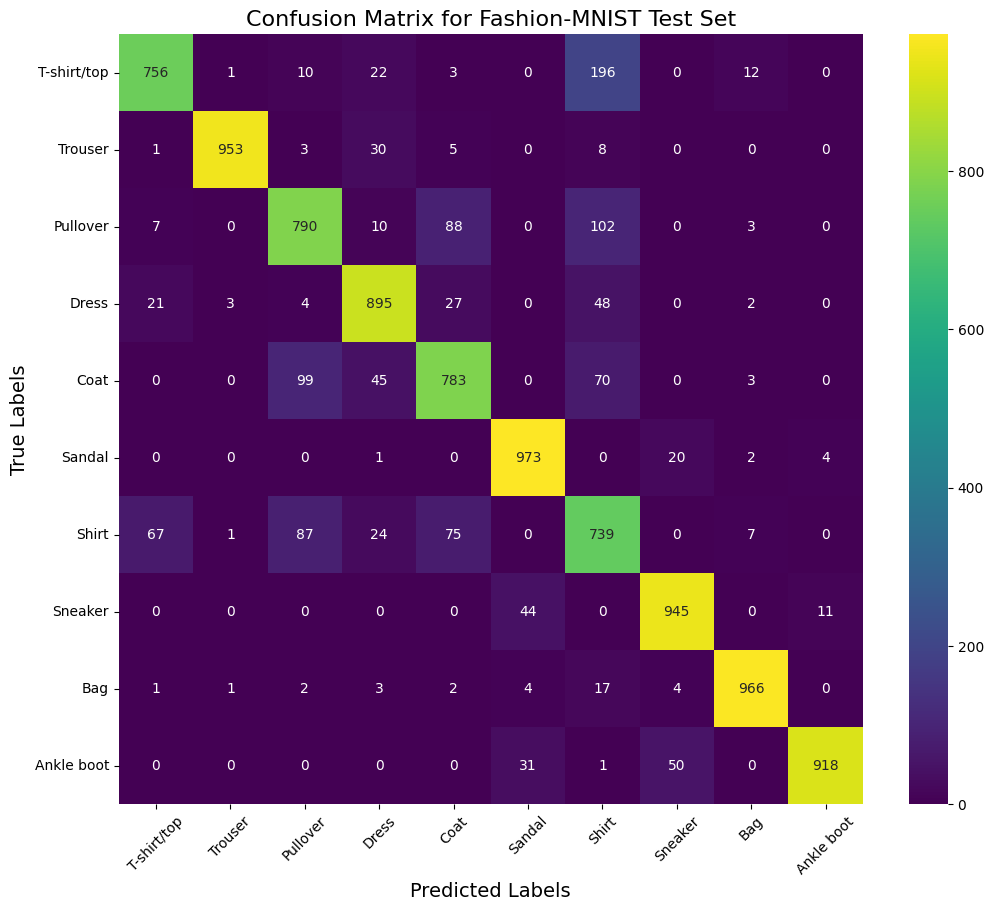

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Weight Initialization
def initialize_weights(layers, method="xavier"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
    return activations

# Backpropagation
def backpropagation(y, activations, weights):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        delta = error * sigmoid_derivative(activations[i+1])
        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)
        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# RMSprop Optimizer
def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)
    return weights, biases, cache_w, cache_b

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
y_train = np.eye(10)[y_train]
y_test_original = y_test  # Keep original labels for confusion matrix

# Define the best model parameters
best_config = {
    'hidden_layers': 3,
    'hidden_size': 64,
    'activation': 'sigmoid',
    'weight_init': 'xavier',
    'optimizer': 'rmsprop',
    'batch_size': 16,
    'epochs': 10,
    'learning_rate': 0.001,
    'weight_decay': 0
}

def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            activations = forward_propagation(X_batch, weights, biases, activation)
            gradients_w, gradients_b = backpropagation(y_batch, activations, weights)
            weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)

    return weights, biases

# Train the best model
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]
weights, biases = train_network(X_train, y_train, X_val, y_val, best_config)

# Evaluate on the test set
activations = forward_propagation(X_test, weights, biases, [best_config['activation']] * best_config['hidden_layers'] + ['sigmoid'])
test_predictions = np.argmax(activations[-1], axis=1)

# Calculate test accuracy
test_accuracy = np.mean(test_predictions == y_test_original)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_original, test_predictions)

# Plot confusion matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Fashion-MNIST Test Set', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
import wandb

# Initialize Wandb

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Weight Initialization
def initialize_weights(layers, method="xavier"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
    return activations

# Backpropagation
def backpropagation(y, activations, weights):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        delta = error * sigmoid_derivative(activations[i+1])
        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)
        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# RMSprop Optimizer
def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)
    return weights, biases, cache_w, cache_b

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
y_train = np.eye(10)[y_train]
y_test_original = y_test  # Keep original labels for confusion matrix

# Define the best model parameters
best_config = {
    'hidden_layers': 3,
    'hidden_size': 64,
    'activation': 'sigmoid',
    'weight_init': 'xavier',
    'optimizer': 'rmsprop',
    'batch_size': 16,
    'epochs': 10,
    'learning_rate': 0.001,
    'weight_decay': 0
}
wandb.init(project="fashion-mnist", config=best_config)


def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            output = activations[-1]
            train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)

            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, weights)
            weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Log training metrics to Wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy
        })

        # Print training metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return weights, biases

# Train the best model
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]
weights, biases = train_network(X_train, y_train, X_val, y_val, best_config)


# Evaluate on the test set
activations = forward_propagation(X_test, weights, biases, [best_config['activation']] * best_config['hidden_layers'] + ['sigmoid'])
test_predictions = np.argmax(activations[-1], axis=1)

# One-hot encode y_test_original for loss calculation
y_test_one_hot = np.eye(10)[y_test_original]

# Calculate test loss (cross-entropy loss)
test_loss = -np.sum(y_test_one_hot * np.log(activations[-1] + 1e-8)) / len(y_test_original)

# Calculate test accuracy
test_accuracy = np.mean(test_predictions == y_test_original)

# Log test metrics to Wandb
wandb.log({
    "test_loss": test_loss,
    "test_accuracy": test_accuracy
})

# Print test metrics
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test_original, test_predictions)

# Plot confusion matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Fashion-MNIST Test Set', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Save the confusion matrix plot to a file
confusion_matrix_path = "confusion_matrix.png"
plt.savefig(confusion_matrix_path)
plt.close()

# Log the confusion matrix as an image to Wandb
wandb.log({"confusion_matrix": wandb.Image(confusion_matrix_path)})

# Finish Wandb run
wandb.finish()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:


Abort: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
import wandb

# Initialize Wandb

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Weight Initialization
def initialize_weights(layers, method="xavier"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
    return activations

# Backpropagation
def backpropagation(y, activations, weights):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        delta = error * sigmoid_derivative(activations[i+1])
        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)
        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# RMSprop Optimizer
def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)
    return weights, biases, cache_w, cache_b

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
y_train = np.eye(10)[y_train]
y_test_original = y_test  # Keep original labels for confusion matrix

# Define the best model parameters
best_config = {
    'hidden_layers': 3,
    'hidden_size': 64,
    'activation': 'sigmoid',
    'weight_init': 'xavier',
    'optimizer': 'rmsprop',
    'batch_size': 16,
    'epochs': 10,
    'learning_rate': 0.001,
    'weight_decay': 0
}
wandb.init(project="fashion-mnist", config=best_config)


def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            output = activations[-1]
            train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)

            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, weights)
            weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Log training metrics to Wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy
        })

        # Print training metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return weights, biases

# Train the best model
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]
weights, biases = train_network(X_train, y_train, X_val, y_val, best_config)


# Evaluate on the test set
activations = forward_propagation(X_test, weights, biases, [best_config['activation']] * best_config['hidden_layers'] + ['sigmoid'])
test_predictions = np.argmax(activations[-1], axis=1)

# One-hot encode y_test_original for loss calculation
y_test_one_hot = np.eye(10)[y_test_original]

# Calculate test loss (cross-entropy loss)
test_loss = -np.sum(y_test_one_hot * np.log(activations[-1] + 1e-8)) / len(y_test_original)

# Calculate test accuracy
test_accuracy = np.mean(test_predictions == y_test_original)

# Log test metrics to Wandb
wandb.log({
    "test_loss": test_loss,
    "test_accuracy": test_accuracy
})

# Print test metrics
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



# Generate confusion matrix
cm = confusion_matrix(y_test_original, test_predictions)

# Plot confusion matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Fashion-MNIST Test Set', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Save the confusion matrix plot to a file
confusion_matrix_path = "confusion_matrix.png"
plt.savefig(confusion_matrix_path)
plt.close()

# Log the confusion matrix as an image to Wandb
wandb.log({"confusion_matrix": wandb.Image(confusion_matrix_path)})

# Finish Wandb run
wandb.finish()


In [9]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="random"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    zs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        zs.append(z)

        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "relu":
            activations.append(relu(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))

    return activations, zs

# Backpropagation
def backpropagation(y, activations, zs, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Output layer error
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "relu":
            delta = error * relu_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])

        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)

        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# Optimizers
def sgd(weights, biases, gradients_w, gradients_b, lr):
    for i in range(len(weights)):
        weights[i] -= lr * gradients_w[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases

def momentum(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        velocity[i] = beta * velocity[i] + (1 - beta) * gradients_w[i]
        weights[i] -= lr * velocity[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases, velocity

def nesterov(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        temp_velocity = beta * velocity[i]
        weights[i] -= lr * (beta * temp_velocity + (1 - beta) * gradients_w[i])
        biases[i] -= lr * gradients_b[i]
        velocity[i] = temp_velocity + (1 - beta) * gradients_w[i]
    return weights, biases, velocity

def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        # Update cache for weights
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)

        # Update cache for biases
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)

    return weights, biases, cache_w, cache_b


def adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        # Update for weights
        m_w[i] = beta1 * m_w[i] + (1 - beta1) * gradients_w[i]
        v_w[i] = beta2 * v_w[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat_w = m_w[i] / (1 - beta1 ** t)
        v_hat_w = v_w[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat_w / (np.sqrt(v_hat_w) + epsilon)

        # Update for biases
        m_b[i] = beta1 * m_b[i] + (1 - beta1) * gradients_b[i]
        v_b[i] = beta2 * v_b[i] + (1 - beta2) * (gradients_b[i] ** 2)
        m_hat_b = m_b[i] / (1 - beta1 ** t)
        v_hat_b = v_b[i] / (1 - beta2 ** t)
        biases[i] -= lr * m_hat_b / (np.sqrt(v_hat_b) + epsilon)

    return weights, biases, m_w, v_w, m_b, v_b

def nadam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = (beta1 * m[i] + (1 - beta1) * gradients_w[i]) / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# def train_network(X_train, y_train, X_val, y_val, config):
#     np.random.seed(42)
#     layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
#     activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

#     weights, biases = initialize_weights(layers, config['weight_init'])
#     optimizer = config['optimizer']

#     velocity = [np.zeros_like(w) for w in weights]
#     cache_w = [np.zeros_like(w) for w in weights]
#     cache_b = [np.zeros_like(b) for b in biases]
#     m_w = [np.zeros_like(w) for w in weights]  # For weights
#     v_w = [np.zeros_like(w) for w in weights]  # For weights
#     m_b = [np.zeros_like(b) for b in biases]   # For biases
#     v_b = [np.zeros_like(b) for b in biases]   # For biases

#     batch_size = config['batch_size']
#     epochs = config['epochs']
#     lr = config['learning_rate']

#     for epoch in range(epochs):
#         indices = np.random.permutation(X_train.shape[0])
#         X_train, y_train = X_train[indices], y_train[indices]

#         for i in range(0, X_train.shape[0], batch_size):
#             X_batch = X_train[i:i+batch_size]
#             y_batch = y_train[i:i+batch_size]

#             activations, zs = forward_propagation(X_batch, weights, biases, activation)
#             gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

#             if optimizer == 'sgd':
#                 weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
#             elif optimizer == 'momentum':
#                 weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'nesterov':
#                 weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'rmsprop':
#                 weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
#             elif optimizer == 'adam':
#                 weights, biases, m_w, v_w, m_b, v_b = adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, t=epoch+1)
#             elif optimizer == 'nadam':
#                 # Update nadam similarly if needed
#                 pass

#         # Validate model
#         activations, _ = forward_propagation(X_val, weights, biases, activation)

#         train_accuracy = np.mean(np.argmax(activations[-1], axis=1) == np.argmax(y_train, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Train Accuracy: {train_accuracy:.4f}")
#         wandb.log({"epoch": epoch+1, "train_accuracy": train_accuracy})

#         val_accuracy = np.mean(np.argmax(activations[-1], axis=1) == np.argmax(y_val, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}")
#         wandb.log({"epoch": epoch+1, "val_accuracy": val_accuracy})

#         train_loss = np.mean(np.argmax(activations[-1], axis=1) != np.argmax(y_train, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}")
#         wandb.log({"epoch": epoch+1, "train_loss": train_loss})

#         val_loss = np.mean(np.argmax(activations[-1], axis=1) != np.argmax(y_val, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")
#         wandb.log({"epoch": epoch+1, "val_loss}": val_loss})





#     return


def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    optimizer = config['optimizer']

    velocity = [np.zeros_like(w) for w in weights]
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]
    m_w = [np.zeros_like(w) for w in weights]  # For weights
    v_w = [np.zeros_like(w) for w in weights]  # For weights
    m_b = [np.zeros_like(b) for b in biases]   # For biases
    v_b = [np.zeros_like(b) for b in biases]   # For biases

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations, zs = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            # output = activations[-1]
            # train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)
            #calculate mean squared error
            output = activations[-1]
            train_loss += np.mean(np.square(activations[-1] - y_batch))


            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

            # Update weights and biases based on optimizer
            if optimizer == 'sgd':
                weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
            elif optimizer == 'momentum':
                weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'nesterov':
                weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'rmsprop':
                weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
            elif optimizer == 'adam':
                weights, biases, m_w, v_w, m_b, v_b = adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, t=epoch+1)
            elif optimizer == 'nadam':
                # Update nadam similarly if needed
                pass

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Validate model
        val_activations, _ = forward_propagation(X_val, weights, biases, activation)
        val_loss = -np.sum(y_val * np.log(val_activations[-1] + 1e-8)) / len(y_val)
        val_accuracy = np.mean(np.argmax(val_activations[-1], axis=1) == np.argmax(y_val, axis=1))

        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "val_loss": val_loss,
            "val_accuracy": val_accuracy
        })

        # Print metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return

# Split training data into train and validation
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]

# Hyperparameter tuning with wandb
sweep_config = {
    'method': 'random',
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

# Train the network using WandB configuration
def train():
    wandb.init()
    config = wandb.config
    train_network(X_train, y_train, X_val, y_val, config)

sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")
wandb.agent(sweep_id, function=train, count=5)

wandb.finish()

Create sweep with ID: jbvlqpzo
Sweep URL: https://wandb.ai/mangleshpatidar2233-iit-madras-alumni-association/fashion-mnist/sweeps/jbvlqpzo


wandb: Agent Starting Run: qfwuwcx1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.2511, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 2/5, Train Loss: 0.2511, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 3/5, Train Loss: 0.2511, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 4/5, Train Loss: 0.2511, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032
Epoch 5/5, Train Loss: 0.2511, Train Accuracy: 0.0996, Val Loss: 0.6908, Val Accuracy: 0.1032


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09965
train_loss,0.25115
val_accuracy,0.10317
val_loss,0.69077


wandb: Agent Starting Run: dnh6q6wc with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.0971, Train Accuracy: 0.3024, Val Loss: 2.1018, Val Accuracy: 0.4673
Epoch 2/5, Train Loss: 0.0865, Train Accuracy: 0.4799, Val Loss: 1.8019, Val Accuracy: 0.4602
Epoch 3/5, Train Loss: 0.0785, Train Accuracy: 0.4545, Val Loss: 1.4491, Val Accuracy: 0.4885
Epoch 4/5, Train Loss: 0.0701, Train Accuracy: 0.5257, Val Loss: 1.2531, Val Accuracy: 0.5683
Epoch 5/5, Train Loss: 0.0630, Train Accuracy: 0.5834, Val Loss: 1.1167, Val Accuracy: 0.6038


epoch,▁▃▅▆█
train_accuracy,▁▅▅▇█
train_loss,█▆▄▂▁
val_accuracy,▁▁▂▆█
val_loss,█▆▃▂▁
epoch,5
train_accuracy,0.58335
train_loss,0.06304
val_accuracy,0.60383
val_loss,1.11674


wandb: Agent Starting Run: xbynrggb with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.2627, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 2/5, Train Loss: 0.2627, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 3/5, Train Loss: 0.2627, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 4/5, Train Loss: 0.2627, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750
Epoch 5/5, Train Loss: 0.2627, Train Accuracy: 0.1792, Val Loss: 0.6635, Val Accuracy: 0.1750


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.17924
train_loss,0.26272
val_accuracy,0.175
val_loss,0.66348


wandb: Agent Starting Run: lcxk0av0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 2/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 3/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 4/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 5/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 6/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 7/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 8/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 9/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102
Epoch 10/10, Train Loss: 0.2386, Train Accuracy: 0.1035, Val Loss: 0.7267, Val Accuracy: 0.1102


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.10352
train_loss,0.23855
val_accuracy,0.11017
val_loss,0.7267


wandb: Agent Starting Run: lyxvue02 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.0927, Train Accuracy: 0.0980, Val Loss: 2.3034, Val Accuracy: 0.0985
Epoch 2/5, Train Loss: 0.0901, Train Accuracy: 0.0999, Val Loss: 2.3035, Val Accuracy: 0.0973
Epoch 3/5, Train Loss: 0.0901, Train Accuracy: 0.0978, Val Loss: 2.3037, Val Accuracy: 0.0985
Epoch 4/5, Train Loss: 0.0901, Train Accuracy: 0.0986, Val Loss: 2.3035, Val Accuracy: 0.0925
Epoch 5/5, Train Loss: 0.0901, Train Accuracy: 0.0978, Val Loss: 2.3032, Val Accuracy: 0.1055


epoch,▁▃▅▆█
train_accuracy,▂█▁▃▁
train_loss,█▁▁▁▁
val_accuracy,▄▄▄▁█
val_loss,▄▅█▅▁
epoch,5
train_accuracy,0.09783
train_loss,0.09011
val_accuracy,0.1055
val_loss,2.30319


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
import wandb

# Initialize Wandb
wandb.init(project="fashion-mnist", config=best_config)

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Weight Initialization
def initialize_weights(layers, method="xavier"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
    return activations

# Backpropagation
def backpropagation(y, activations, weights):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        delta = error * sigmoid_derivative(activations[i+1])
        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)
        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# RMSprop Optimizer
def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)
    return weights, biases, cache_w, cache_b

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
y_train = np.eye(10)[y_train]
y_test_original = y_test  # Keep original labels for confusion matrix

# Define the best model parameters
best_config = {
    'hidden_layers': 3,
    'hidden_size': 64,
    'activation': 'sigmoid',
    'weight_init': 'xavier',
    'optimizer': 'rmsprop',
    'batch_size': 16,
    'epochs': 10,
    'learning_rate': 0.001,
    'weight_decay': 0
}

def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            output = activations[-1]
            train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)

            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, weights)
            weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Log training metrics to Wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy
        })

        # Print training metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return weights, biases

# Train the best model
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]
weights, biases = train_network(X_train, y_train, X_val, y_val, best_config)


# Evaluate on the test set
activations = forward_propagation(X_test, weights, biases, [best_config['activation']] * best_config['hidden_layers'] + ['sigmoid'])
test_predictions = np.argmax(activations[-1], axis=1)

# One-hot encode y_test_original for loss calculation
y_test_one_hot = np.eye(10)[y_test_original]

# Calculate test loss (cross-entropy loss)
test_loss = -np.sum(y_test_one_hot * np.log(activations[-1] + 1e-8)) / len(y_test_original)

# Calculate test accuracy
test_accuracy = np.mean(test_predictions == y_test_original)

# Log test metrics to Wandb
wandb.log({
    "test_loss": test_loss,
    "test_accuracy": test_accuracy
})

# Print test metrics
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
import wandb

# Initialize Wandb
wandb.init(project="mnist", config={})

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="xavier"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))
    return activations

# Backpropagation
def backpropagation(y, activations, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])
        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)
        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# RMSprop Optimizer
def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)
    return weights, biases, cache_w, cache_b

# Adam Optimizer
def adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        # Update momentum and velocity for weights
        m_w[i] = beta1 * m_w[i] + (1 - beta1) * gradients_w[i]
        v_w[i] = beta2 * v_w[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_w_hat = m_w[i] / (1 - beta1 ** t)
        v_w_hat = v_w[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)

        # Update momentum and velocity for biases
        m_b[i] = beta1 * m_b[i] + (1 - beta1) * gradients_b[i]
        v_b[i] = beta2 * v_b[i] + (1 - beta2) * (gradients_b[i] ** 2)
        m_b_hat = m_b[i] / (1 - beta1 ** t)
        v_b_hat = v_b[i] / (1 - beta2 ** t)
        biases[i] -= lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

    return weights, biases, m_w, v_w, m_b, v_b

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
y_train = np.eye(10)[y_train]
y_test_original = y_test  # Keep original labels for confusion matrix

# Define configurations
configurations = [
    {
        'hidden_layers': 3,
        'hidden_size': 64,
        'activation': 'sigmoid',
        'weight_init': 'xavier',
        'optimizer': 'rmsprop',
        'batch_size': 16,
        'epochs': 10,
        'learning_rate': 0.001,
        'weight_decay': 0
    },
    {
        'hidden_layers': 3,
        'hidden_size': 128,
        'activation': 'sigmoid',
        'weight_init': 'xavier',
        'optimizer': 'rmsprop',
        'batch_size': 32,
        'epochs': 10,
        'learning_rate': 0.001,
        'weight_decay': 0.0005
    },
    {
        'hidden_layers': 4,
        'hidden_size': 128,
        'activation': 'tanh',
        'weight_init': 'xavier',
        'optimizer': 'adam',
        'batch_size': 16,
        'epochs': 5,
        'learning_rate': 0.001,
        'weight_decay': 0.05
    }
]

def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]
    m_w = [np.zeros_like(w) for w in weights]
    v_w = [np.zeros_like(w) for w in weights]
    m_b = [np.zeros_like(b) for b in biases]
    v_b = [np.zeros_like(b) for b in biases]

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            output = activations[-1]
            train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)

            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, weights, activation)
            if config['optimizer'] == "rmsprop":
                weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
            elif config['optimizer'] == "adam":
                weights, biases, m_w, v_w, m_b, v_b = adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, t=epoch+1)

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Validation
        val_activations = forward_propagation(X_val, weights, biases, activation)
        val_loss = -np.sum(y_val * np.log(val_activations[-1] + 1e-8)) / len(y_val)
        val_preds = np.argmax(val_activations[-1], axis=1)
        val_true = np.argmax(y_val, axis=1)
        val_accuracy = np.mean(val_preds == val_true)

        # Log metrics to Wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "val_loss": val_loss,
            "val_accuracy": val_accuracy
        })

        # Print metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return weights, biases

# Split training data into training and validation sets
X_train, X_val = X_train[:50000], X_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Train and evaluate each configuration
for i, config in enumerate(configurations):
    print(f"\nTraining Configuration {i + 1}: {config}")
    wandb.init(project="mnist", config=config, reinit=True)
    weights, biases = train_network(X_train, y_train, X_val, y_val, config)

    # Evaluate on the test set
    activations = forward_propagation(X_test, weights, biases, [config['activation']] * config['hidden_layers'] + ['sigmoid'])
    test_predictions = np.argmax(activations[-1], axis=1)

    # Calculate test loss (cross-entropy loss)
    test_loss = -np.sum(np.eye(10)[y_test_original] * np.log(activations[-1] + 1e-8)) / len(y_test_original)

    # Calculate test accuracy
    test_accuracy = np.mean(test_predictions == y_test_original)

    # Log test metrics to Wandb
    wandb.log({
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    })

    # Print test metrics
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: mangleshpatidar2233 (mangleshpatidar2233-iit-madras-alumni-association) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Training Configuration 1: {'hidden_layers': 3, 'hidden_size': 64, 'activation': 'sigmoid', 'weight_init': 'xavier', 'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 10, 'learning_rate': 0.001, 'weight_decay': 0}


Epoch 1/10, Train Loss: 0.6675, Train Accuracy: 0.7972, Val Loss: 0.3099, Val Accuracy: 0.9296
Epoch 2/10, Train Loss: 0.2671, Train Accuracy: 0.9350, Val Loss: 0.2219, Val Accuracy: 0.9488
Epoch 3/10, Train Loss: 0.2009, Train Accuracy: 0.9530, Val Loss: 0.1746, Val Accuracy: 0.9606
Epoch 4/10, Train Loss: 0.1664, Train Accuracy: 0.9619, Val Loss: 0.1586, Val Accuracy: 0.9647
Epoch 5/10, Train Loss: 0.1441, Train Accuracy: 0.9688, Val Loss: 0.1490, Val Accuracy: 0.9639
Epoch 6/10, Train Loss: 0.1288, Train Accuracy: 0.9730, Val Loss: 0.1418, Val Accuracy: 0.9679
Epoch 7/10, Train Loss: 0.1173, Train Accuracy: 0.9758, Val Loss: 0.1371, Val Accuracy: 0.9703
Epoch 8/10, Train Loss: 0.1056, Train Accuracy: 0.9784, Val Loss: 0.1297, Val Accuracy: 0.9699
Epoch 9/10, Train Loss: 0.0984, Train Accuracy: 0.9806, Val Loss: 0.1340, Val Accuracy: 0.9689
Epoch 10/10, Train Loss: 0.0942, Train Accuracy: 0.9822, Val Loss: 0.1397, Val Accuracy: 0.9714
Test Loss: 0.1459, Test Accuracy: 0.9679

Trainin

epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,10
test_accuracy,0.9679
test_loss,0.1459
train_accuracy,0.98216


Epoch 1/10, Train Loss: 0.5817, Train Accuracy: 0.8245, Val Loss: 0.2607, Val Accuracy: 0.9287
Epoch 2/10, Train Loss: 0.2429, Train Accuracy: 0.9384, Val Loss: 0.1963, Val Accuracy: 0.9543
Epoch 3/10, Train Loss: 0.1845, Train Accuracy: 0.9553, Val Loss: 0.1640, Val Accuracy: 0.9589
Epoch 4/10, Train Loss: 0.1482, Train Accuracy: 0.9648, Val Loss: 0.1609, Val Accuracy: 0.9643
Epoch 5/10, Train Loss: 0.1238, Train Accuracy: 0.9719, Val Loss: 0.1389, Val Accuracy: 0.9681
Epoch 6/10, Train Loss: 0.1056, Train Accuracy: 0.9763, Val Loss: 0.1318, Val Accuracy: 0.9698
Epoch 7/10, Train Loss: 0.0925, Train Accuracy: 0.9797, Val Loss: 0.1148, Val Accuracy: 0.9726
Epoch 8/10, Train Loss: 0.0831, Train Accuracy: 0.9827, Val Loss: 0.1123, Val Accuracy: 0.9760
Epoch 9/10, Train Loss: 0.0760, Train Accuracy: 0.9851, Val Loss: 0.1120, Val Accuracy: 0.9741
Epoch 10/10, Train Loss: 0.0703, Train Accuracy: 0.9863, Val Loss: 0.1076, Val Accuracy: 0.9756
Test Loss: 0.1021, Test Accuracy: 0.9737

Trainin

epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▃▂▂▁▁▁▁▁
val_accuracy,▁▅▅▆▇▇▇███
val_loss,█▅▄▃▂▂▁▁▁▁
epoch,10
test_accuracy,0.9737
test_loss,0.10215
train_accuracy,0.98626


Epoch 1/5, Train Loss: 0.3392, Train Accuracy: 0.9031, Val Loss: 0.2298, Val Accuracy: 0.9451
Epoch 2/5, Train Loss: 0.2008, Train Accuracy: 0.9460, Val Loss: 0.1644, Val Accuracy: 0.9551
Epoch 3/5, Train Loss: 0.1661, Train Accuracy: 0.9562, Val Loss: 0.1488, Val Accuracy: 0.9598
Epoch 4/5, Train Loss: 0.1431, Train Accuracy: 0.9630, Val Loss: 0.1349, Val Accuracy: 0.9625
Epoch 5/5, Train Loss: 0.1282, Train Accuracy: 0.9674, Val Loss: 0.1314, Val Accuracy: 0.9642
Test Loss: 0.1356, Test Accuracy: 0.9595
